In [ ]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

plt.style.use('ggplot')

In [ ]:
data = pd.read_csv('cscpopendata.csv')

OBJECTIVE : The customer wants to know if the chemicals in the products they are selling matter for their one-stop, multi-beauty brands store.

In [ ]:
sns.distplot(data.ChemicalCount.dropna())
plt.show()

<ipython-input-3-d7d8c936ee6d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.ChemicalCount.dropna())


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114635 entries, 0 to 114634
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CDPHId                  114635 non-null  int64  
 1   ProductName             114635 non-null  object 
 2   CSFId                   80662 non-null   float64
 3   CSF                     80238 non-null   object 
 4   CompanyId               114635 non-null  int64  
 5   CompanyName             114635 non-null  object 
 6   BrandName               114419 non-null  object 
 7   PrimaryCategoryId       114635 non-null  int64  
 8   PrimaryCategory         114635 non-null  object 
 9   SubCategoryId           114635 non-null  int64  
 10  SubCategory             114635 non-null  object 
 11  CasId                   114635 non-null  int64  
 12  CasNumber               108159 non-null  object 
 13  ChemicalId              114635 non-null  int64  
 14  ChemicalName        

In [ ]:
data.isna().sum()

CDPHId                         0
ProductName                    0
CSFId                      33973
CSF                        34397
CompanyId                      0
CompanyName                    0
BrandName                    216
PrimaryCategoryId              0
PrimaryCategory                0
SubCategoryId                  0
SubCategory                    0
CasId                          0
CasNumber                   6476
ChemicalId                     0
ChemicalName                   0
InitialDateReported            0
MostRecentDateReported         0
DiscontinuedDate          101715
ChemicalCreatedAt              0
ChemicalUpdatedAt              0
ChemicalDateRemoved       111650
ChemicalCount                  0
dtype: int64

In [ ]:
data.nunique()

CDPHId                    36972
ProductName               33716
CSFId                     58167
CSF                       34327
CompanyId                   635
CompanyName                 606
BrandName                  2714
PrimaryCategoryId            13
PrimaryCategory              13
SubCategoryId                92
SubCategory                  89
CasId                       134
CasNumber                   125
ChemicalId                58079
ChemicalName                123
InitialDateReported        2274
MostRecentDateReported     2178
DiscontinuedDate            991
ChemicalCreatedAt          2320
ChemicalUpdatedAt          2326
ChemicalDateRemoved         524
ChemicalCount                10
dtype: int64

CDPHId is the product id, and unique count represents the number of products in the category, but some products may appear more than once due to having more than one

Color/Scent/Flavor, Category, or Chemical Name/CAS number reported.

There's a difference in unique counts between CPHId and productname, and the reason needs to be identified.

CSF&CSFId have different unique counts because CSF may sometimes be general names that are the same for other brands but shouldn't pose a problem at the moment.

Company Id and Company Name have different counts, and the reason for this needs to be determined to choose which one to prioritize.

There are 592 unique company names, and if opting for Company Name, they need to be standardized first.

In [ ]:
data.head()

CDPHId                                       ProductName  CSFId  CSF  \
0       2  ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES    NaN  NaN   
1       3                        Glover's Medicated Shampoo    NaN  NaN   
2       3                        Glover's Medicated Shampoo    NaN  NaN   
3       4          PRECISION GLIMMER EYE LINER-ALL SHADES �    NaN  NaN   
4       5       AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �    NaN  NaN   

   CompanyId          CompanyName BrandName  PrimaryCategoryId  \
0          4         New Avon LLC      AVON                 44   
1        338  J. Strickland & Co.  Glover's                 18   
2        338  J. Strickland & Co.  Glover's                 18   
3          4         New Avon LLC      AVON                 44   
4          4         New Avon LLC      AVON                 44   

                     PrimaryCategory  SubCategoryId  ...   CasNumber  \
0    Makeup Products (non-permanent)             53  ...  13463-67-7   
1  Hair Care Products (non-coloring)             25  ...  65996-92-1   
2  Hair Care Products (non-coloring)             25  ...    140-67-0   
3    Makeup Products (non-permanent)             46  ...  13463-67-7   
4    Makeup Products (non-permanent)             52  ...  13463-67-7   

   ChemicalId            ChemicalName  InitialDateReported  \
0           6        Titanium dioxide           06/17/2009   
1           4  Distillates (coal tar)           07/01/2009   
2           5               Estragole           07/01/2009   
3           7        Titanium dioxide           07/09/2009   
4           8        Titanium dioxide           07/09/2009   

  MostRecentDateReported DiscontinuedDate ChemicalCreatedAt ChemicalUpdatedAt  \
0             08/28/2013       02/01/2011        07/09/2009        07/09/2009   
1             07/01/2009              NaN        07/01/2009        07/01/2009   
2             07/01/2009              NaN        07/02/2009        07/02/2009   
3             08/28/2013              NaN        07/09/2009        07/09/2009   
4             08/28/2013       02/01/2011        07/09/2009        07/09/2009   

  ChemicalDateRemoved ChemicalCount  
0                 NaN             1  
1                 NaN             2  
2                 NaN             2  
3                 NaN             1  
4                 NaN             1  

[5 rows x 22 columns]

In [ ]:
data.dtypes

CDPHId                      int64
ProductName                object
CSFId                     float64
CSF                        object
CompanyId                   int64
CompanyName                object
BrandName                  object
PrimaryCategoryId           int64
PrimaryCategory            object
SubCategoryId               int64
SubCategory                object
CasId                       int64
CasNumber                  object
ChemicalId                  int64
ChemicalName               object
InitialDateReported        object
MostRecentDateReported     object
DiscontinuedDate           object
ChemicalCreatedAt          object
ChemicalUpdatedAt          object
ChemicalDateRemoved        object
ChemicalCount               int64
dtype: object

In [ ]:
data['InitialDateReported'] = data['InitialDateReported'].astype('datetime64')
data['MostRecentDateReported'] = data['MostRecentDateReported'].astype('datetime64')
data['DiscontinuedDate'] = data['DiscontinuedDate'].astype('datetime64')
data['ChemicalCreatedAt'] = data['ChemicalCreatedAt'].astype('datetime64')
data['ChemicalUpdatedAt'] = data['ChemicalUpdatedAt'].astype('datetime64')
data['ChemicalDateRemoved'] = data['ChemicalDateRemoved'].astype('datetime64')
data['CDPHId'] = data['CDPHId'].astype('str')
data['PrimaryCategoryId'] = data['PrimaryCategoryId'].astype('str')
data['CompanyId'] = data['CompanyId'].astype('str')

In [ ]:
data.PrimaryCategory.value_counts()

Makeup Products (non-permanent)      75827
Nail Products                        15347
Skin Care Products                    7683
Sun-Related Products                  4939
Bath Products                         3466
Hair Coloring Products                2061
Hair Care Products (non-coloring)     1620
Tattoos and Permanent Makeup          1477
Personal Care Products                 765
Fragrances                             654
Oral Hygiene Products                  525
Shaving Products                       222
Baby Products                           49
Name: PrimaryCategory, dtype: int64

In [ ]:
com = data[['CompanyId','CompanyName']].drop_duplicates()
com.sort_values(['CompanyName']).head(60)

CompanyId                               CompanyName
92089      1222                      2355644 Ontario Inc.
45936       754                      A. P. Deauville, LLC
89596      1206                            ACQUA DI PARMA
12334       209                                   AFFLINK
33190       478    AG PROFESSIONAL HAIR CARE PRODUCTS LTD
92114      1228          ALBION COSMETICS (America), Inc.
75505      1073                      ALPHAEON Corporation
1398         82                        AMCO International
75732      1076                      AMOREPACIFIC US INC.
25359       350                               ANC SPA INC
33807       540                         ANTONIO PUIG S.A.
74316      1028                             APLICARE, INC
36168       609                                AROMCA S.A
19161       276  Access Business Group International, LLC
9791        157                          Added Extras LLC
5573        118                          Added Extras LLC
42567       716                          Added Extras LLC
36112       597                 Advanced Aesthetics, Inc.
63883      1005                            Aesop USA Inc.
48619       783                            Alberto Culver
12038       204                  Alberto Culver USA, Inc.
50157       813             Alessandro International GmbH
56355       920             Alessandro International GmbH
3631        110                 Alfalfa Nail Supply, Inc.
33749       472                         Allure Labs, Inc.
97422      1271                Aloe Vera of America, Inc.
36           31               Aloecare International, LLC
9787        188                    Aloette Cosmetics Inc.
63876      1003                                  Alqvimia
51931       844                American Consumer Products
38197       825           American Consumer Products, LLC
27474       372         American International Industries
82891      1148         American International Industries
59671       955                         Amway Corporation
24429       158              Anastasia Beverly Hills, LLC
33518       475             Apollo Health and Beauty Care
85766      1178        Apollo Health and Beauty Care Inc.
17639       258                               Aramis Inc.
27477       290                 Arbonne International LLC
3627       1093                   Arcadia Beauty Labs LLC
77245      1086                  Arcadia Beauty Labs, LLC
33600       504                          Archipelago Inc.
19758       288                        Armand Dupree Inc.
67974      1030  Artistic Nail Design - Nail Alliance LLC
5180        141                          Astara Skin Care
50813       826                          Athena Cosmetics
15202       190                    Athena Cosmetics, Inc.
49665       808                 Atlas Development Limited
37808       643                       Aubrey Organics Inc
26299       367                           Australian Gold
30048       405                         Aveda Corporation
37844       645                    Avlon Industries, Inc.
38298       637                      B & C PRODUCTS, INC.
33150       470              BABOR Cosmetics America Corp
5991        148             BEAUTE PRESTIGE INTERNATIONAL
26301       321                      BEAUTY SOCIETY, INC.
91030      1221                      BEST ACCESSORY GROUP
6662         99                                    BR SAS
86490      1188              BULGARI GLOBAL OPERATIONS SA
1716         84              Bare Escentuals Beauty, Inc.

In [ ]:
data[data.CompanyName== 'Added Extras LLC'][data.CompanyId =='716']

<ipython-input-12-35a68c7825df>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data.CompanyName== 'Added Extras LLC'][data.CompanyId =='716']


CDPHId                                  ProductName    CSFId  \
42567  15006          Beauty Sweets Cosmetic Bag Gift Set  21009.0   
42568  15007              Beauty Sweets Mega Cosmetic Set  21010.0   
42569  15007              Beauty Sweets Mega Cosmetic Set  23573.0   
42570  15007              Beauty Sweets Mega Cosmetic Set  23734.0   
42571  15008  Strawberry Shortcake Lip Gloss Gift Bag Set  21011.0   
42572  15008  Strawberry Shortcake Lip Gloss Gift Bag Set  21012.0   
42573  15008  Strawberry Shortcake Lip Gloss Gift Bag Set  23572.0   
42574  15008  Strawberry Shortcake Lip Gloss Gift Bag Set  23733.0   
44135  15451                          Quinn Cosmetic book  21724.0   
44136  15452                          9 pk Mini Lipglosss  21725.0   
44137  15452                          9 pk Mini Lipglosss  23613.0   
44138  15452                          9 pk Mini Lipglosss  23738.0   
44139  15453                               LIP GLOSS WAND  21726.0   
44140  15454                                  NAIL POLISH  21727.0   
44141  15455                               LIP GLOSS WAND  21728.0   
44142  15456                          10 ML LIPGLOSS TUBE      NaN   
45908  16113                                   Eye Shadow  24042.0   
45909  16113                                   Eye Shadow  24043.0   

                       CSF CompanyId       CompanyName  BrandName  \
42567               purple       716  Added Extras LLC   Wal-Mart   
42568                white       716  Added Extras LLC   Wal-Mart   
42569                Berry       716  Added Extras LLC   Wal-Mart   
42570                Berry       716  Added Extras LLC   Wal-Mart   
42571                 Pink       716  Added Extras LLC   Wal-Mart   
42572                 pink       716  Added Extras LLC   Wal-Mart   
42573           Strawberry       716  Added Extras LLC   Wal-Mart   
42574           Strawberry       716  Added Extras LLC   Wal-Mart   
44135             white AB       716  Added Extras LLC       Glee   
44136                multi       716  Added Extras LLC       Glee   
44137                multi       716  Added Extras LLC       Glee   
44138                multi       716  Added Extras LLC       Glee   
44139                PEACH       716  Added Extras LLC       Glee   
44140                MULTI       716  Added Extras LLC       Glee   
44141                 PINK       716  Added Extras LLC       Glee   
44142                  NaN       716  Added Extras LLC       Glee   
45908  Pink  - none - none       716  Added Extras LLC  Hot Topic   
45909    Red - none - none       716  Added Extras LLC  Hot Topic   

      PrimaryCategoryId                  PrimaryCategory  SubCategoryId  ...  \
42567                44  Makeup Products (non-permanent)             46  ...   
42568                44  Makeup Products (non-permanent)             52  ...   
42569                44  Makeup Products (non-permanent)             52  ...   
42570                44  Makeup Products (non-permanent)             52  ...   
42571                44  Makeup Products (non-permanent)             52  ...   
42572                44  Makeup Products (non-permanent)             52  ...   
42573                44  Makeup Products (non-permanent)             52  ...   
42574                44  Makeup Products (non-permanent)             52  ...   
44135                44  Makeup Products (non-permanent)             48  ...   
44136                44  Makeup Products (non-permanent)             52  ...   
44137                44  Makeup Products (non-permanent)             52  ...   
44138                44  Makeup Products (non-permanent)             52  ...   
44139                44  Makeup Products (non-permanent)             52  ...   
44140                59                    Nail Products             65  ...   
44141                44  Makeup Products (non-permanent)             52  ...   
44142                44  Makeup Products (non-permanent)             52  ...   
459

In [ ]:
data[data.CompanyName== 'Added Extras LLC'][data.CompanyId =='157']

<ipython-input-13-70c60910d52a>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data.CompanyName== 'Added Extras LLC'][data.CompanyId =='157']


CDPHId              ProductName    CSFId        CSF CompanyId  \
9791    2687          Baked Eyeshadow   4866.0   Black 03       157   
9792    2687          Baked Eyeshadow   4867.0    Teal 02       157   
9793    2687          Baked Eyeshadow   4868.0    Pink 05       157   
9794    2687          Baked Eyeshadow   4869.0  Copper 04       157   
10996   2776   Square Liquid Eyeliner      NaN        NaN       157   
...      ...                      ...      ...        ...       ...   
43344  15176  Plexi Eyeshadow Compact  21272.0     yellow       157   
43345  15176  Plexi Eyeshadow Compact  21273.0     orange       157   
43346  15176  Plexi Eyeshadow Compact  21274.0      brown       157   
43347  15176  Plexi Eyeshadow Compact  21275.0        tan       157   
43349  15178  White Wing Tip Eyeliner  21276.0      white       157   

            CompanyName  BrandName PrimaryCategoryId  \
9791   Added Extras LLC  Hot Topic                44   
9792   Added Extras LLC  Hot Topic                44   
9793   Added Extras LLC  Hot Topic                44   
9794   Added Extras LLC  Hot Topic                44   
10996  Added Extras LLC  Hot Topic                44   
...                 ...        ...               ...   
43344  Added Extras LLC  Hot Topic                44   
43345  Added Extras LLC  Hot Topic                44   
43346  Added Extras LLC  Hot Topic                44   
43347  Added Extras LLC  Hot Topic                44   
43349  Added Extras LLC  Hot Topic                44   

                       PrimaryCategory  SubCategoryId  ...   CasNumber  \
9791   Makeup Products (non-permanent)             48  ...  13463-67-7   
9792   Makeup Products (non-permanent)             48  ...  13463-67-7   
9793   Makeup Products (non-permanent)             48  ...  13463-67-7   
9794   Makeup Products (non-permanent)             48  ...  13463-67-7   
10996  Makeup Products (non-permanent)             46  ...  13463-67-7   
...                                ...            ...  ...         ...   
43344  Makeup Products (non-permanent)             48  ...  13463-67-7   
43345  Makeup Products (non-permanent)             48  ...  13463-67-7   
43346  Makeup Products (non-permanent)             48  ...  13463-67-7   
43347  Makeup Products (non-permanent)             48  ...  13463-67-7   
43349  Makeup Products (non-permanent)             46  ...  13463-67-7   

       ChemicalId      ChemicalName  InitialDateReported  \
9791         4173  Titanium dioxide           2009-10-07   
9792         4173  Titanium dioxide           2009-10-07   
9793         4173  Titanium dioxide           2009-10-07   
9794         4173  Titanium dioxide           2009-10-07   
10996        4458  Titanium dioxide           2009-10-08   
...           ...               ...                  ...   
43344       23386  Titanium dioxide           2010-08-25   
43345       23386  Titanium dioxide           2010-08-25   
43346       23386  Titanium dioxide           2010-08-25   
43347       23386  Titanium dioxide           2010-08-25   
43349       23387  Titanium dioxide           2010-08-25   

      MostRecentDateReported DiscontinuedDate ChemicalCreatedAt  \
9791              2010-12-30              NaT        2009-10-07   
9792              2010-12-30              NaT        2009-10-07   
9793              2010-12-30              NaT        2009-10-07   
9794              2010-12-30              NaT        2009-10-07   
10996             2009-10-08              NaT        2009-10-08   
...                      ...              ...               ...   
43344             2010-12-30              NaT        2010-08-25   
43345             2010-12-30              NaT        2010-08-25   
43346             2010-12-30              NaT        2010-08-25   
43347             2010-12-30              NaT        2010-08-25   
43349             2010-12-30              NaT        2010-08-25   

      ChemicalUpdatedAt ChemicalDateRemoved ChemicalCount  
9791 

In [ ]:
data[data.CompanyName== 'Added Extras LLC'][data.CompanyId =='118']['BrandName'].unique()

<ipython-input-14-a8289fb493db>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data.CompanyName== 'Added Extras LLC'][data.CompanyId =='118']['BrandName'].unique()


array(['Topps', 'Hello Kitty', 'Dead Sea', 'Aquafina', 'Urban Outfitters',
       'Cutie Boutique', 'Popsicle', "It's Happy Bunny", 'Skin Vitamins',
       'Bratz', 'Hello Kitty, Bratz, Strawberry Shortcake, Bakugan,',
       'Bratz, Bakugan, Hello Kitty, Strawberry Shortcake',
       'Bratz, Strawberry Shortcake'], dtype=object)

In [ ]:
cdata = data[['CDPHId','ProductName','CSF','CompanyName', 'BrandName','PrimaryCategoryId','PrimaryCategory', 'SubCategory','ChemicalName','ChemicalCount','InitialDateReported','MostRecentDateReported','DiscontinuedDate', 'ChemicalCreatedAt','ChemicalUpdatedAt','ChemicalDateRemoved']]

In [ ]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114635 entries, 0 to 114634
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   CDPHId                  114635 non-null  object        
 1   ProductName             114635 non-null  object        
 2   CSF                     80238 non-null   object        
 3   CompanyName             114635 non-null  object        
 4   BrandName               114419 non-null  object        
 5   PrimaryCategoryId       114635 non-null  object        
 6   PrimaryCategory         114635 non-null  object        
 7   SubCategory             114635 non-null  object        
 8   ChemicalName            114635 non-null  object        
 9   ChemicalCount           114635 non-null  int64         
 10  InitialDateReported     114635 non-null  datetime64[ns]
 11  MostRecentDateReported  114635 non-null  datetime64[ns]
 12  DiscontinuedDate        12920 

In [ ]:
cdata.nunique()

CDPHId                    36972
ProductName               33716
CSF                       34327
CompanyName                 606
BrandName                  2714
PrimaryCategoryId            13
PrimaryCategory              13
SubCategory                  89
ChemicalName                123
ChemicalCount                10
InitialDateReported        2274
MostRecentDateReported     2178
DiscontinuedDate            991
ChemicalCreatedAt          2320
ChemicalUpdatedAt          2326
ChemicalDateRemoved         524
dtype: int64

In [ ]:
cdata.dtypes

CDPHId                            object
ProductName                       object
CSF                               object
CompanyName                       object
BrandName                         object
PrimaryCategoryId                 object
PrimaryCategory                   object
SubCategory                       object
ChemicalName                      object
ChemicalCount                      int64
InitialDateReported       datetime64[ns]
MostRecentDateReported    datetime64[ns]
DiscontinuedDate          datetime64[ns]
ChemicalCreatedAt         datetime64[ns]
ChemicalUpdatedAt         datetime64[ns]
ChemicalDateRemoved       datetime64[ns]
dtype: object

In [ ]:
cdata.head()

CDPHId                                       ProductName  CSF  \
0      2  ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES  NaN   
1      3                        Glover's Medicated Shampoo  NaN   
2      3                        Glover's Medicated Shampoo  NaN   
3      4          PRECISION GLIMMER EYE LINER-ALL SHADES �  NaN   
4      5       AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �  NaN   

           CompanyName BrandName PrimaryCategoryId  \
0         New Avon LLC      AVON                44   
1  J. Strickland & Co.  Glover's                18   
2  J. Strickland & Co.  Glover's                18   
3         New Avon LLC      AVON                44   
4         New Avon LLC      AVON                44   

                     PrimaryCategory  \
0    Makeup Products (non-permanent)   
1  Hair Care Products (non-coloring)   
2  Hair Care Products (non-coloring)   
3    Makeup Products (non-permanent)   
4    Makeup Products (non-permanent)   

                                  SubCategory            ChemicalName  \
0  Lip Color - Lipsticks, Liners, and Pencils        Titanium dioxide   
1    Hair Shampoos (making a cosmetic claim)   Distillates (coal tar)   
2    Hair Shampoos (making a cosmetic claim)                Estragole   
3                    Eyeliner/Eyebrow Pencils        Titanium dioxide   
4                             Lip Gloss/Shine        Titanium dioxide   

   ChemicalCount InitialDateReported MostRecentDateReported DiscontinuedDate  \
0              1          2009-06-17             2013-08-28       2011-02-01   
1              2          2009-07-01             2009-07-01              NaT   
2              2          2009-07-01             2009-07-01              NaT   
3              1          2009-07-09             2013-08-28              NaT   
4              1          2009-07-09             2013-08-28       2011-02-01   

  ChemicalCreatedAt ChemicalUpdatedAt ChemicalDateRemoved  
0        2009-07-09        2009-07-09                 NaT  
1        2009-07-01        2009-07-01                 NaT  
2        2009-07-02        2009-07-02                 NaT  
3        2009-07-09        2009-07-09                 NaT  
4        2009-07-09        2009-07-09                 NaT

In [ ]:
#DROP DUPLICATE ROWS
cdata = cdata.drop_duplicates()
cdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107310 entries, 0 to 114634
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   CDPHId                  107310 non-null  object        
 1   ProductName             107310 non-null  object        
 2   CSF                     73519 non-null   object        
 3   CompanyName             107310 non-null  object        
 4   BrandName               107095 non-null  object        
 5   PrimaryCategoryId       107310 non-null  object        
 6   PrimaryCategory         107310 non-null  object        
 7   SubCategory             107310 non-null  object        
 8   ChemicalName            107310 non-null  object        
 9   ChemicalCount           107310 non-null  int64         
 10  InitialDateReported     107310 non-null  datetime64[ns]
 11  MostRecentDateReported  107310 non-null  datetime64[ns]
 12  DiscontinuedDate        12261 

In [ ]:
#standardize company name column
cdata.loc[:,'CompanyName'] = cdata.loc[:,'CompanyName'].str.lower()
cdata.nunique()

CDPHId                    36972
ProductName               33716
CSF                       34327
CompanyName                 604
BrandName                  2714
PrimaryCategoryId            13
PrimaryCategory              13
SubCategory                  89
ChemicalName                123
ChemicalCount                10
InitialDateReported        2274
MostRecentDateReported     2178
DiscontinuedDate            991
ChemicalCreatedAt          2320
ChemicalUpdatedAt          2326
ChemicalDateRemoved         524
dtype: int64

In [ ]:
cdata.CompanyName = cdata.CompanyName.str.replace(r'[\,\.,\" "]', '')
cdata.nunique()

<ipython-input-22-ef0823c6d66a>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  cdata.CompanyName = cdata.CompanyName.str.replace(r'[\,\.,\" "]', '')


CDPHId                    36972
ProductName               33716
CSF                       34327
CompanyName                 598
BrandName                  2714
PrimaryCategoryId            13
PrimaryCategory              13
SubCategory                  89
ChemicalName                123
ChemicalCount                10
InitialDateReported        2274
MostRecentDateReported     2178
DiscontinuedDate            991
ChemicalCreatedAt          2320
ChemicalUpdatedAt          2326
ChemicalDateRemoved         524
dtype: int64

In [ ]:
cdata.head(40)

CDPHId                                        ProductName  \
0       2   ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES   
1       3                         Glover's Medicated Shampoo   
2       3                         Glover's Medicated Shampoo   
3       4           PRECISION GLIMMER EYE LINER-ALL SHADES �   
4       5        AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �   
5       6  JILLIAN DEMPSEY FOR AVON CELESTIAL EYESHADOW-A...   
6       7  ABSOLUTE Precision Color Powder System - All S...   
7       7  ABSOLUTE Precision Color Powder System - All S...   
8       7  ABSOLUTE Precision Color Powder System - All S...   
9       8  ABSOLUTE Precision Color Powder System Opaque ...   
10      9  ABSOLUTE Precesion Color Powder System Perfect...   
11     10  ABSOLUTE Precision Color Powder System Translu...   
12     12    ABSOLUTE FX Chromatones Precision Color Powders   
13     12    ABSOLUTE FX Chromatones Precision Color Powders   
14     13                                             BlueFX   
15     13                                             BlueFX   
16     13                                             BlueFX   
17     14                                            GreenFX   
18     14                                            GreenFX   
19     14                                            GreenFX   
20     14                                            GreenFX   
21     15                          I'm not Really a Waitress   
22     15                          I'm not Really a Waitress   
23     15                          I'm not Really a Waitress   
24     15                          I'm not Really a Waitress   
25     16                                        Kyoto Pearl   
26     16                                        Kyoto Pearl   
27     17                                      Radiant RedFX   
28     17                                      Radiant RedFX   
29     17                                      Radiant RedFX   
30     18                             SPECTRA LASH MASCARA �   
31     24                          White Premium Lotion Soap   
32     26                        Professional Eyeshadow Base   
33     26                        Professional Eyeshadow Base   
34     27                                 Inimitable Mascara   
35     27                                 Inimitable Mascara   
36     29  Aloe Up Lil' Kids SPF 45 Aloe Based Sunscreen ...   
37     29  Aloe Up Lil' Kids SPF 45 Aloe Based Sunscreen ...   
38     30                      Entity One Nudite Pink UV Gel   
39     31  Entity One UV gels - white, natural white, cle...   

                         CSF               CompanyName  \
0                        NaN                newavonllc   
1                        NaN            jstrickland&co   
2                        NaN            jstrickland&co   
3                        NaN                newavonllc   
4                        NaN                newavonllc   
5                        NaN                newavonllc   
6                  5858-81-1            opiproductsinc   
7     D&C RED 7 CALCIUM LAKE            opiproductsinc   
8                 D&C RED 28            opiproductsinc   
9     D&C RED 7 CALCIUM LAKE            opiproductsinc   
10                       NaN            opiproductsinc   
11                D&C RED 28            opiproductsinc   
12                D&C RED 22            opiproductsinc   
13            RED IRON OXIDE            opiproductsinc   
14          ULTRAMARINE BLUE            opiproductsinc   
15                      MICA            opiproductsinc   
16       FERRIC FERROCYANIDE            opiproductsinc   
17             D&C YELLOW 10            opiproductsinc   
18       FERRIC FERROCYANIDE            opiproductsinc   
19                      MICA            opiproductsinc   
20             FD&C YELLOW 6            opiproductsinc   
21    D&C RED 7 CALCIUM LAKE            opiproductsinc   
22                      MICA            opip

In [ ]:
#standardize product name column
cdata.loc[:,'ProductName'] = cdata.loc[:,'ProductName'].str.lower()
cdata.nunique()

CDPHId                    36972
ProductName               33452
CSF                       34327
CompanyName                 598
BrandName                  2714
PrimaryCategoryId            13
PrimaryCategory              13
SubCategory                  89
ChemicalName                123
ChemicalCount                10
InitialDateReported        2274
MostRecentDateReported     2178
DiscontinuedDate            991
ChemicalCreatedAt          2320
ChemicalUpdatedAt          2326
ChemicalDateRemoved         524
dtype: int64

In [ ]:
#testing it out
com = cdata[['CDPHId','ProductName']].drop_duplicates()
com.sort_values(['ProductName']).head(60)

CDPHId                                        ProductName
105696  38228  " rouge dior ultra care liquid flower oil liqu...
105603  38185  "dior prestige le micro-fluide teint de rose m...
28398    8607                           "hello flawless!" spf 15
52637   18659   "i'm glam...therefore i am" -  glamming powder i
33367   11314                        "my dream lather" soap 'bar
33369   11315                         "my lips love me" lip balm
73380   26542                                      "un" cover up
35721   12262                                 #7 anti-aging mask
67968   24553                                     #lostmyslipper
88485   32603                                 #partygirlproblems
69962   25578  #tfnofilter selfie powders light filtering pho...
21614    5796  (anew beauty) age- transforming concealer spf ...
99281   36329                                       (do not use)
88374   32565                         (my palette) my blusher 18
87377   32321             (my palette) my eyeshadow (glitter) 21
87379   32323             (my palette) my eyeshadow (glitter) 23
87380   32324             (my palette) my eyeshadow (glitter) 25
87375   32319             (my palette) my eyeshadow (shimmer) 40
87376   32320             (my palette) my eyeshadow (shimmer) 41
79796   28886                             (p)outliner lip pencil
100020  36479                              (re)fresh dry shampoo
14846    3416  *magic by prescriptives / illuminating liquid ...
110189  40068               - 8-in-1 base coat lacquer base coat
33429   11375                           .com soak off gel polish
50742   17717                            0.46z cupcake lip gloss
51095   17799                                0.5z lip gloss asmt
51683   18099                            00 all-in-one-concealer
41542   14725                               00 foundation spf 25
103279  37090                                 00 fruity lipstick
55916   20208          00 lightening touch universal highlighter
52913   18820                 001 colour crush shade: sugar gaze
79923   28944                   001 scandinavian steel eyeshadow
68896   25038              002 colour crush shade: dazzling sand
52914   18821             005 colour crush shade: steel my heart
79926   28947                           005 zawar zinc eyeshadow
31838   10278          01 & 02 sun lustre bronzer - spray design
32092   10519    01 & 02 sun lustre bronzer shade: radiant blush
32779   10724                            01 all in one face base
51688   18104         01 all-in-one cheek colour shade: macaroon
51684   18100                            01 all-in-one-concealer
55912   20204                              01 blush shade: petal
25810    7672                     01 blush trio shade: cool dusk
30182    9147         01 brilliance powder shade: shimmer bronze
41543   14726                     01 bronze shade: golden bronze
91198   33392                            01 bronze shimmer waves
32765   10709                                         01 bronzer
63866   22900                                 01 bronzing powder
55918   20210                 01 brow & liner kit: blonde auburn
55928   20221               01 brow definer shade: blonde/auburn
41551   14731                             01 cheek & face powder
30361    9294                  01 cheek bloom sahde: desert rose
32773   10716                01 cheek blush shade: toast shimmer
31848   10287                 01 cheek colour shade: pink quartz
52861   18777  01 colourglide shine lip colour shade: cheeky ...
49973   17461  01 colourglide shine lip colour shade: cheeky ...
60944   22279                                01 concealer pencil
32109   10535           01 cream eye colour shade: starry silver
30207    9169          01 divide & multioly mascara shade: black
32116   10542                     01 duo eye shadow: khaki green
32746   10691                                01 eye colour matte

In [ ]:
#DROP DUPLICATE ROWS AGAIN
cdata = cdata.drop_duplicates()
cdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107310 entries, 0 to 114634
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   CDPHId                  107310 non-null  object        
 1   ProductName             107310 non-null  object        
 2   CSF                     73519 non-null   object        
 3   CompanyName             107310 non-null  object        
 4   BrandName               107095 non-null  object        
 5   PrimaryCategoryId       107310 non-null  object        
 6   PrimaryCategory         107310 non-null  object        
 7   SubCategory             107310 non-null  object        
 8   ChemicalName            107310 non-null  object        
 9   ChemicalCount           107310 non-null  int64         
 10  InitialDateReported     107310 non-null  datetime64[ns]
 11  MostRecentDateReported  107310 non-null  datetime64[ns]
 12  DiscontinuedDate        12261 

In [ ]:
cdata.nunique()

CDPHId                    36972
ProductName               33452
CSF                       34327
CompanyName                 598
BrandName                  2714
PrimaryCategoryId            13
PrimaryCategory              13
SubCategory                  89
ChemicalName                123
ChemicalCount                10
InitialDateReported        2274
MostRecentDateReported     2178
DiscontinuedDate            991
ChemicalCreatedAt          2320
ChemicalUpdatedAt          2326
ChemicalDateRemoved         524
dtype: int64

In [ ]:
grouped = cdata.groupby(['CDPHId'],as_index=False).count()

In [ ]:
#create a groupby df
cgroup = cdata.groupby(['CDPHId'])
cgroup = cgroup.first().reset_index()
cgroup

CDPHId                                        ProductName  \
0         10  absolute precision color powder system translu...   
1        100       colorstay 12 hour eye shadow quad- silver 12   
2       1000                                all-over face color   
3       1002  olay total effects cc cream tone correcting mo...   
4       1003           olay total effects eye cream + concealer   
...      ...                                                ...   
36967   9983  le prisme visage - blooming - unique compact p...   
36968   9984  le prisme blush - blooming - unique blush - ra...   
36969   9985                                       08 concealer   
36970   9987                                     93 eye shimmer   
36971   9988                       06 lip liner shade: mahogany   

                      CSF                       CompanyName      BrandName  \
0              D&C RED 28                    opiproductsinc       ABSOLUTE   
1                    None  revlonconsumerproductcorporation         Revlon   
2            Ginger Spice           bareescentualsbeautyinc   bareMinerals   
3                    None          theprocter&gamblecompany           Olay   
4                    None          theprocter&gamblecompany           Olay   
...                   ...                               ...            ...   
36967  1 - BLOOMING PINKS               lvmhfragrancebrands       GIVENCHY   
36968                None               lvmhfragrancebrands       GIVENCHY   
36969                None               buth-na-bodhaigeinc  The Body Shop   
36970                None               buth-na-bodhaigeinc  The Body Shop   
36971                None               buth-na-bodhaigeinc  The Body Shop   

      PrimaryCategoryId                  PrimaryCategory  \
0                    59                    Nail Products   
1                    44  Makeup Products (non-permanent)   
2                    44  Makeup Products (non-permanent)   
3                    90              Skin Care Products    
4                    90              Skin Care Products    
...                 ...                              ...   
36967                44  Makeup Products (non-permanent)   
36968                44  Makeup Products (non-permanent)   
36969                44  Makeup Products (non-permanent)   
36970                44  Makeup Products (non-permanent)   
36971                44  Makeup Products (non-permanent)   

                                       SubCategory      ChemicalName  \
0            Artificial Nails and Related Products  Titanium dioxide   
1                                       Eye Shadow  Titanium dioxide   
2                                     Face Powders  Titanium dioxide   
3      Skin Moisturizers (making a cosmetic claim)  Titanium dioxide   
4      Skin Moisturizers (making a cosmetic claim)  Titanium dioxide   
...                                            ...               ...   
36967                                 Face Powders  Titanium dioxide   
36968                                     Blushes   Titanium dioxide   
36969                        Foundations and Bases  Titanium dioxide   
36970                                   Eye Shadow  Titanium dioxide   
36971   Lip Color - Lipsticks, Liners, and Pencils  Titanium dioxide   

       ChemicalCount InitialDateReported MostRecentDateReported  \
0                  1          2009-07-13             2010-12-30   
1                  1          2009-08-27             2009-08-27   
2                  1          2009-09-16             2016-03-29   
3                  1          2009-09-16             2015-08-27   
4                  1          2009-09-16             2017-05-10   
...              ...                 ...                    ...   
36967              1          2010-01-30             2010-12-30   
36968              1          2010-01-30             2010-01-30   
36969              1          2010-02-01             2014-02-19   
36970   

In [ ]:
cgroup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36972 entries, 0 to 36971
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   CDPHId                  36972 non-null  object        
 1   ProductName             36972 non-null  object        
 2   CSF                     9527 non-null   object        
 3   CompanyName             36972 non-null  object        
 4   BrandName               36900 non-null  object        
 5   PrimaryCategoryId       36972 non-null  object        
 6   PrimaryCategory         36972 non-null  object        
 7   SubCategory             36972 non-null  object        
 8   ChemicalName            36972 non-null  object        
 9   ChemicalCount           36972 non-null  int64         
 10  InitialDateReported     36972 non-null  datetime64[ns]
 11  MostRecentDateReported  36972 non-null  datetime64[ns]
 12  DiscontinuedDate        4569 non-null   dateti

4374 of the products reported were discontinued 4374/34908 ~ 12.5%


In [ ]:
cgroup.isnull().sum()

CDPHId                        0
ProductName                   0
CSF                       27445
CompanyName                   0
BrandName                    72
PrimaryCategoryId             0
PrimaryCategory               0
SubCategory                   0
ChemicalName                  0
ChemicalCount                 0
InitialDateReported           0
MostRecentDateReported        0
DiscontinuedDate          32403
ChemicalCreatedAt             0
ChemicalUpdatedAt             0
ChemicalDateRemoved       35709
dtype: int64

In [ ]:
cgroup.nunique()

CDPHId                    36972
ProductName               33452
CSF                        6075
CompanyName                 598
BrandName                  2714
PrimaryCategoryId            13
PrimaryCategory              13
SubCategory                  89
ChemicalName                106
ChemicalCount                10
InitialDateReported        2273
MostRecentDateReported     2170
DiscontinuedDate            991
ChemicalCreatedAt          2278
ChemicalUpdatedAt          2293
ChemicalDateRemoved         514
dtype: int64

Primary Category

In [ ]:
cgroup.PrimaryCategory.value_counts()

Makeup Products (non-permanent)      18076
Nail Products                         6919
Skin Care Products                    5029
Bath Products                         2340
Hair Care Products (non-coloring)     1237
Sun-Related Products                   860
Hair Coloring Products                 802
Fragrances                             434
Personal Care Products                 409
Oral Hygiene Products                  382
Tattoos and Permanent Makeup           263
Shaving Products                       176
Baby Products                           45
Name: PrimaryCategory, dtype: int64

In [ ]:
cat_count = cgroup.PrimaryCategory.value_counts()
cat_count

Makeup Products (non-permanent)      18076
Nail Products                         6919
Skin Care Products                    5029
Bath Products                         2340
Hair Care Products (non-coloring)     1237
Sun-Related Products                   860
Hair Coloring Products                 802
Fragrances                             434
Personal Care Products                 409
Oral Hygiene Products                  382
Tattoos and Permanent Makeup           263
Shaving Products                       176
Baby Products                           45
Name: PrimaryCategory, dtype: int64

In [ ]:
cc = cat_count.to_frame().reset_index()
cc = cc.rename(columns = {'PrimaryCategory':'Percent'})
cc

index  Percent
0     Makeup Products (non-permanent)    18076
1                       Nail Products     6919
2                 Skin Care Products      5029
3                       Bath Products     2340
4   Hair Care Products (non-coloring)     1237
5                Sun-Related Products      860
6              Hair Coloring Products      802
7                          Fragrances      434
8              Personal Care Products      409
9               Oral Hygiene Products      382
10       Tattoos and Permanent Makeup      263
11                   Shaving Products      176
12                      Baby Products       45

Text(0, 0.5, 'Primary Category')

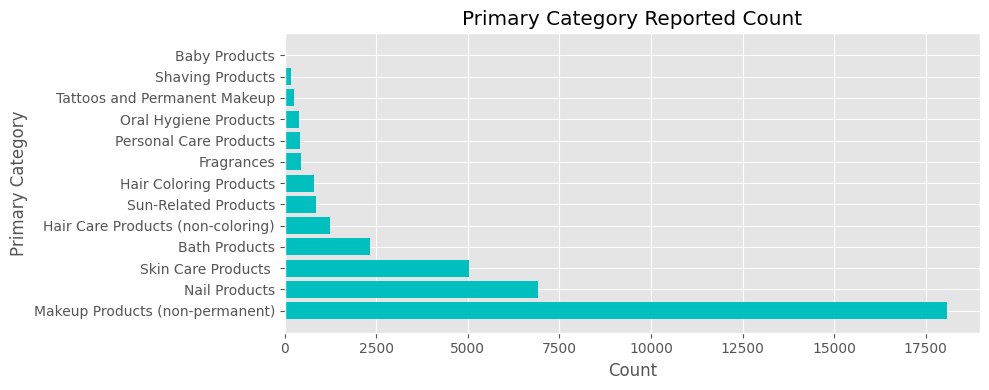

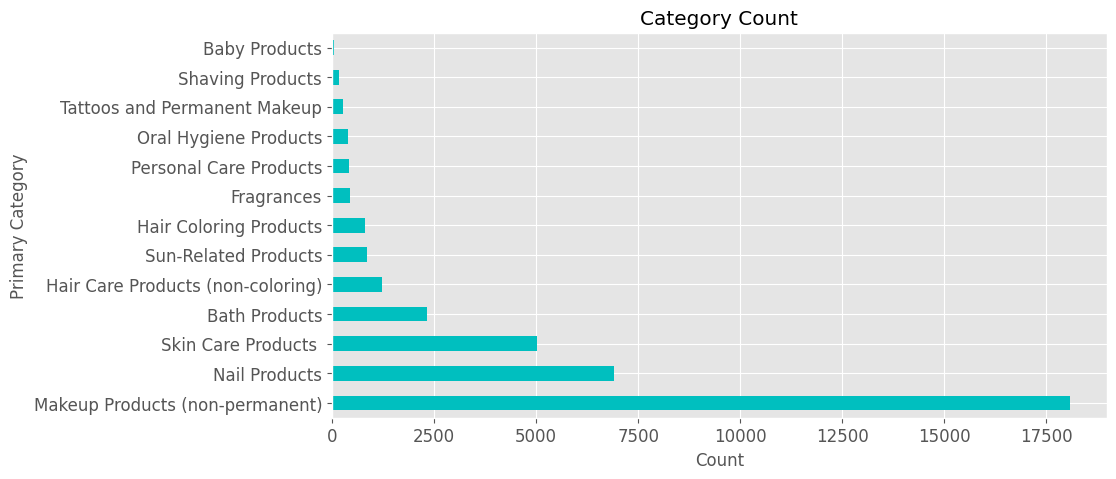

In [ ]:
fig, ax= plt.subplots(figsize= (10,4))
plt.barh(cc['index'], cc['Percent'], color='c')
plt.tight_layout()
plt.ylabel('Primary Category')
plt.xlabel('Count')
plt.title('Primary Category Reported Count')
plt.tight_layout()
fig, ax = plt.subplots(figsize = (10,5))
cgroup['PrimaryCategory'].value_counts().plot(kind='barh', color='c', fontsize =12, title = 'Category Count')
ax.set_xlabel('Count')
ax.set_ylabel('Primary Category')

In [ ]:
cat_percent = cgroup.PrimaryCategory.value_counts()*100/34908
cat_percent

Makeup Products (non-permanent)      51.781827
Nail Products                        19.820671
Skin Care Products                   14.406440
Bath Products                         6.703334
Hair Care Products (non-coloring)     3.543600
Sun-Related Products                  2.463619
Hair Coloring Products                2.297468
Fragrances                            1.243268
Personal Care Products                1.171651
Oral Hygiene Products                 1.094305
Tattoos and Permanent Makeup          0.753409
Shaving Products                      0.504182
Baby Products                         0.128910
Name: PrimaryCategory, dtype: float64

In [ ]:
cp = cat_percent.to_frame().reset_index()
cp = cp.rename(columns = {'PrimaryCategory':'Percent'})
##IMPORTANT INFO

Text(0.5, 1.0, 'Primary Category Reported Percentage')

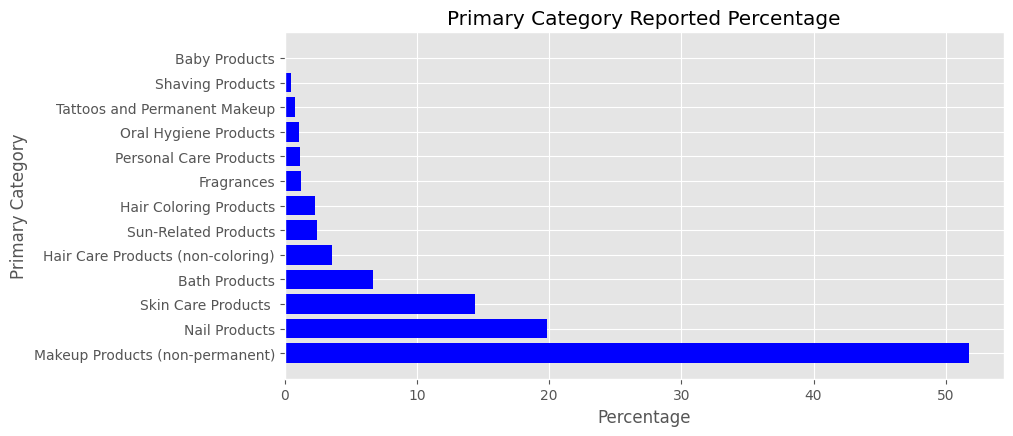

In [ ]:
fig, ax= plt.subplots(figsize= (10,4))
plt.barh(cp['index'], cp['Percent'], color='b')
plt.tight_layout()
plt.ylabel('Primary Category')
plt.xlabel('Percentage')
plt.title('Primary Category Reported Percentage')



Makeup Products (non-permanent)	51.781827

Nail Products	19.820671

Skin Care Products	14.406440

Chemical Count

In [ ]:
fig, ax = plt.subplots(figsize = (10,5))
cgroup['ChemicalCount'].value_counts().plot(kind='bar', color='r', fontsize =12, title = 'Chemical Count')
ax.set_xlabel('Chemical Count Per Product')
ax.set_ylabel('Frequency')
plt.tight_layout()

Chemical Name

In [ ]:
cdata[cdata['PrimaryCategoryId']=='44'].groupby(['ChemicalName']).count().sort_values(['CDPHId'], ascending=False)

CDPHId  ProductName  \
ChemicalName                                                              
Titanium dioxide                                     60198        60198   
Mica                                                  1671         1671   
Silica, crystalline (airborne particles of resp...    1457         1457   
Talc                                                  1442         1442   
Butylated hydroxyanisole                               959          959   
Retinol/retinyl esters, when in daily dosages i...     845          845   
Retinyl palmitate                                      682          682   
Carbon black                                           614          614   
Mineral oils, untreated and mildly treated             356          356   
Vitamin A palmitate                                    337          337   
Carbon black (airborne, unbound particles of re...     245          245   
Cosmetic talc                                          153          153   
Ginkgo biloba extract                                  126          126   
Triethanolamine                                        103          103   
Benzophenone                                            87           87   
Retinol                                                 83           83   
Titanium dioxide (airborne, unbound particles o...      60           60   
beta-Myrcene                                            59           59   
Trade Secret                                            46           46   
Formaldehyde (gas)                                      43           43   
Toluene                                                 40           40   
Ethanol in alcoholic beverages                          38           38   
Aloe vera, whole leaf extract                           35           35   
Benzophenone-3                                          34           34   
Quartz                                                  33           33   
Acetaldehyde                                            28           28   
N-Methylpyrrolidone                                     11           11   
Coffee extract                                          10           10   
Isopropyl alcohol manufacture using strong acids         9            9   
Talc (powder)                                            8            8   
Talc containing asbestiform fibers                       7            7   
Propylene glycol mono-t-butyl ether                      7            7   
Vitamin A                                                6            6   
Estragole                                                6            6   
Carbon-black extracts                                    6            6   
Cocamide diethanolamine                                  5            5   
C.I. Acid Red 114                                        5            5   
Caffeine                                                 4            4   
Methyleugenol                                            3            3   
Avobenzone                                               2            2   
Safrole                                                  2            2   
Coffea arabica extract                                   2            2   
Aloe vera, non-decolorized whole leaf extract            1            1   
Benz[a]anthracene                                        1            1   
Pulegone                                                 1            1   
Benzo[a]pyrene                                           1            1   
Coffee                                                   1            1   
Methanol                                                 1            1   
Hydrous magnesium silicate                               1            1   
Ethylene glycol                                          1            1   
Ethyl acrylate                                           1            1   
Diethanolamine                                           1            1   
2-

In [ ]:
c = cdata[cdata['PrimaryCategoryId']=='44']['ChemicalName'].value_counts()*100/100633
c = c.to_frame().reset_index()
c = c.rename(columns={'ChemicalName':'Percentage'})
#chemical percentage in MAKE UP NONPERMANENT category

In [ ]:
cdata['ChemicalName'].value_counts()*100/107512
#chemical used overall

Titanium dioxide                                                                                       81.614145
Silica, crystalline (airborne particles of respirable size)                                             2.300208
Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.     1.892812
Mica                                                                                                    1.708646
Carbon black                                                                                            1.586800
                                                                                                         ...    
Acetylsalicylic acid                                                                                    0.000930
2-Propyleneacrolein                                                                                     0.000930
Spironolactone                                                                                  

Chemical Name -> Trade Secret

In [ ]:
cdata[cdata['ChemicalName'] == 'Trade Secret']

CDPHId                                        ProductName  \
6604    2015                 bubblegum bubbles no tears shampoo   
12038   2902         fds feminine deodorant spray white blossom   
12149   2930                         lash primer - confidential   
12150   2930                         lash primer - confidential   
12184   2933          fds feminine deodorant spray ocean breeze   
...      ...                                                ...   
86457  31729                                     matte lipstick   
89236  32790                           som�rfield hair mask cap   
93287  33678     professional system heat protect & shine spray   
95624  34233  therapeutic dandruff shampoo 5% coal tar topic...   
98496  36193  meishoku moist-labo bb mineral pressed powder ...   

                    CSF           CompanyName                 BrandName  \
6604                NaN      farouksystemsinc                   BioSilk   
12038               NaN   albertoculverusainc                       FDS   
12149               NaN          melaleucainc  Sei Bella - Confidential   
12150               NaN          melaleucainc  Sei Bella - Confidential   
12184               NaN   albertoculverusainc                       FDS   
...                 ...                   ...                       ...   
86457               NaN               fmklabs                        YB   
89236           Perfume            plcosmetic                SOM�RFIELD   
93287  Titanium Dioxide             levladllc             Nature's Gate   
95624               NaN             vi-joninc                    Solimo   
98496               NaN  momotanijuntenkanltd                  MEISHOKU   

      PrimaryCategoryId                    PrimaryCategory  \
6604                  1                      Baby Products   
12038                74             Personal Care Products   
12149                44    Makeup Products (non-permanent)   
12150                44    Makeup Products (non-permanent)   
12184                74             Personal Care Products   
...                 ...                                ...   
86457                44    Makeup Products (non-permanent)   
89236                18  Hair Care Products (non-coloring)   
93287                18  Hair Care Products (non-coloring)   
95624                18  Hair Care Products (non-coloring)   
98496                44    Makeup Products (non-permanent)   

                                       SubCategory  ChemicalName  \
6604                                 Baby Shampoos  Trade Secret   
12038                          Feminine Deodorants  Trade Secret   
12149                     Mascara/Eyelash Products  Trade Secret   
12150                     Mascara/Eyelash Products  Trade Secret   
12184                          Feminine Deodorants  Trade Secret   
...                                            ...           ...   
86457   Lip Color - Lipsticks, Liners, and Pencils  Trade Secret   
89236                      Other Hair Care Product  Trade Secret   
93287                        Hair Styling Products  Trade Secret   
95624  Hair Shampoos with Anti-Dandruff properties  Trade Secret   
98496                                 Face Powders  Trade Secret   

       ChemicalCount InitialDateReported MostRecentDateReported  \
6604               0          2009-09-30             2009-09-30   
12038              0          2009-10-08             2009-12-15   
12149              1          2009-10-08             2014-06-25   
12150              1          2009-10-08             2014-06-25   
12184              0          2009-10-08             2009-10-08   
...              ...                 ...                    ...   
86457              1          2017-09-01             2017-09-01   
89236              1          2018-03-21             2018-05-07   
93287              1          2018-08-01             2019-06-14   
95624              1          2018-09-18             2018-09-18   
9

In [ ]:
tradesecret = cdata[cdata['ChemicalName'] == 'Trade Secret']
tradesecret
tradesecret.drop_duplicates()

CDPHId                                        ProductName  \
6604    2015                 bubblegum bubbles no tears shampoo   
12038   2902         fds feminine deodorant spray white blossom   
12149   2930                         lash primer - confidential   
12150   2930                         lash primer - confidential   
12184   2933          fds feminine deodorant spray ocean breeze   
...      ...                                                ...   
86457  31729                                     matte lipstick   
89236  32790                           som�rfield hair mask cap   
93287  33678     professional system heat protect & shine spray   
95624  34233  therapeutic dandruff shampoo 5% coal tar topic...   
98496  36193  meishoku moist-labo bb mineral pressed powder ...   

                    CSF           CompanyName                 BrandName  \
6604                NaN      farouksystemsinc                   BioSilk   
12038               NaN   albertoculverusainc                       FDS   
12149               NaN          melaleucainc  Sei Bella - Confidential   
12150               NaN          melaleucainc  Sei Bella - Confidential   
12184               NaN   albertoculverusainc                       FDS   
...                 ...                   ...                       ...   
86457               NaN               fmklabs                        YB   
89236           Perfume            plcosmetic                SOM�RFIELD   
93287  Titanium Dioxide             levladllc             Nature's Gate   
95624               NaN             vi-joninc                    Solimo   
98496               NaN  momotanijuntenkanltd                  MEISHOKU   

      PrimaryCategoryId                    PrimaryCategory  \
6604                  1                      Baby Products   
12038                74             Personal Care Products   
12149                44    Makeup Products (non-permanent)   
12150                44    Makeup Products (non-permanent)   
12184                74             Personal Care Products   
...                 ...                                ...   
86457                44    Makeup Products (non-permanent)   
89236                18  Hair Care Products (non-coloring)   
93287                18  Hair Care Products (non-coloring)   
95624                18  Hair Care Products (non-coloring)   
98496                44    Makeup Products (non-permanent)   

                                       SubCategory  ChemicalName  \
6604                                 Baby Shampoos  Trade Secret   
12038                          Feminine Deodorants  Trade Secret   
12149                     Mascara/Eyelash Products  Trade Secret   
12150                     Mascara/Eyelash Products  Trade Secret   
12184                          Feminine Deodorants  Trade Secret   
...                                            ...           ...   
86457   Lip Color - Lipsticks, Liners, and Pencils  Trade Secret   
89236                      Other Hair Care Product  Trade Secret   
93287                        Hair Styling Products  Trade Secret   
95624  Hair Shampoos with Anti-Dandruff properties  Trade Secret   
98496                                 Face Powders  Trade Secret   

       ChemicalCount InitialDateReported MostRecentDateReported  \
6604               0          2009-09-30             2009-09-30   
12038              0          2009-10-08             2009-12-15   
12149              1          2009-10-08             2014-06-25   
12150              1          2009-10-08             2014-06-25   
12184              0          2009-10-08             2009-10-08   
...              ...                 ...                    ...   
86457              1          2017-09-01             2017-09-01   
89236              1          2018-03-21             2018-05-07   
93287              1          2018-08-01             2019-06-14   
95624              1          2018-09-18             2018-09-18   
9

In [ ]:
tradesecret.CompanyName.value_counts()


farouksystemsinc              263
lumeneoy                       74
rollandsrl                     21
albertoculverusainc            12
demeterfragrancelibraryinc     10
greatclipsinc                   9
fmklabs                         8
albertoculver                   5
janmariniskinresearchinc        3
regiscorporation                3
melaleucainc                    2
henkelcorporation               1
ca-botanainternational          1
plcosmetic                      1
levladllc                       1
vi-joninc                       1
momotanijuntenkanltd            1
Name: CompanyName, dtype: int64

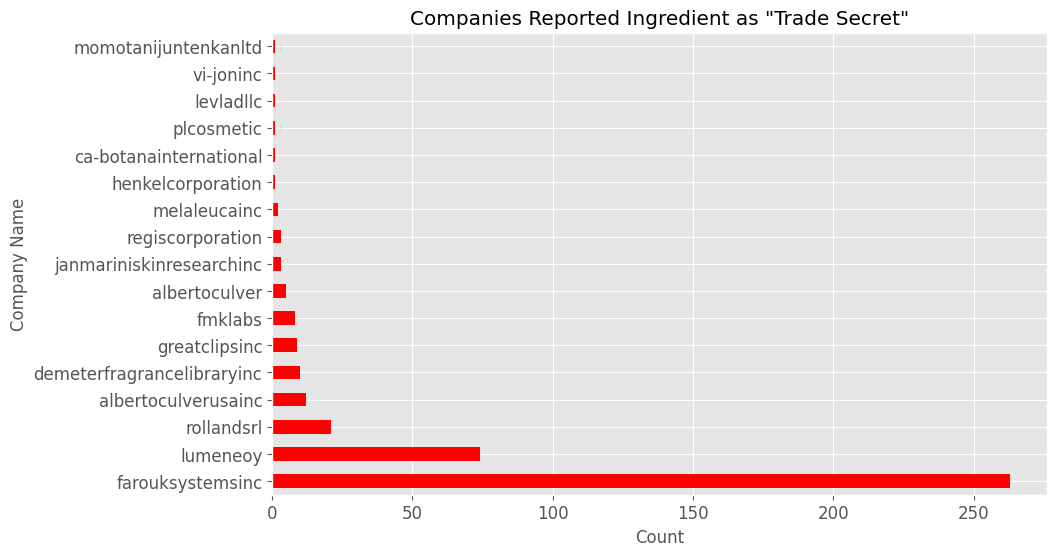

In [ ]:
fig, ax= plt.subplots(figsize = (10,6))
tradesecret.CompanyName.value_counts().plot(kind='barh', color = 'r', fontsize=12, title = 'Companies Reported Ingredient as "Trade Secret"')
plt.xlabel('Count')
plt.ylabel('Company Name')
plt.show()

If an ingredient is reported as a "trade secret" to the CSCP, it implies that the ingredient(s) may cause cancer, birth defects or reproductive harm, but the reporting company has decided to keep it confidential as it offers them some economic advantage; however, such confidential information is still subject to CSCP reporting requirements, and the CDPH cannot share this information publicly unless it is deemed not confidential or a trade secret after an investigation.

Let's explore Farouk Systems Inc more, because they look SUS

Farouk Systems, Inc. is a Houston-based company of hairdressers for hairdressers, known for manufacturing high-quality professional hair care products under the industry-leading brands CHI®, BioSilk®, and SunGlitz®.

In [ ]:
farouk = cdata[cdata['CompanyName'] == 'farouksystemsinc']
farouk

CDPHId                                        ProductName  CSF  \
6604    2015                 bubblegum bubbles no tears shampoo  NaN   
14700   3368             bubblegum bubbles fun body foam (blue)  NaN   
15020   3463  bubblegum bubbles fun body foam grape-tacular ...  NaN   
15035   3466     bubblegum bubbles fun body foam bubblegum pink  NaN   
15078   3480                             biosilk smoothing balm  NaN   
...      ...                                                ...  ...   
19145   4656                       color vision white brightner  NaN   
19146   4657                                    white lightener  NaN   
19152   4662              chromatic color white virtual reality  NaN   
19153   4663                                            bad azz  NaN   
21911   5886                             diamondglitz lightener  NaN   

            CompanyName  BrandName PrimaryCategoryId  \
6604   farouksystemsinc    BioSilk                 1   
14700  farouksystemsinc    BioSilk                 6   
15020  farouksystemsinc    BioSilk                 6   
15035  farouksystemsinc    BioSilk                 6   
15078  farouksystemsinc    BioSilk                18   
...                 ...        ...               ...   
19145  farouksystemsinc   Sunglitz                18   
19146  farouksystemsinc   Sunglitz                18   
19152  farouksystemsinc  Chromatic                32   
19153  farouksystemsinc    BioSilk                18   
21911  farouksystemsinc   Sunglitz                32   

                         PrimaryCategory                    SubCategory  \
6604                       Baby Products                  Baby Shampoos   
14700                      Bath Products  Bubble and Foam Bath Products   
15020                      Bath Products  Bubble and Foam Bath Products   
15035                      Bath Products  Bubble and Foam Bath Products   
15078  Hair Care Products (non-coloring)          Hair Styling Products   
...                                  ...                            ...   
19145  Hair Care Products (non-coloring)          Hair Styling Products   
19146  Hair Care Products (non-coloring)          Hair Styling Products   
19152             Hair Coloring Products     Hair Lighteners with Color   
19153  Hair Care Products (non-coloring)          Hair Styling Products   
21911             Hair Coloring Products                  Hair Bleaches   

           ChemicalName  ChemicalCount InitialDateReported  \
6604       Trade Secret              0          2009-09-30   
14700      Trade Secret              1          2009-10-12   
15020      Trade Secret              1          2009-10-12   
15035      Trade Secret              1          2009-10-12   
15078  Titanium dioxide              1          2009-10-12   
...                 ...            ...                 ...   
19145      Trade Secret              1          2009-10-14   
19146  Titanium dioxide              1          2009-10-14   
19152      Trade Secret              1          2009-10-14   
19153      Trade Secret              1          2009-10-14   
21911      Trade Secret              1          2009-10-16   

      MostRecentDateReported DiscontinuedDate ChemicalCreatedAt  \
6604              2009-09-30              NaT        2009-09-30   
14700             2009-10-12              NaT        2009-10-12   
15020             2009-10-12              NaT        2009-10-12   
15035             2009-10-12              NaT        2009-10-12   
15078             2018-01-18              NaT        2009-10-12   
...                      ...              ...               ...   
19145             2009-10-14              NaT        2009-10-14   
19146             2018-01-18              NaT        2009-10-14   
19152             2009-10-14              NaT        2009-10-14   
19153             2009-10-14              NaT        2009-10-14   
21911             2009-10-16              NaT        2009-10-16   

      ChemicalUpd

In [ ]:
farouk.nunique()

CDPHId                    266
ProductName               262
CSF                         0
CompanyName                 1
BrandName                   8
PrimaryCategoryId           5
PrimaryCategory             5
SubCategory                13
ChemicalName                2
ChemicalCount               3
InitialDateReported         5
MostRecentDateReported     10
DiscontinuedDate            0
ChemicalCreatedAt           5
ChemicalUpdatedAt           7
ChemicalDateRemoved         2
dtype: int64

In [ ]:
farouk_cat = farouk.groupby(['PrimaryCategory'])
farouk_cat.count().sort_values(by=['CDPHId'], ascending=False)[['CDPHId']].plot(kind='barh')

<Axes: ylabel='PrimaryCategory'>

In [ ]:
farouk[farouk['ChemicalName']=='Trade Secret'].count()

CDPHId                    263
ProductName               263
CSF                         0
CompanyName               263
BrandName                 263
PrimaryCategoryId         263
PrimaryCategory           263
SubCategory               263
ChemicalName              263
ChemicalCount             263
InitialDateReported       263
MostRecentDateReported    263
DiscontinuedDate            0
ChemicalCreatedAt         263
ChemicalUpdatedAt         263
ChemicalDateRemoved         2
dtype: int64

1. 266 products, only have 2 ingredients Trade Secret and Titanium Diox

2. 263 products out of 266 reported include 'Trade Secret'

In [ ]:
farouksecret = tradesecret[tradesecret['CompanyName']=='farouksystemsinc']
farouksecret

CDPHId                                        ProductName  CSF  \
6604    2015                 bubblegum bubbles no tears shampoo  NaN   
14700   3368             bubblegum bubbles fun body foam (blue)  NaN   
15020   3463  bubblegum bubbles fun body foam grape-tacular ...  NaN   
15035   3466     bubblegum bubbles fun body foam bubblegum pink  NaN   
15086   3488       chi scentuals mango melon hand and body wash  NaN   
...      ...                                                ...  ...   
19138   4653                               zero gravity promade  NaN   
19145   4656                       color vision white brightner  NaN   
19152   4662              chromatic color white virtual reality  NaN   
19153   4663                                            bad azz  NaN   
21911   5886                             diamondglitz lightener  NaN   

            CompanyName  BrandName PrimaryCategoryId  \
6604   farouksystemsinc    BioSilk                 1   
14700  farouksystemsinc    BioSilk                 6   
15020  farouksystemsinc    BioSilk                 6   
15035  farouksystemsinc    BioSilk                 6   
15086  farouksystemsinc        CHI                 6   
...                 ...        ...               ...   
19138  farouksystemsinc    BioSilk                18   
19145  farouksystemsinc   Sunglitz                18   
19152  farouksystemsinc  Chromatic                32   
19153  farouksystemsinc    BioSilk                18   
21911  farouksystemsinc   Sunglitz                32   

                         PrimaryCategory                    SubCategory  \
6604                       Baby Products                  Baby Shampoos   
14700                      Bath Products  Bubble and Foam Bath Products   
15020                      Bath Products  Bubble and Foam Bath Products   
15035                      Bath Products  Bubble and Foam Bath Products   
15086                      Bath Products          Body Washes and Soaps   
...                                  ...                            ...   
19138  Hair Care Products (non-coloring)          Hair Styling Products   
19145  Hair Care Products (non-coloring)          Hair Styling Products   
19152             Hair Coloring Products     Hair Lighteners with Color   
19153  Hair Care Products (non-coloring)          Hair Styling Products   
21911             Hair Coloring Products                  Hair Bleaches   

       ChemicalName  ChemicalCount InitialDateReported MostRecentDateReported  \
6604   Trade Secret              0          2009-09-30             2009-09-30   
14700  Trade Secret              1          2009-10-12             2009-10-12   
15020  Trade Secret              1          2009-10-12             2009-10-12   
15035  Trade Secret              1          2009-10-12             2009-10-12   
15086  Trade Secret              1          2009-10-12             2009-10-12   
...             ...            ...                 ...                    ...   
19138  Trade Secret              1          2009-10-14             2009-10-14   
19145  Trade Secret              1          2009-10-14             2009-10-14   
19152  Trade Secret              1          2009-10-14             2009-10-14   
19153  Trade Secret              1          2009-10-14             2009-10-14   
21911  Trade Secret              1          2009-10-16             2009-10-16   

      DiscontinuedDate ChemicalCreatedAt ChemicalUpdatedAt ChemicalDateRemoved  
6604               NaT        2009-09-30        2009-10-13          2009-10-13  
14700              NaT        2009-10-12        2009-10-12                 NaT  
15020              NaT        2009-10-12        2009-10-12                 NaT  
15035              NaT        2009-10-12        2009-10-12                 NaT  
15086              NaT        2009-10-12        2009-10-12                 NaT  
...                ...               ...               ...                 ...  
19138              NaT     

<Axes: ylabel='BrandName'>

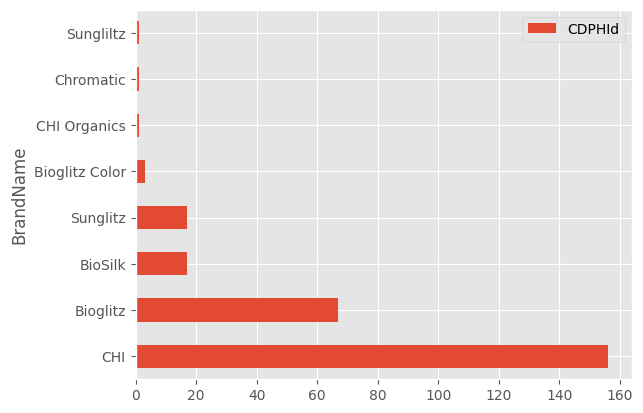

In [ ]:
fbrand = farouksecret.groupby(['BrandName']).count().sort_values(by=['CDPHId'], ascending=False)[['CDPHId']]
fbrand.plot(kind='barh')

Count of Chemical Names

<ipython-input-54-c2b80049e0ed>:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


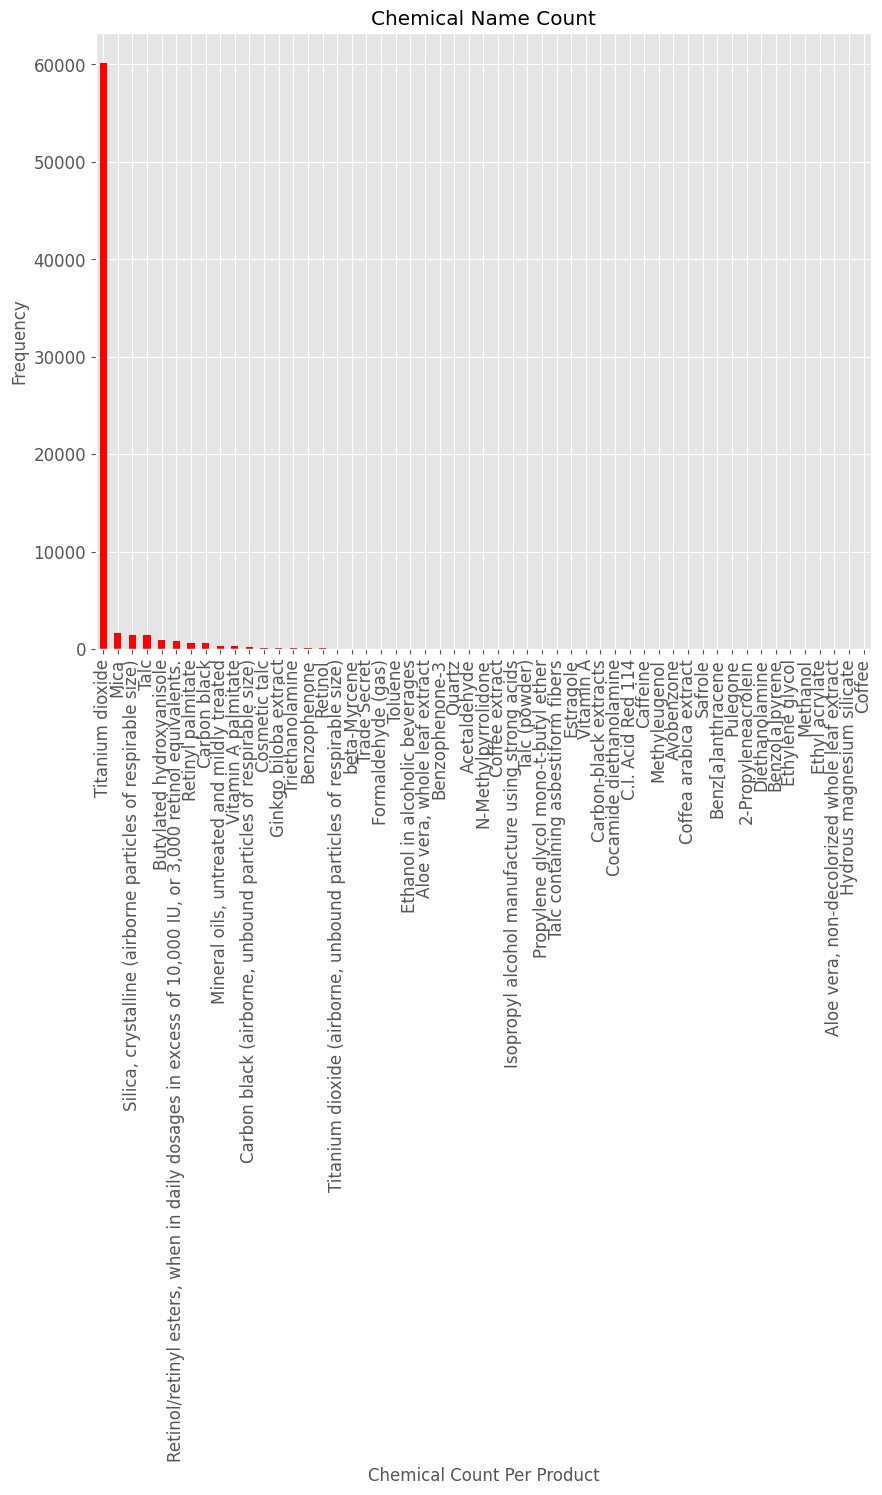

In [ ]:
fig, ax = plt.subplots(figsize = (10,8))
cdata[cdata['PrimaryCategoryId']=='44']['ChemicalName'].value_counts().plot(kind='bar', color='r', fontsize =12, title = 'Chemical Name Count')
ax.set_xlabel('Chemical Count Per Product')
ax.set_ylabel('Frequency')
plt.tight_layout()

In [ ]:
# Each category and the chemicals
pivot_df = cdata.pivot_table(index='PrimaryCategory', columns='ChemicalName', values='CDPHId', aggfunc='count')
#pivot_df

In [ ]:
pivot_df.loc[:,:].plot.bar(stacked=True, figsize=(10,10))
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.tight_layout()


<ipython-input-56-246e2da9a0aa>:3: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


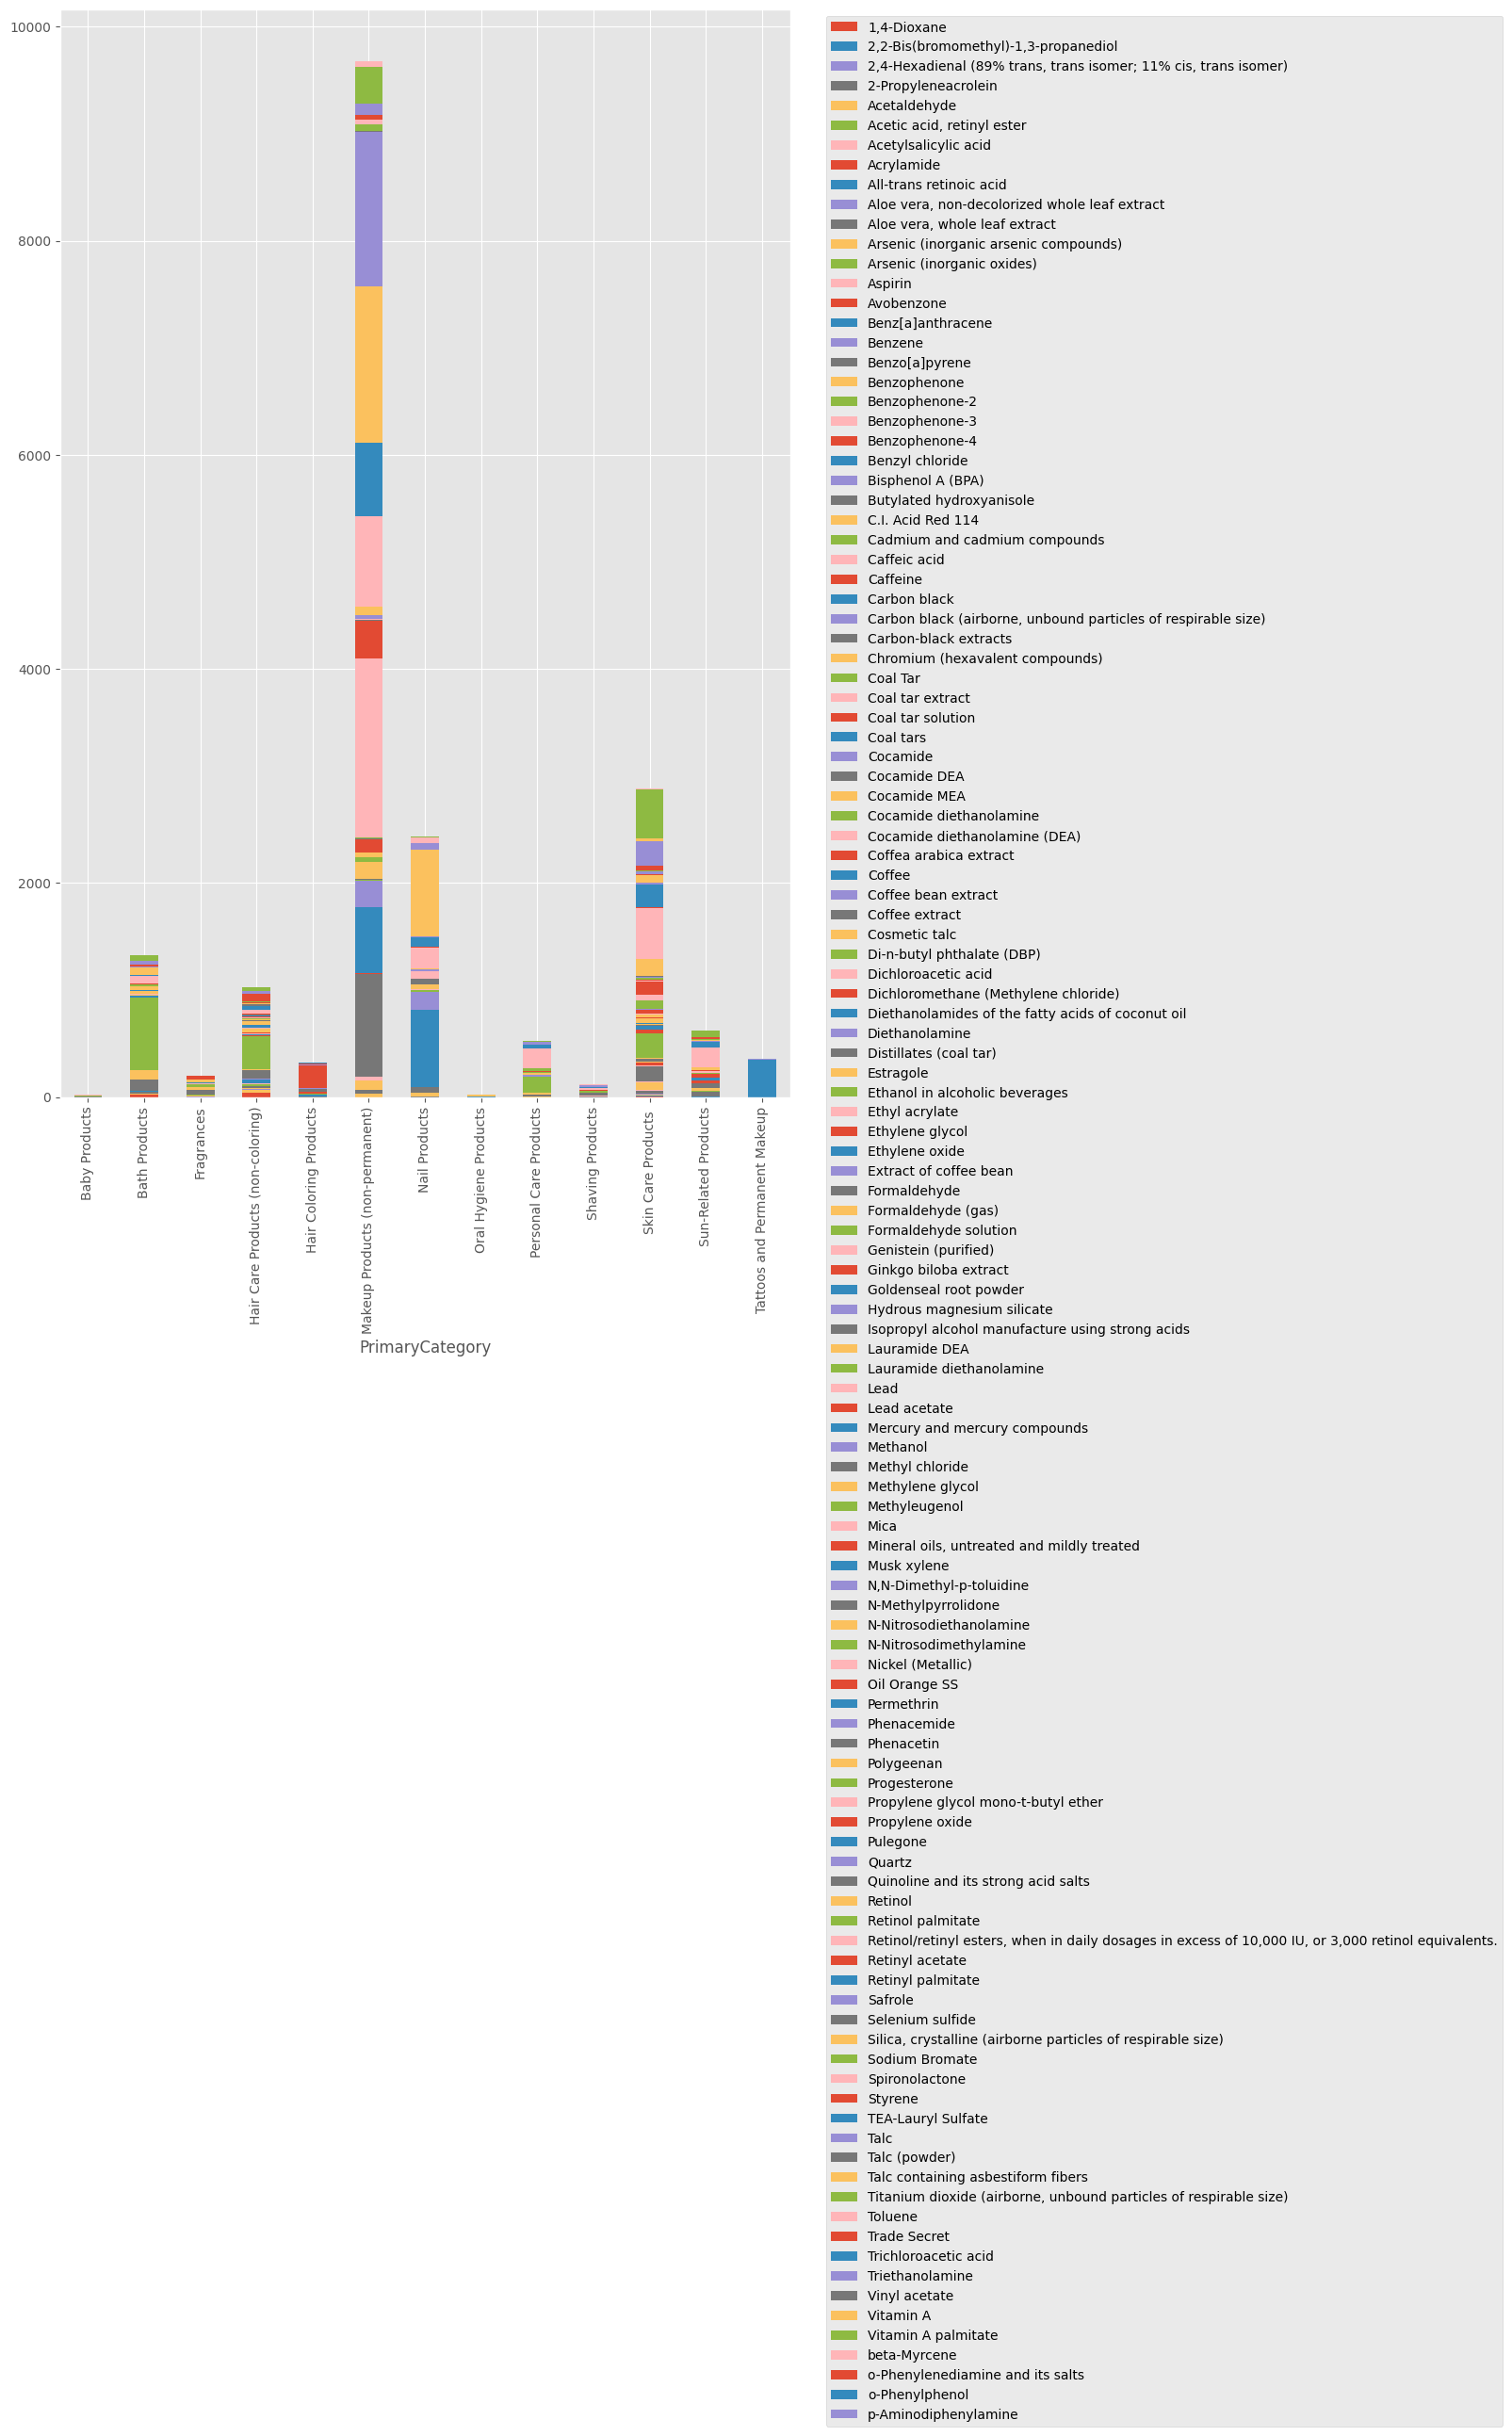

In [ ]:
#plot w/o titanium
pivot_df.loc[:,pivot_df.columns !='Titanium dioxide'].plot.bar(stacked=True, figsize=(10,15))
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

In [ ]:
chem = cdata.ChemicalName.value_counts()*100/107512
chem = chem.to_frame().reset_index()
chem = chem.rename(columns = {'ChemicalName':'Percentage'})
chem = chem[chem.Percentage >= chem.Percentage.mean()]
chem

index  Percentage
0                                   Titanium dioxide   81.614145
1  Silica, crystalline (airborne particles of res...    2.300208
2  Retinol/retinyl esters, when in daily dosages ...    1.892812
3                                               Mica    1.708646
4                                       Carbon black    1.586800
5                                               Talc    1.427748
6                            Cocamide diethanolamine    1.285438
7                           Butylated hydroxyanisole    1.212888
8                                  Retinyl palmitate    1.053836
9                                Vitamin A palmitate    0.892924

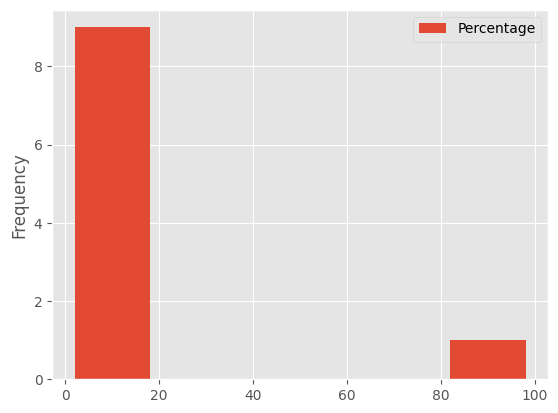

In [ ]:
chem[['Percentage']].plot(kind='hist',bins=[0,20,40,60,80,100],rwidth=0.8)
plt.show()

In [ ]:
100-chem['Percentage'].sum()

5.024555398467129

In [ ]:
chem =chem.append({'index':'Other Chemicals', 'Percentage':100-chem['Percentage'].sum()}, ignore_index=True)
chem

<ipython-input-61-c6bf0c9a677e>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  chem =chem.append({'index':'Other Chemicals', 'Percentage':100-chem['Percentage'].sum()}, ignore_index=True)


index  Percentage
0                                    Titanium dioxide   81.614145
1   Silica, crystalline (airborne particles of res...    2.300208
2   Retinol/retinyl esters, when in daily dosages ...    1.892812
3                                                Mica    1.708646
4                                        Carbon black    1.586800
5                                                Talc    1.427748
6                             Cocamide diethanolamine    1.285438
7                            Butylated hydroxyanisole    1.212888
8                                   Retinyl palmitate    1.053836
9                                 Vitamin A palmitate    0.892924
10                                    Other Chemicals    5.024555

<ipython-input-62-ecec387690f0>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels('Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents',wrap=True)


[Text(0, 0.0, 'R'),
 Text(0, 10000.0, 'e'),
 Text(0, 20000.0, 't'),
 Text(0, 30000.0, 'i'),
 Text(0, 40000.0, 'n'),
 Text(0, 50000.0, 'o'),
 Text(0, 60000.0, 'l'),
 Text(0, 70000.0, '/')]

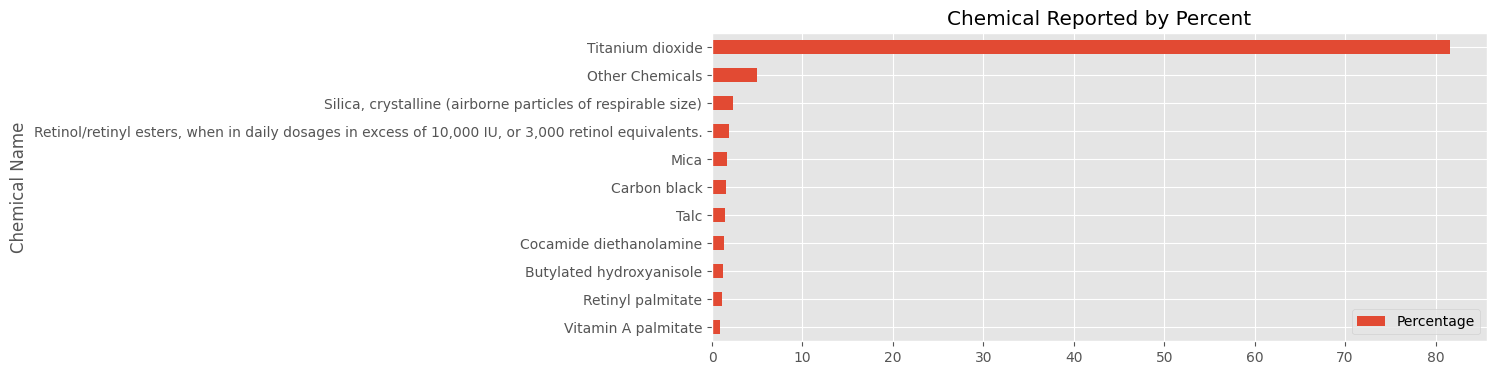

In [ ]:
chem = chem.sort_values(by=['Percentage'])
chem.plot(kind='barh', x='index', y='Percentage', title = 'Chemical Reported by Percent', figsize = (10,4))
plt.ylabel('Chemical Name')
ax.set_yticklabels('Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents',wrap=True)



In [ ]:
chemlist = [c for c in chem['index']]
chemlist

['Vitamin A palmitate',
 'Retinyl palmitate',
 'Butylated hydroxyanisole',
 'Cocamide diethanolamine',
 'Talc',
 'Carbon black',
 'Mica',
 'Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.',
 'Silica, crystalline (airborne particles of respirable size)',
 'Other Chemicals',
 'Titanium dioxide']

In [ ]:
chemdict = {}
for c in chem['index']:
    if c not in chemdict:
        chemdict[c] =1

Text(0, 0.5, 'Count')

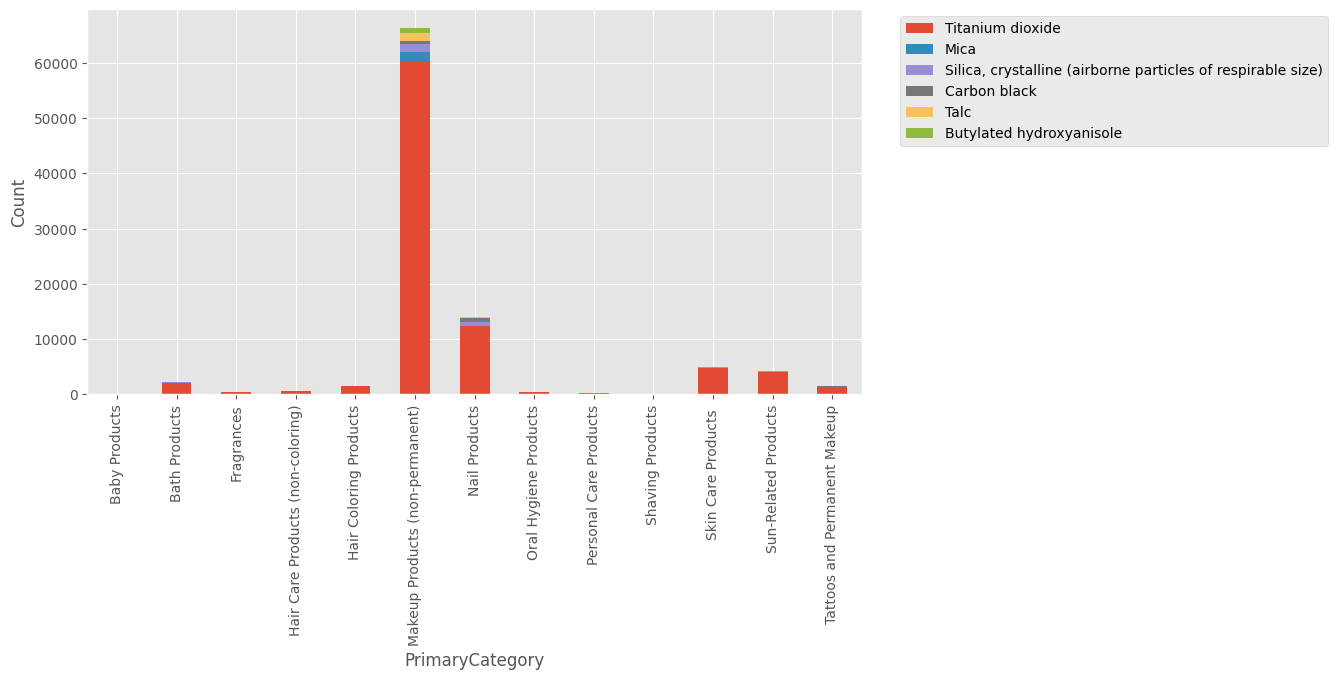

In [ ]:
#high chems and other chems
pivot_df.loc[:,['Titanium dioxide', 'Mica','Silica, crystalline (airborne particles of respirable size)','Carbon black','Talc','Butylated hydroxyanisole']].plot.bar(stacked=True, figsize=(10,5))
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.ylabel('Count')


From the graph, we can devis that Makeup Products are the most in the dataset -

1. make up subcategory

2. Blushes, Eye Shadow, Eyeliner/Eyebrow Pencils, Face Powders, Foundations and Bases, Lip Balm (making a cosmetic claim), Lip Color - Lipsticks, Liners, and Pencils, Lip Gloss/Shine, Makup Fixatives, Makeup Preparations, Mascara/Eyelash Products, Paints (e.g. facial, body), Rouges, Other Makeup Productexamine MAKE UP PRODUCT (non-permanent) category**

3. most used chemical

In [ ]:
makeup_sub = ['Blushes', 'Eye Shadow', 'Eyeliner/Eyebrow Pencils', 'Face Powders', 'Foundations and Bases', 'Lip Balm (making a cosmetic claim)', 'Lip Color - Lipsticks, Liners, and Pencils', 'Lip Gloss/Shine', 'Makup Fixatives', 'Makeup Preparations', 'Mascara/Eyelash Products', 'Paints (e.g. facial, body)', 'Rouges', 'Other Makeup Product']

In [ ]:
len(makeup_sub)

14

In [ ]:
makeupsub = cgroup[cgroup.PrimaryCategory == 'Makeup Products (non-permanent)']

In [ ]:
fig, ax = plt.subplots(figsize = (10,5))
makeupsub['SubCategory'].value_counts().plot(kind='barh', color='b', fontsize =12, title = 'Non-Permanent Makeup SubCategory Count')
ax.set_xlabel('Count')
ax.set_ylabel('SubCategory')

Text(0, 0.5, 'SubCategory')

Text(0, 0.5, 'SubCategory')

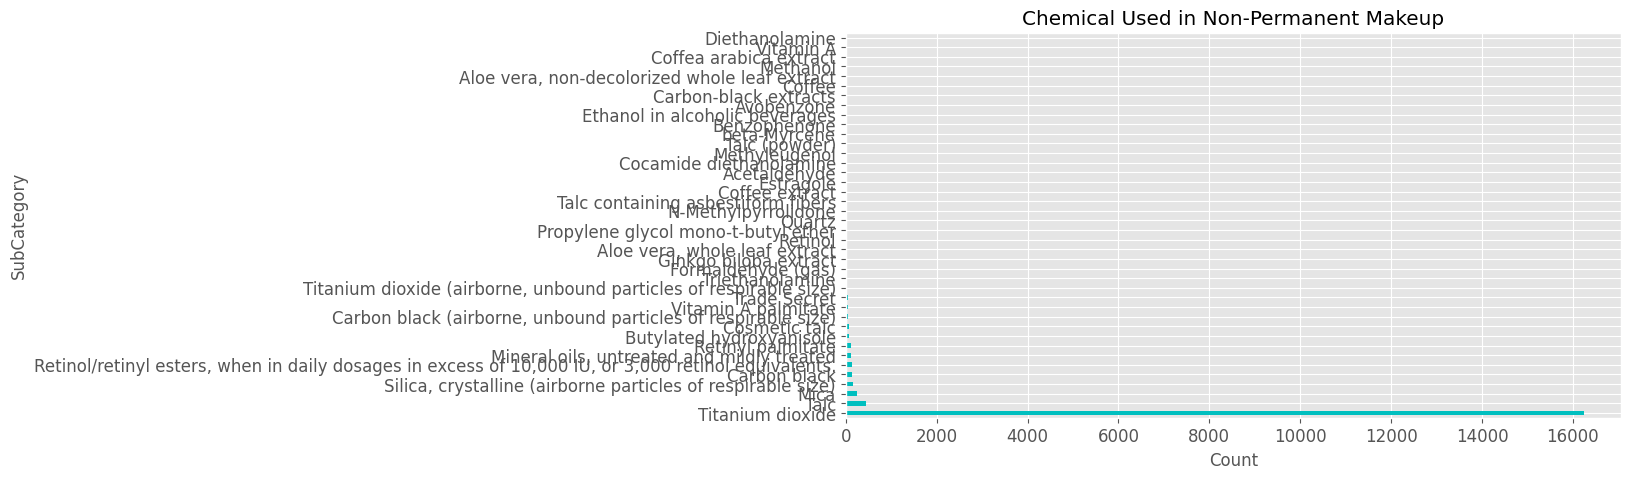

In [ ]:
#plot most used chemical in non-permanent make up
fig, ax = plt.subplots(figsize = (10,5))
makeupsub['ChemicalName'].value_counts().plot(kind='barh', color='c', fontsize =12, title = 'Chemical Used in Non-Permanent Makeup')
ax.set_xlabel('Count')
ax.set_ylabel('SubCategory')

Company Names

In [ ]:
comp = cgroup.CompanyName.value_counts()*100/34908
comp = comp.to_frame().reset_index()
comp = comp.rename(columns = {'CompanyName':'Percentage'})
comp

index  Percentage
0     americaninternationalindustries    5.626217
1                 nailalliance-entity    4.534777
2    revlonconsumerproductcorporation    4.176693
3                   amorepacificusinc    3.105305
4                          l'orealusa    3.013636
..                                ...         ...
593            imperialdaxhaircareinc    0.002865
594                fantasiaindustries    0.002865
595                   houseofcheatham    0.002865
596            cosmeticdermatologyinc    0.002865
597                 hayashitecnicallc    0.002865

[598 rows x 2 columns]

584 companies reported

34908 reported products

Text(0, 0.5, 'Count')

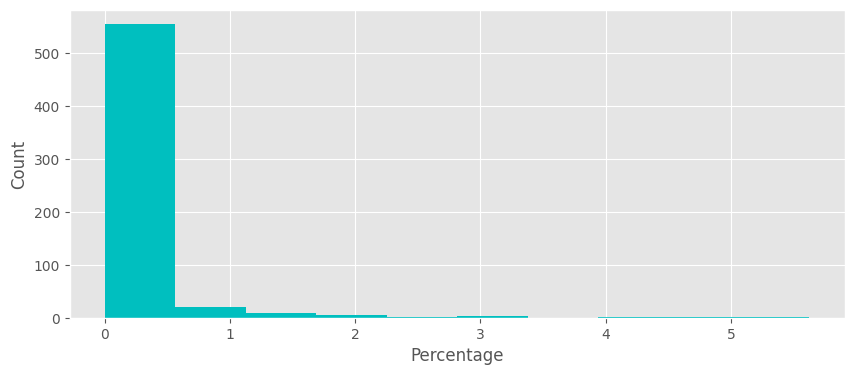

In [ ]:
plt.subplots(figsize=(10,4))
plt.hist(comp.Percentage, color='c')
plt.xlabel('Percentage')
plt.ylabel('Count')

In [ ]:
#CRITERIA to determine interesting/meaningful company data to look further into
comp[comp.Percentage >= 1]

index  Percentage
0    americaninternationalindustries    5.626217
1                nailalliance-entity    4.534777
2   revlonconsumerproductcorporation    4.176693
3                  amorepacificusinc    3.105305
4                         l'orealusa    3.013636
5                buth-na-bodhaigeinc    2.993583
6           theprocter&gamblecompany    2.598258
7           anastasiabeverlyhillsllc    2.360490
8                hand&nailharmonyinc    2.165693
9             victoria'ssecretbeauty    2.128452
10                                s+    2.085482
11                              coty    1.990948
12                        newavonllc    1.925060
13                   nailalliancellc    1.761774
14                         vi-joninc    1.604217
15           arbonneinternationalllc    1.584164
16                           lushltd    1.501089
17                 toofacedcosmetics    1.472442
18                thebootscompanyplc    1.383637
19                    bath&bodyworks    1.312020
20                     yvesrocherinc    1.274779
21                         zoevagmbh    1.240403
22                    tartecosmetics    1.197433
23                 elizabethardeninc    1.088576
24              parfumschristiandior    1.051335
25                  benefitcosmetics    1.011230
26                   armanddupreeinc    1.002635

In [ ]:
comp[comp.Percentage > comp.Percentage.mean()]

index  Percentage
0     americaninternationalindustries    5.626217
1                 nailalliance-entity    4.534777
2    revlonconsumerproductcorporation    4.176693
3                   amorepacificusinc    3.105305
4                          l'orealusa    3.013636
..                                ...         ...
101     edgewellpersonalcarebrandsllc    0.191933
102                 ivyenterprisesinc    0.186204
103             sunpharmaceuticalsllc    0.180474
104                        hudabeauty    0.180474
105           olympicmountainproducts    0.177610

[106 rows x 2 columns]

In [ ]:
#comp[comp.Percentage > comp.Percentage.median()]

In [ ]:
comp[comp.Percentage > comp.Percentage.quantile(0.90)].count()

index         60
Percentage    60
dtype: int64

In [ ]:
# company with highest percentage reported product
brand_a = cgroup[cgroup['CompanyName'] == 'americaninternationalindustries']
brand_a.groupby(['BrandName']).count().sort_values(by=['ProductName'], ascending=False)

CDPHId  ProductName  CSF  CompanyName  PrimaryCategoryId  \
BrandName                                                                      
China Glaze            441          441    0          441                441   
IBD                    406          406    0          406                406   
EzFlow                 253          253    0          253                253   
Salon Perfect           98           98    0           98                 98   
Seche                   88           88    0           88                 88   
SuperNail               79           79    0           79                 79   
Super Nail              42           42    0           42                 42   
Body Drench             41           41    0           41                 41   
Gelaze                  40           40    0           40                 40   
IBD Just Gel            34           34    0           34                 34   
Ardell                  32           32    0           32                 32   
GiGi                    27           27    0           27                 27   
Clubman                 26           26    0           26                 26   
Seche Vite              26           26    0           26                 26   
Ceramic Glaze           25           25    0           25                 25   
IBD Gelac               24           24    0           24                 24   
Fright Night            23           23    0           23                 23   
ESN                     22           22    0           22                 22   
It's So Easy            20           20    0           20                 20   
EzFlow Trugel           19           19    0           19                 19   
SuperNail Progel        18           18    0           18                 18   
EzFlow Gelez            18           18    0           18                 18   
SuperNail Pro Gel       16           16    0           16                 16   
Super Nail Gelous       16           16    0           16                 16   
Woody's                 15           15    0           15                 15   
Gena                    15           15    0           15                 15   
Streaks 'N' Tips        13           13    0           13                 13   
Andrea                  12           12    0           12                 12   
Clean + Easy            12           12    0           12                 12   
China Glaze Gelaze       8            8    0            8                  8   
Frutique                 7            7    0            7                  7   
Nail Tek                 5            5    0            5                  5   
Correctionist            5            5    0            5                  5   
Surgi                    4            4    0            4                  4   
Duo                      3            3    0            3                  3   
Medi-Dan                 3            3    0            3                  3   
Bye Bye Blemish          3            3    0            3                  3   
Youthair                 3            3    0            3                  3   
Ardell, Andrea           2            2    0            2                  2   
ProLinc                  1            1    0            1                  1   
Checi                    1            1    0            1                  1   
Woody Bump Repair        1            1    0            1                  1   
Three Flowers            1            1    0            1                  1   
N'RAGE                   1            1    0            1                  1   
Bay Bay Blemish          1            1    0            1                  1   
EFlow Gelez              1            1    0            1                  1   
SuperNail Gelous         1            1    0            1                  1   
SuperNail                1            1    0            1                  1   
IBD                 

DATE

In [ ]:
cdata['MostRecentDateReported'].sort_values()

1       2009-07-01
2       2009-07-01
36      2009-08-11
37      2009-08-11
46      2009-08-18
           ...    
28694   2020-06-24
28513   2020-06-24
28512   2020-06-24
28507   2020-06-24
28772   2020-06-24
Name: MostRecentDateReported, Length: 107310, dtype: datetime64[ns]

In [ ]:
cdata['InitialDateReported'].sort_values()

0        2009-06-17
1        2009-07-01
2        2009-07-01
3        2009-07-09
4        2009-07-09
            ...    
114628   2020-06-19
114627   2020-06-19
114626   2020-06-19
114629   2020-06-19
114634   2020-06-23
Name: InitialDateReported, Length: 107310, dtype: datetime64[ns]

earliest initialdatereported is 2009-06-16, latest is 2022-06-22

earliest mostrecentdatereported is 2009-06-30, latest is 2022-06-23


In [ ]:
cdata['InitialDateReported'].value_counts()

2009-10-13    2283
2009-10-08    1781
2009-10-15    1564
2009-10-12    1515
2009-10-07    1507
              ... 
2016-07-05       1
2016-04-18       1
2016-03-18       1
2016-02-02       1
2020-06-23       1
Name: InitialDateReported, Length: 2274, dtype: int64

In [ ]:
fig,ax= plt.subplots(figsize=(10,4))
cdata['InitialDateReported'].plot()
#not super helpful plot

<Axes: >

In [ ]:
fig,ax= plt.subplots(figsize=(10,4))
ax.plot(cdata['InitialDateReported'].unique(), cdata.InitialDateReported.value_counts())
ax.set_xlabel('Counts')
ax.set_ylabel('Year')

Text(0, 0.5, 'Year')

company reports have gone down over the years, probably they majorly reported during 2009.

<Axes: >

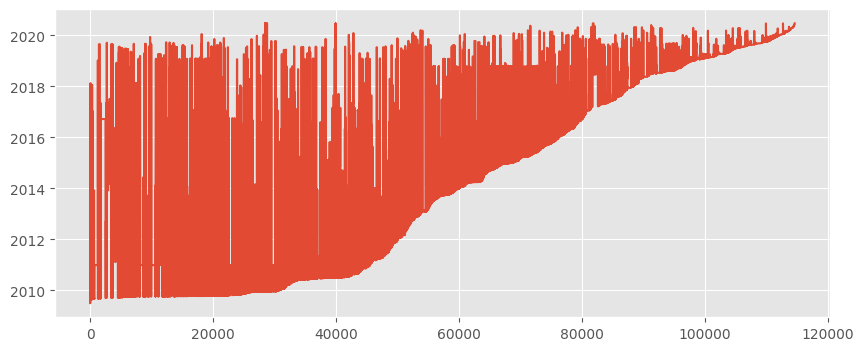

In [ ]:
fig,ax= plt.subplots(figsize=(10,4))
cdata['MostRecentDateReported'].plot()

(1.0, 1750.0)

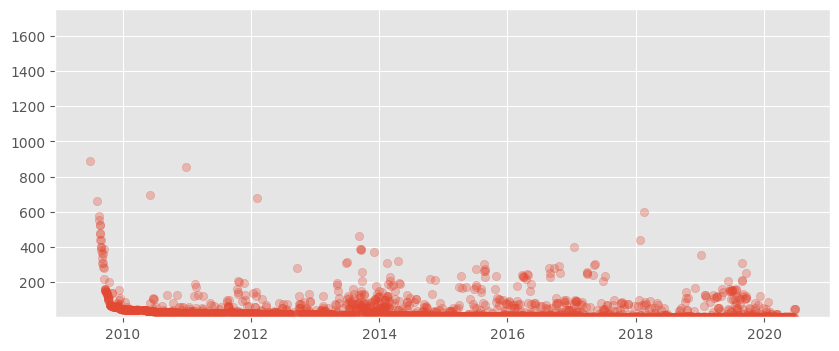

In [ ]:
fig,ax= plt.subplots(figsize=(10,4))
ax.scatter(cdata['MostRecentDateReported'].unique(), cdata.MostRecentDateReported.value_counts(), alpha=0.3)
ax.set_ylim(1,1750)


<Axes: >

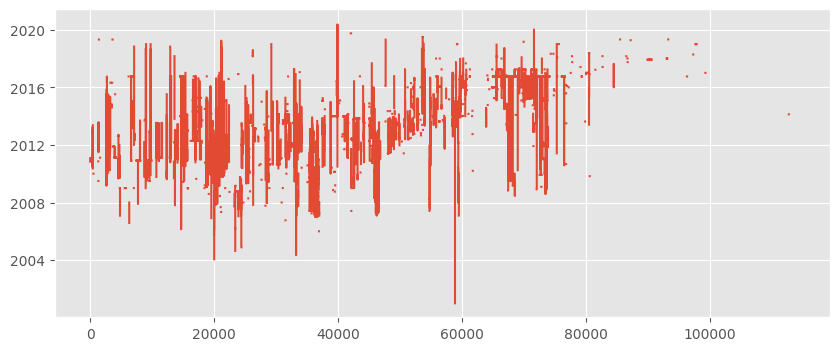

In [ ]:
fig,ax= plt.subplots(figsize=(10,4))
cdata['DiscontinuedDate'].plot()

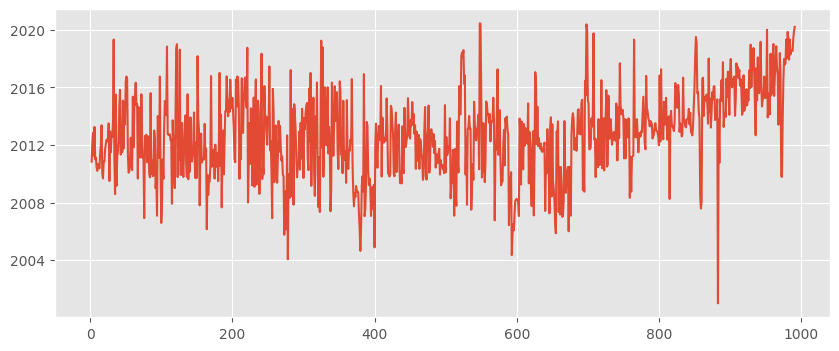

In [ ]:
fig,ax= plt.subplots(figsize=(10,4))
ax.plot(cdata['DiscontinuedDate'].unique())

In [ ]:
inidate = cgroup.InitialDateReported.value_counts()
inidate = inidate.to_frame().reset_index()
inidate = inidate.rename(columns = {'InitialDateReported':'Count'})

In [ ]:
mrdate = cgroup.MostRecentDateReported.value_counts()
mrdate = mrdate.to_frame().reset_index()
mrdate = mrdate.rename(columns = {'MostRecentDateReported':'Count'})

In [ ]:
disdate = cgroup.DiscontinuedDate.value_counts()
disdate = disdate.to_frame().reset_index()
disdate = disdate.rename(columns = {'DiscontinuedDate':'Count'})

In [ ]:
rmdate = cgroup.ChemicalDateRemoved.value_counts()
rmdate = rmdate.to_frame().reset_index()
rmdate = rmdate.rename(columns = {'ChemicalDateRemoved':'Count'})

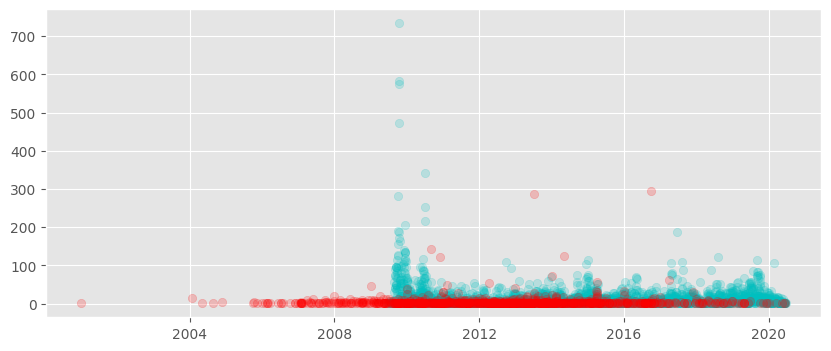

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
ax.scatter(inidate['index'],inidate['Count'], color='c', alpha=0.2)
ax.scatter(disdate['index'],disdate['Count'], color='red', alpha =0.2)
#ax.plot(inidate['index'], inidate['Count'], color='c')
#ax.plot(mrdate['index'], mrdate['Count'], color='blue', alpha=0.2)

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
ax.scatter(disdate['index'], disdate['Count'], color='c', alpha=0.2)
ax.scatter(mrdate['index'], mrdate['Count'], color='red', alpha=0.2)

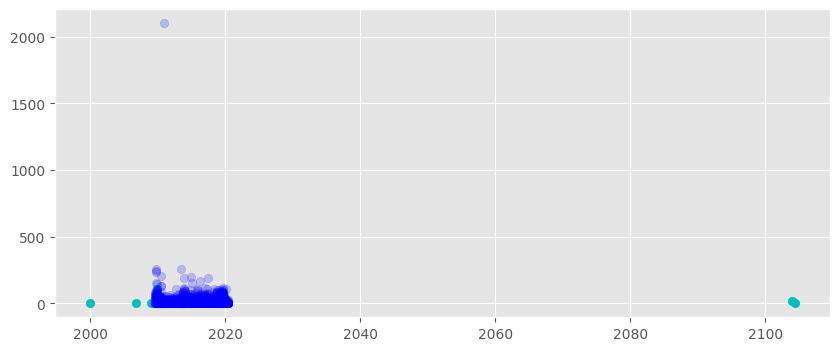

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
ax.scatter(rmdate['index'], rmdate['Count'], color='c')
ax.scatter(mrdate['index'], mrdate['Count'], color='blue', alpha=0.2)

new column -> Discontinued

In [ ]:

cdata['Discontinued'] = np.where(cdata['DiscontinuedDate'].isnull(),False,True)
cdata.head()

CDPHId                                       ProductName  CSF  \
0      2  ultra color rich extra plump lipstick-all shades  NaN   
1      3                        glover's medicated shampoo  NaN   
2      3                        glover's medicated shampoo  NaN   
3      4          precision glimmer eye liner-all shades �  NaN   
4      5       avon brilliant shine lip gloss-all shades �  NaN   

      CompanyName BrandName PrimaryCategoryId  \
0      newavonllc      AVON                44   
1  jstrickland&co  Glover's                18   
2  jstrickland&co  Glover's                18   
3      newavonllc      AVON                44   
4      newavonllc      AVON                44   

                     PrimaryCategory  \
0    Makeup Products (non-permanent)   
1  Hair Care Products (non-coloring)   
2  Hair Care Products (non-coloring)   
3    Makeup Products (non-permanent)   
4    Makeup Products (non-permanent)   

                                  SubCategory            ChemicalName  \
0  Lip Color - Lipsticks, Liners, and Pencils        Titanium dioxide   
1    Hair Shampoos (making a cosmetic claim)   Distillates (coal tar)   
2    Hair Shampoos (making a cosmetic claim)                Estragole   
3                    Eyeliner/Eyebrow Pencils        Titanium dioxide   
4                             Lip Gloss/Shine        Titanium dioxide   

   ChemicalCount InitialDateReported MostRecentDateReported DiscontinuedDate  \
0              1          2009-06-17             2013-08-28       2011-02-01   
1              2          2009-07-01             2009-07-01              NaT   
2              2          2009-07-01             2009-07-01              NaT   
3              1          2009-07-09             2013-08-28              NaT   
4              1          2009-07-09             2013-08-28       2011-02-01   

  ChemicalCreatedAt ChemicalUpdatedAt ChemicalDateRemoved  Discontinued  
0        2009-07-09        2009-07-09                 NaT          True  
1        2009-07-01        2009-07-01                 NaT         False  
2        2009-07-02        2009-07-02                 NaT         False  
3        2009-07-09        2009-07-09                 NaT         False  
4        2009-07-09        2009-07-09                 NaT          True

In [ ]:
cdata.dtypes

CDPHId                            object
ProductName                       object
CSF                               object
CompanyName                       object
BrandName                         object
PrimaryCategoryId                 object
PrimaryCategory                   object
SubCategory                       object
ChemicalName                      object
ChemicalCount                      int64
InitialDateReported       datetime64[ns]
MostRecentDateReported    datetime64[ns]
DiscontinuedDate          datetime64[ns]
ChemicalCreatedAt         datetime64[ns]
ChemicalUpdatedAt         datetime64[ns]
ChemicalDateRemoved       datetime64[ns]
Discontinued                        bool
dtype: object

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(cdata['InitialDateReported'], cdata['MostRecentDateReported'], alpha =0.2)
ax.set_xlabel('Initial Report')
ax.set_ylabel('Most Recent Report')

Text(0, 0.5, 'Most Recent Report')

In [ ]:
# Convert Discontinued column to integer dtype
cdata['Discontinued_int'] = cdata['Discontinued'].astype(int)

# Normalize the Discontinued_int column
cdata['Discontinued_norm'] = cdata['Discontinued_int'] / cdata['Discontinued_int'].max()



In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(cdata['InitialDateReported'], cdata['MostRecentDateReported'], s = cdata['Discontinued_norm'], alpha=0.1)
ax.set_xlabel('Initial Report')
ax.set_ylabel('Most Recent Report')

Text(0, 0.5, 'Most Recent Report')

In [ ]:
cdata['DiscontinuedDate'].min()



Timestamp('2001-01-01 00:00:00')

In [ ]:
cdata['DiscontinuedDate'].max()

Timestamp('2020-06-12 00:00:00')

In [ ]:
import datetime
fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(cdata['DiscontinuedDate'],cdata['InitialDateReported'], color='b',alpha=0.1)
ax.set_xlabel('Initial Report')
ax.set_ylabel('Discontinued Date')

ax.set_xlim(cdata['DiscontinuedDate'].min(),cdata['DiscontinuedDate'].max())
#set ax limit cus of some Null values

(11323.0, 18425.0)

Text(0, 0.5, 'Discontinued Date')

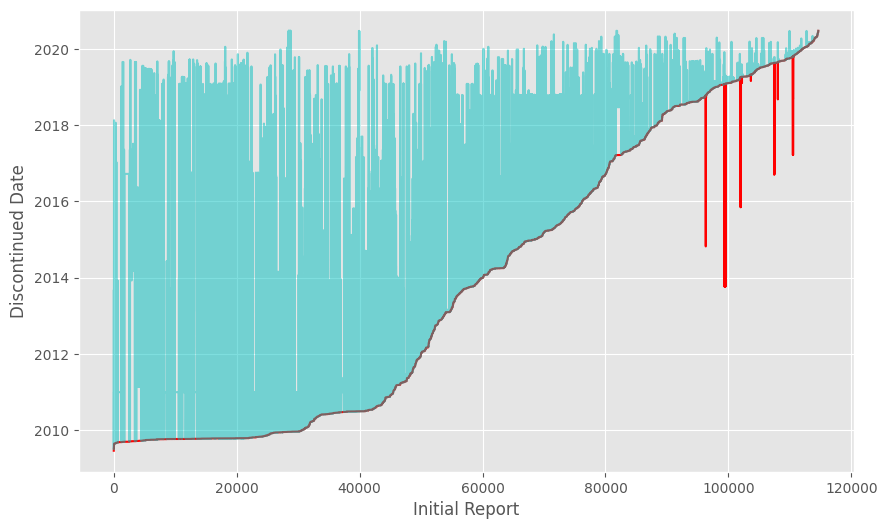

In [ ]:
import datetime
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(cdata['InitialDateReported'], color ='r')
ax.plot(cdata['MostRecentDateReported'], color ='c', alpha =0.5)
ax.set_xlabel('Initial Report')
ax.set_ylabel('Discontinued Date')


Text(0, 0.5, 'Most Recent Report')

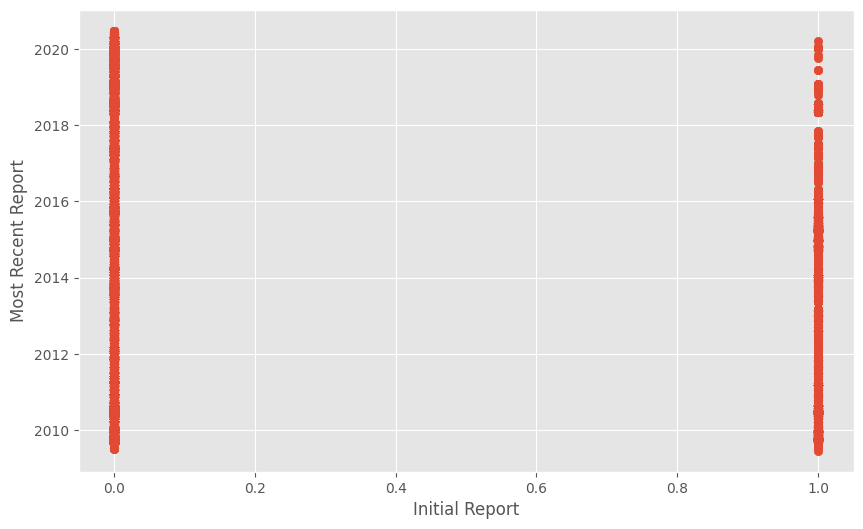

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(cdata['Discontinued'], cdata['InitialDateReported'])
ax.set_xlabel('Initial Report')
ax.set_ylabel('Most Recent Report')

In [ ]:
cdata['ChemicalName'].value_counts()

Titanium dioxide                                                                                       87745
Silica, crystalline (airborne particles of respirable size)                                             2473
Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.     2035
Mica                                                                                                    1837
Carbon black                                                                                            1706
                                                                                                       ...  
Acetylsalicylic acid                                                                                       1
2-Propyleneacrolein                                                                                        1
Spironolactone                                                                                             1
Extract of coffee b

In [ ]:
chemcount = cdata['ChemicalName'].value_counts()
chemcount

Titanium dioxide                                                                                       87745
Silica, crystalline (airborne particles of respirable size)                                             2473
Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.     2035
Mica                                                                                                    1837
Carbon black                                                                                            1706
                                                                                                       ...  
Acetylsalicylic acid                                                                                       1
2-Propyleneacrolein                                                                                        1
Spironolactone                                                                                             1
Extract of coffee b

In [ ]:
cdata[cdata['Discontinued'] ==True]['ChemicalName'].unique()

array(['Titanium dioxide', 'Coffea arabica extract',
       'Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.',
       'Coffee',
       'Silica, crystalline (airborne particles of respirable size)',
       'Chromium (hexavalent compounds)', 'Cocamide diethanolamine',
       'Ethyl acrylate', 'Genistein (purified)',
       'Butylated hydroxyanisole', 'Diethanolamine',
       'Lauramide diethanolamine', 'TEA-Lauryl Sulfate', 'Estragole',
       'Methyleugenol', 'Safrole', '1,4-Dioxane',
       'Arsenic (inorganic arsenic compounds)', 'Dichloroacetic acid',
       'Ethylene oxide', 'Formaldehyde (gas)', 'Lead',
       'Dichloromethane (Methylene chloride)', 'Acetaldehyde', 'Benzene',
       'Benzyl chloride', 'N-Nitrosodimethylamine', 'Propylene oxide',
       'Trade Secret', 'Methyl chloride', 'Ethylene glycol',
       'Carbon black (airborne, unbound particles of respirable size)',
       'Retinyl acetate', 'Retinol', 'Di-n-butyl phthal

In [ ]:
chemdiscont = cdata[cdata['Discontinued'] == True]['ChemicalName'].value_counts()
chemdiscont

Titanium dioxide                                                                                       9789
Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.     633
Mica                                                                                                    394
Cocamide diethanolamine                                                                                 358
Butylated hydroxyanisole                                                                                178
                                                                                                       ... 
Spironolactone                                                                                            1
TEA-Lauryl Sulfate                                                                                        1
Methanol                                                                                                  1
Retinyl acetate             

In [ ]:
type(chemcount)

pandas.core.series.Series

In [ ]:
discontdict={}
for cl in chemlist:
    if cl in chemdiscont:
            discontdict[cl] = chemdiscont[cl]

chemdict = {}
for cl in chemlist:
        if cl in chemcount:
            chemdict[cl] = chemcount[cl]

print(discontdict)
print(chemdict)

{'Vitamin A palmitate': 33, 'Retinyl palmitate': 44, 'Butylated hydroxyanisole': 178, 'Cocamide diethanolamine': 358, 'Talc': 7, 'Carbon black': 82, 'Mica': 394, 'Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.': 633, 'Silica, crystalline (airborne particles of respirable size)': 94, 'Titanium dioxide': 9789}
{'Vitamin A palmitate': 960, 'Retinyl palmitate': 1133, 'Butylated hydroxyanisole': 1304, 'Cocamide diethanolamine': 1382, 'Talc': 1535, 'Carbon black': 1706, 'Mica': 1837, 'Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.': 2035, 'Silica, crystalline (airborne particles of respirable size)': 2473, 'Titanium dioxide': 87745}


In [ ]:
discontratio={}
for cl in chemlist:
    if cl in chemdiscont:
        if cl in chemcount:
            discontratio[cl] =chemdiscont[cl]/chemcount[cl]
discontratio

{'Vitamin A palmitate': 0.034375,
 'Retinyl palmitate': 0.038834951456310676,
 'Butylated hydroxyanisole': 0.13650306748466257,
 'Cocamide diethanolamine': 0.2590448625180897,
 'Talc': 0.004560260586319218,
 'Carbon black': 0.04806565064478312,
 'Mica': 0.2144801306477953,
 'Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.': 0.31105651105651105,
 'Silica, crystalline (airborne particles of respirable size)': 0.03801051354630004,
 'Titanium dioxide': 0.11156191235967862}

In [ ]:
for cl in chemlist:
    if cl in chemcount:
        print(cl, chemcount[cl])

Vitamin A palmitate 960
Retinyl palmitate 1133
Butylated hydroxyanisole 1304
Cocamide diethanolamine 1382
Talc 1535
Carbon black 1706
Mica 1837
Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents. 2035
Silica, crystalline (airborne particles of respirable size) 2473
Titanium dioxide 87745


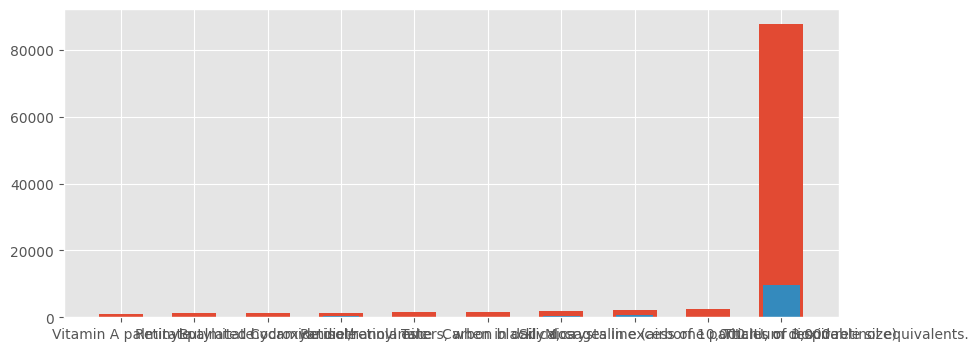

In [ ]:
fig,ax = plt.subplots(figsize= (10,4))
ax.bar([k for k,v in chemdict.items()], [v for k,v in chemdict.items()], width=0.6)
ax.bar([k for k,v in discontdict.items()], [v for k,v in discontdict.items()], width=0.5)
plt.show()
#ax.barh([k for k,v in discontratio.items()], [v for k,v in discontratio.items()], color='c')

<BarContainer object of 68 artists>

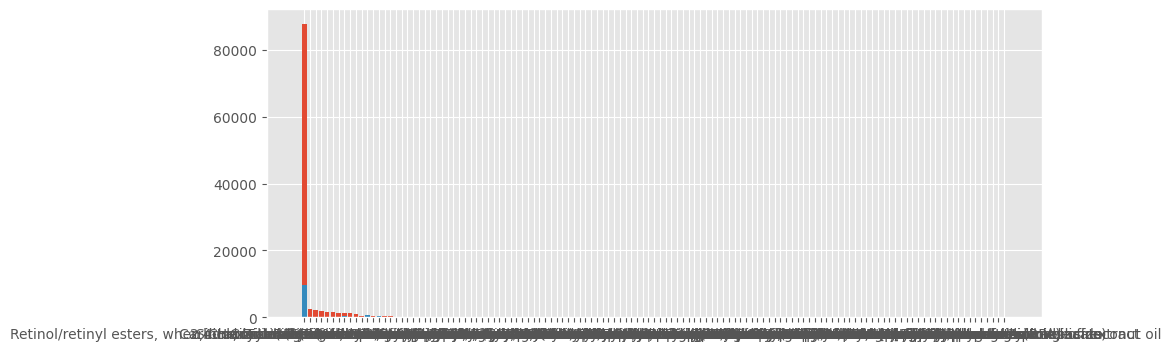

In [ ]:
fig, ax = plt.subplots(figsize = (10,4))
ax.bar(cdata['ChemicalName'].unique(), cdata['ChemicalName'].value_counts())
ax.bar(cdata[cdata['Discontinued'] ==True]['ChemicalName'].unique(), cdata[cdata['Discontinued'] == True]['ChemicalName'].value_counts())

In [ ]:
#sorted(cdata['DiscontinuedDate'].unique())

The Discontinued column only reported one column the most. Doesn't feel right.

**Hypothesis testing**

1. The prob of picking an individual product with Titanium Dioxide given it's probability in the dataset

2. probability of getting product with more than 1 reported chem

In [ ]:
chem

index  Percentage
9                                 Vitamin A palmitate    0.892924
8                                   Retinyl palmitate    1.053836
7                            Butylated hydroxyanisole    1.212888
6                             Cocamide diethanolamine    1.285438
5                                                Talc    1.427748
4                                        Carbon black    1.586800
3                                                Mica    1.708646
2   Retinol/retinyl esters, when in daily dosages ...    1.892812
1   Silica, crystalline (airborne particles of res...    2.300208
10                                    Other Chemicals    5.024555
0                                    Titanium dioxide   81.614145

In [ ]:
chemical = cdata.groupby(['ChemicalName'])
chemical.nunique().sort_values(by=['CDPHId'], ascending= False).head(60)

CDPHId  ProductName  \
ChemicalName                                                              
Titanium dioxide                                     32010        29053   
Silica, crystalline (airborne particles of resp...    1358         1276   
Cocamide diethanolamine                                898          784   
Retinol/retinyl esters, when in daily dosages i...     726          693   
Carbon black                                           718          607   
Mica                                                   678          614   
Talc                                                   586          548   
Retinyl palmitate                                      519          465   
Butylated hydroxyanisole                               408          384   
Vitamin A palmitate                                    407          350   
Trade Secret                                           405          400   
Triethanolamine                                        359          344   
Mineral oils, untreated and mildly treated             344          274   
Cocamide DEA                                           206          196   
Carbon black (airborne, unbound particles of re...     146          141   
Retinol                                                143          142   
Estragole                                              141          136   
Cosmetic talc                                          120          118   
Aloe vera, whole leaf extract                          110          110   
Methyleugenol                                          110          104   
Formaldehyde (gas)                                     104           95   
Benzophenone                                            95           94   
Cocamide MEA                                            87           87   
Coffee                                                  66           64   
Ginkgo biloba extract                                   63           61   
Toluene                                                 60           53   
1,4-Dioxane                                             59           57   
Coffea arabica extract                                  56           55   
Styrene                                                 52           51   
Titanium dioxide (airborne, unbound particles o...      48           48   
Isopropyl alcohol manufacture using strong acids        44           44   
Caffeine                                                37           37   
Coal tars                                               34            8   
Safrole                                                 33           28   
Phenacetin                                              33           32   
Ethylene oxide                                          31           30   
beta-Myrcene                                            30           30   
Diethanolamine                                          30           30   
Acetaldehyde                                            30           29   
Vitamin A                                               26           26   
Progesterone                                            25           20   
Quartz                                                  22           21   
Lauramide DEA                                           20           20   
Oil Orange SS                                           14           14   
Coal Tar                                                14            8   
Ethylene glycol                                         14           14   
Selenium sulfide                                        13            5   
N,N-Dimethyl-p-toluidine                                12           11   
N-Methylpyrrolidone                                     12           11   
Ethanol in alcoholic beverages                          11           11   
Benzophenone-3                                          10            9   
Avobenzone                                              10           10   
Pr

In [ ]:
comp.Percentage.mean()

0.1771115129956507

In [ ]:
comp.Percentage.quantile(0.9)

0.40363240517932913

In [ ]:
comp[comp.Percentage <= 1]

index  Percentage
27                                            guerlain    0.971124
28                                        oceanausainc    0.945342
29   markwinsinternationalmarkwinsbeautyproductsphy...    0.919560
30                                          conopcoinc    0.847943
31                                            maesallc    0.779191
..                                                 ...         ...
593                             imperialdaxhaircareinc    0.002865
594                                 fantasiaindustries    0.002865
595                                    houseofcheatham    0.002865
596                             cosmeticdermatologyinc    0.002865
597                                  hayashitecnicallc    0.002865

[571 rows x 2 columns]

In [ ]:
comp[comp.Percentage >= 1] #Companies that reported more than 1% of all reported products containing chemical

index  Percentage
0    americaninternationalindustries    5.626217
1                nailalliance-entity    4.534777
2   revlonconsumerproductcorporation    4.176693
3                  amorepacificusinc    3.105305
4                         l'orealusa    3.013636
5                buth-na-bodhaigeinc    2.993583
6           theprocter&gamblecompany    2.598258
7           anastasiabeverlyhillsllc    2.360490
8                hand&nailharmonyinc    2.165693
9             victoria'ssecretbeauty    2.128452
10                                s+    2.085482
11                              coty    1.990948
12                        newavonllc    1.925060
13                   nailalliancellc    1.761774
14                         vi-joninc    1.604217
15           arbonneinternationalllc    1.584164
16                           lushltd    1.501089
17                 toofacedcosmetics    1.472442
18                thebootscompanyplc    1.383637
19                    bath&bodyworks    1.312020
20                     yvesrocherinc    1.274779
21                         zoevagmbh    1.240403
22                    tartecosmetics    1.197433
23                 elizabethardeninc    1.088576
24              parfumschristiandior    1.051335
25                  benefitcosmetics    1.011230
26                   armanddupreeinc    1.002635

In [ ]:
cgroup[cgroup['CompanyName'] == "armanddupreeinc"]['BrandName'].value_counts()

Armand Dupree            133
Color Fun                 79
Zona Rosa                 42
Color Naturals            32
Thalia Sodi               24
Creative                  20
Liner Collection           8
Herbal 3                   3
Vivir By Luc�a M�ndez      3
Del Ba�l de la Abuela      2
Lucero                     1
Color FunCAEQ              1
Festivity                  1
Pink Dreams                1
Name: BrandName, dtype: int64

HEAVY METAL INGREDIENTS

Here are the key points related to heavy metal ingredients in the CSCP database:

The CSCP database contains information on heavy metals, including lead, cadmium, arsenic, and mercury, which are known or suspected to cause cancer, birth defects, or other reproductive harm.

Lead is the second most commonly reported ingredient in the CSCP database, after titanium dioxide.

Cadmium and arsenic are also frequently reported in the CSCP database, particularly in certain types of products such as nail polish and hair dyes.

Mercury is less commonly reported in the CSCP database, but is still present in a significant number of products.

The CSCP requires companies to report any heavy metal ingredient in a cosmetic product that exceeds a certain concentration threshold, which varies depending on the specific ingredient.

Companies are also required to report the concentration of heavy metal ingredients in their products, as well as the intended use of the product.

The CSCP database provides valuable information for consumers who are concerned about the presence of heavy metal ingredients in their cosmetics, as well as for researchers and policymakers who are interested in tracking trends in the use of these ingredients in the cosmetics industry.

However, it is important to note that the CSCP database may not include all heavy metal ingredients used in cosmetics, and that the concentration thresholds used by the CSCP may not always reflect the latest scientific research on the health risks associated with these ingredients.

Heavy metal ingredients are chemical elements that have a high density and atomic weight, such as ***lead, cadmium, arsenic, and mercury***. In cosmetics, these ingredients can be added for a variety of purposes, such as colorants, stabilizers, and preservatives. However, heavy metals are known to be toxic to humans, and prolonged exposure to them can lead to serious health problems.

In cosmetics, heavy metal ingredients can be found in various forms, including powders, liquids, and gels. They can be present in products such as lipsticks, eyeliners, nail polish, hair dyes, and other personal care items. These ingredients can be absorbed into the skin or ingested through accidental ingestion, such as when lipstick is applied to the lips.

To protect consumers from the potential harm caused by heavy metal ingredients in cosmetics, various regulatory agencies around the world have set limits on the concentration of these ingredients that are allowed in cosmetic products. These limits vary depending on the specific ingredient and the intended use of the product. Consumers can also take steps to reduce their exposure to heavy metal ingredients by choosing cosmetics that are free of these harmful substances or by using them in moderation.

In [ ]:
heavy_metal = ['lead', 'arsenic', 'mercury', 'cadmium', 'benzene', 'chromium', 'nickel', 'selenium' ]

In [ ]:
cdata.loc[:,'ChemicalName'] = cdata.loc[:,'ChemicalName'].str.lower()
cdata.head()

CDPHId                                       ProductName  CSF  \
0      2  ultra color rich extra plump lipstick-all shades  NaN   
1      3                        glover's medicated shampoo  NaN   
2      3                        glover's medicated shampoo  NaN   
3      4          precision glimmer eye liner-all shades �  NaN   
4      5       avon brilliant shine lip gloss-all shades �  NaN   

      CompanyName BrandName PrimaryCategoryId  \
0      newavonllc      AVON                44   
1  jstrickland&co  Glover's                18   
2  jstrickland&co  Glover's                18   
3      newavonllc      AVON                44   
4      newavonllc      AVON                44   

                     PrimaryCategory  \
0    Makeup Products (non-permanent)   
1  Hair Care Products (non-coloring)   
2  Hair Care Products (non-coloring)   
3    Makeup Products (non-permanent)   
4    Makeup Products (non-permanent)   

                                  SubCategory            ChemicalName  \
0  Lip Color - Lipsticks, Liners, and Pencils        titanium dioxide   
1    Hair Shampoos (making a cosmetic claim)   distillates (coal tar)   
2    Hair Shampoos (making a cosmetic claim)                estragole   
3                    Eyeliner/Eyebrow Pencils        titanium dioxide   
4                             Lip Gloss/Shine        titanium dioxide   

   ChemicalCount InitialDateReported MostRecentDateReported DiscontinuedDate  \
0              1          2009-06-17             2013-08-28       2011-02-01   
1              2          2009-07-01             2009-07-01              NaT   
2              2          2009-07-01             2009-07-01              NaT   
3              1          2009-07-09             2013-08-28              NaT   
4              1          2009-07-09             2013-08-28       2011-02-01   

  ChemicalCreatedAt ChemicalUpdatedAt ChemicalDateRemoved  Discontinued  \
0        2009-07-09        2009-07-09                 NaT          True   
1        2009-07-01        2009-07-01                 NaT         False   
2        2009-07-02        2009-07-02                 NaT         False   
3        2009-07-09        2009-07-09                 NaT         False   
4        2009-07-09        2009-07-09                 NaT          True   

   Discontinued_int  Discontinued_norm  
0                 1                1.0  
1                 0                0.0  
2                 0                0.0  
3                 0                0.0  
4                 1                1.0

In [ ]:
#cdata[cdata.ChemicalName.str.contains('lead')]

In [ ]:
cdata[cdata.ChemicalName.str.contains('arsenic')]

CDPHId                                    ProductName         CSF  \
15613   3671                                hydrate shampoo         NaN   
15620   3671                                hydrate shampoo         NaN   
15734   3702                     interrupt texturizing clay         NaN   
15774   3714                 intensity conditioning therapy         NaN   
33659  11577  breathable coverage mineral foundation spf-30  Iron Oxide   
33741  11651    post-skin resurfacing balm therapeutic care         NaN   
33750  11657  breathable coverage mineral foundation spf 30         NaN   
33756  11660    post-skin resurfacing balm therapeutic care         NaN   
60821  22212                           moisturizing shampoo         NaN   
60830  22214                       moisturizing conditioner         NaN   

            CompanyName                BrandName PrimaryCategoryId  \
15613  regiscorporation        Regis Design Line                18   
15620  regiscorporation        Regis Design Line                18   
15734  regiscorporation        Regis Design Line                18   
15774  regiscorporation        Regis Design Line                18   
33659     dermaquestinc            Dermaminerals               106   
33741     dermaquestinc  Dermaquest Skin Therapy                90   
33750     allurelabsinc            Dermaminerals               106   
33756     allurelabsinc  Dermaquest Skin Therapy                90   
60821  regiscorporation        Regis Design Line                18   
60830  regiscorporation        Regis Design Line                18   

                         PrimaryCategory  \
15613  Hair Care Products (non-coloring)   
15620  Hair Care Products (non-coloring)   
15734  Hair Care Products (non-coloring)   
15774  Hair Care Products (non-coloring)   
33659               Sun-Related Products   
33741                Skin Care Products    
33750               Sun-Related Products   
33756                Skin Care Products    
60821  Hair Care Products (non-coloring)   
60830  Hair Care Products (non-coloring)   

                                       SubCategory  \
15613     Hair Shampoos (making a cosmetic claim)    
15620     Hair Shampoos (making a cosmetic claim)    
15734                        Hair Styling Products   
15774                Hair Conditioners (rinse-out)   
33659         Sunscreen (making a cosmetic claim)    
33741  Skin Moisturizers (making a cosmetic claim)   
33750         Sunscreen (making a cosmetic claim)    
33756  Skin Moisturizers (making a cosmetic claim)   
60821     Hair Shampoos (making a cosmetic claim)    
60830                Hair Conditioners (rinse-out)   

                                ChemicalName  ChemicalCount  \
15613  arsenic (inorganic arsenic compounds)              7   
15620  arsenic (inorganic arsenic compounds)              7   
15734  arsenic (inorganic arsenic compounds)              8   
15774  arsenic (inorganic arsenic compounds)              7   
33659             arsenic (inorganic oxides)              4   
33741  arsenic (inorganic arsenic compounds)              4   
33750  arsenic (inorganic arsenic compounds)              4   
33756  arsenic (inorganic arsenic compounds)              4   
60821  arsenic (inorganic arsenic compounds)              9   
60830  arsenic (inorganic arsenic compounds)              5   

      InitialDateReported MostRecentDateReported DiscontinuedDate  \
15613          2009-10-12             2014-02-06       2014-02-06   
15620          2009-10-12             2014-02-06       2014-02-06   
15734          2009-10-12             2014-02-04              NaT   
15774          2009-10-12             2014-02-04              NaT   
33659          2010-05-26             2010-12-30              NaT   
33741          2010-05-28             2010-05-28              NaT   
33750          2010-05-28             2010-05-28              NaT   
33756          2010-05-28             2010-05-28              NaT   
60821         

In [ ]:
cdata[cdata.ChemicalName.str.contains('mercury')]

CDPHId                                    ProductName         CSF  \
33661  11577  breathable coverage mineral foundation spf-30  Iron Oxide   
33743  11651    post-skin resurfacing balm therapeutic care         NaN   
33752  11657  breathable coverage mineral foundation spf 30         NaN   
33758  11660    post-skin resurfacing balm therapeutic care         NaN   

         CompanyName                BrandName PrimaryCategoryId  \
33661  dermaquestinc            Dermaminerals               106   
33743  dermaquestinc  Dermaquest Skin Therapy                90   
33752  allurelabsinc            Dermaminerals               106   
33758  allurelabsinc  Dermaquest Skin Therapy                90   

            PrimaryCategory                                  SubCategory  \
33661  Sun-Related Products         Sunscreen (making a cosmetic claim)    
33743   Skin Care Products   Skin Moisturizers (making a cosmetic claim)   
33752  Sun-Related Products         Sunscreen (making a cosmetic claim)    
33758   Skin Care Products   Skin Moisturizers (making a cosmetic claim)   

                        ChemicalName  ChemicalCount InitialDateReported  \
33661  mercury and mercury compounds              4          2010-05-26   
33743  mercury and mercury compounds              4          2010-05-28   
33752  mercury and mercury compounds              4          2010-05-28   
33758  mercury and mercury compounds              4          2010-05-28   

      MostRecentDateReported DiscontinuedDate ChemicalCreatedAt  \
33661             2010-12-30              NaT        2010-05-26   
33743             2010-05-28              NaT        2010-05-28   
33752             2010-05-28              NaT        2010-05-28   
33758             2010-05-28              NaT        2010-05-28   

      ChemicalUpdatedAt ChemicalDateRemoved  Discontinued  Discontinued_int  \
33661        2010-05-26                 NaT         False                 0   
33743        2010-05-28                 NaT         False                 0   
33752        2010-05-28                 NaT         False                 0   
33758        2010-05-28                 NaT         False                 0   

       Discontinued_norm  
33661                0.0  
33743                0.0  
33752                0.0  
33758                0.0

In [ ]:
cdata[cdata.ChemicalName.str.contains('cadmium')]

CDPHId                     ProductName  CSF      CompanyName  \
19139   4654  harmon zinc oxide ointment 2oz  NaN  harmonstoresinc   
19141   4654  harmon zinc oxide ointment 2oz  NaN  harmonstoresinc   

                BrandName PrimaryCategoryId      PrimaryCategory  \
19139  Harmon Face Values                 1        Baby Products   
19141  Harmon Face Values                90  Skin Care Products    

          SubCategory                   ChemicalName  ChemicalCount  \
19139  Baby Skin Care  cadmium and cadmium compounds              2   
19141    Facial Cream  cadmium and cadmium compounds              2   

      InitialDateReported MostRecentDateReported DiscontinuedDate  \
19139          2009-10-14             2009-10-14              NaT   
19141          2009-10-14             2009-10-14              NaT   

      ChemicalCreatedAt ChemicalUpdatedAt ChemicalDateRemoved  Discontinued  \
19139        2009-10-14        2009-10-14                 NaT         False   
19141        2009-10-14        2009-10-14                 NaT         False   

       Discontinued_int  Discontinued_norm  
19139                 0                0.0  
19141                 0                0.0

In [ ]:
cdata[cdata.ChemicalName.str.contains('benzene')]

CDPHId                  ProductName  CSF       CompanyName  \
15656   3685          hydrate conditioner  NaN  regiscorporation   
15664   3685          hydrate conditioner  NaN  regiscorporation   
15712   3697        curl lock conditioner  NaN  regiscorporation   
15747   3708  texture cream casual styler  NaN  regiscorporation   
17621   4004                texture cream  NaN  regiscorporation   

               BrandName PrimaryCategoryId                    PrimaryCategory  \
15656  Regis Design Line                18  Hair Care Products (non-coloring)   
15664  Regis Design Line                18  Hair Care Products (non-coloring)   
15712  Regis Design Line                18  Hair Care Products (non-coloring)   
15747  Regis Design Line                18  Hair Care Products (non-coloring)   
17621         Mastercuts                18  Hair Care Products (non-coloring)   

                         SubCategory ChemicalName  ChemicalCount  \
15656  Hair Conditioners (rinse-out)      benzene              8   
15664  Hair Conditioners (rinse-out)      benzene              8   
15712  Hair Conditioners (rinse-out)      benzene              1   
15747          Hair Styling Products      benzene              8   
17621          Hair Styling Products      benzene              8   

      InitialDateReported MostRecentDateReported DiscontinuedDate  \
15656          2009-10-12             2014-02-06       2014-02-06   
15664          2009-10-12             2014-02-06       2014-02-06   
15712          2009-10-12             2014-02-05       2013-01-01   
15747          2009-10-12             2014-02-05              NaT   
17621          2009-10-13             2014-02-04       2013-04-01   

      ChemicalCreatedAt ChemicalUpdatedAt ChemicalDateRemoved  Discontinued  \
15656        2009-10-12        2014-02-06          2009-10-13          True   
15664        2009-10-13        2014-02-06                 NaT          True   
15712        2009-10-12        2014-02-05          2009-10-13          True   
15747        2009-10-12        2014-02-05                 NaT         False   
17621        2009-10-13        2014-02-06                 NaT          True   

       Discontinued_int  Discontinued_norm  
15656                 1                1.0  
15664                 1                1.0  
15712                 1                1.0  
15747                 0                0.0  
17621                 1                1.0

In [ ]:
cdata[cdata.ChemicalName.str.contains('chromium')]

CDPHId                            ProductName  CSF  CompanyName  \
62       45  enzymatic sea mud - professional only  NaN  dermalogica   
1299    544       medibac clearing masque - part 1  NaN  dermalogica   
1300    545        sheer tint redness relief spf15  NaN  dermalogica   

        BrandName PrimaryCategoryId       PrimaryCategory  \
62    Dermalogica                 6         Bath Products   
1299  Dermalogica                90   Skin Care Products    
1300  Dermalogica               106  Sun-Related Products   

                                  SubCategory  \
62                      Scrubs and Exfoliants   
1299  Acne Products (making a cosmetic claim)   
1300     Sunscreen (making a cosmetic claim)    

                         ChemicalName  ChemicalCount InitialDateReported  \
62    chromium (hexavalent compounds)              1          2009-08-24   
1299  chromium (hexavalent compounds)              1          2009-09-08   
1300  chromium (hexavalent compounds)              2          2009-09-08   

     MostRecentDateReported DiscontinuedDate ChemicalCreatedAt  \
62               2009-08-24              NaT        2009-08-24   
1299             2009-09-08              NaT        2009-09-08   
1300             2014-04-21       2010-11-10        2009-09-08   

     ChemicalUpdatedAt ChemicalDateRemoved  Discontinued  Discontinued_int  \
62          2009-08-24                 NaT         False                 0   
1299        2009-09-08                 NaT         False                 0   
1300        2009-09-08                 NaT          True                 1   

      Discontinued_norm  
62                  0.0  
1299                0.0  
1300                1.0

In [ ]:
cdata[cdata.ChemicalName.str.contains('nickel')]

CDPHId                                        ProductName  CSF  \
48679  16916  aroma cleanse - creme micro lissante purete ex...  NaN   
48680  16917  life radiance - gommage double eclat / double ...  NaN   

               CompanyName BrandName PrimaryCategoryId      PrimaryCategory  \
48679  laboratoiresdecleor   DECLEOR                90  Skin Care Products    
48680  laboratoiresdecleor   DECLEOR                90  Skin Care Products    

          SubCategory       ChemicalName  ChemicalCount InitialDateReported  \
48679  Skin Cleansers  nickel (metallic)              0          2011-08-08   
48680  Skin Cleansers  nickel (metallic)              0          2011-08-08   

      MostRecentDateReported DiscontinuedDate ChemicalCreatedAt  \
48679             2011-08-08              NaT        2011-08-08   
48680             2011-08-08              NaT        2011-08-08   

      ChemicalUpdatedAt ChemicalDateRemoved  Discontinued  Discontinued_int  \
48679        2011-08-22          2011-08-22         False                 0   
48680        2011-08-22          2011-08-22         False                 0   

       Discontinued_norm  
48679                0.0  
48680                0.0

In [ ]:
cdata[cdata.ChemicalName.str.contains('selenium')]

CDPHId                                        ProductName         CSF  \
39612  14299                 dandruff shampoo menthol medicated      Blue 1   
39613  14299                 dandruff shampoo menthol medicated      Red 33   
41493  14702  selenium sulfide dandruff shampoo medicated tr...  Blue No. 1   
41494  14702  selenium sulfide dandruff shampoo medicated tr...  Red No. 33   
45093  15706                                  medicated shampoo         NaN   
45095  15706                                  medicated shampoo         NaN   
45109  15710                                  medicated shampoo         NaN   
45111  15710                                  medicated shampoo         NaN   
85215  30897                 advanced solution dandruff shampoo         NaN   
85216  30898                 advanced solution dandruff shampoo         NaN   
85217  30899                 advanced solution dandruff shampoo         NaN   
85218  30900                 advanced solution dandruff shampoo         NaN   
85219  30901                 advanced solution dandruff shampoo         NaN   
85399  31071                                  medicated shampoo         NaN   
85400  31072                                  medicated shampoo         NaN   
85401  31073                                  medicated shampoo         NaN   
96086  34272  advanced solution dandruff & seborrheic dermat...         NaN   

                 CompanyName       BrandName PrimaryCategoryId  \
39612  garcoalaboratoriesinc      Every Body                18   
39613  garcoalaboratoriesinc      Every Body                18   
41493            thekrogerco          Kroger                18   
41494            thekrogerco          Kroger                18   
45093              vi-joninc          Rexall                18   
45095              vi-joninc          Rexall                18   
45109              vi-joninc         Up & Up                18   
45111              vi-joninc         Up & Up                18   
85215              vi-joninc             CVS                18   
85216              vi-joninc          Meijer                18   
85217              vi-joninc          Kroger                18   
85218              vi-joninc             Heb                18   
85219              vi-joninc  Mountain Falls                18   
85399              vi-joninc           Up&Up                18   
85400              vi-joninc          Kroger                18   
85401              vi-joninc        Equaline                18   
96086              vi-joninc          Solimo                18   

                         PrimaryCategory  \
39612  Hair Care Products (non-coloring)   
39613  Hair Care Products (non-coloring)   
41493  Hair Care Products (non-coloring)   
41494  Hair Care Products (non-coloring)   
45093  Hair Care Products (non-coloring)   
45095  Hair Care Products (non-coloring)   
45109  Hair Care Products (non-coloring)   
45111  Hair Care Products (non-coloring)   
85215  Hair Care Products (non-coloring)   
85216  Hair Care Products (non-coloring)   
85217  Hair Care Products (non-coloring)   
85218  Hair Care Products (non-coloring)   
85219  Hair Care Products (non-coloring)   
85399  Hair Care Products (non-coloring)   
85400  Hair Care Products (non-coloring)   
85401  Hair Care Products (non-coloring)   
96086  Hair Care Products (non-coloring)   

                                       SubCategory      ChemicalName  \
39612  Hair Shampoos with Anti-Dandruff properties  selenium sulfide   
39613  Hair Shampoos with Anti-Dandruff properties  selenium sulfide   
41493  Hair Shampoos with Anti-Dandruff properties  selenium sulfide   
41494  Hair Shampoos with Anti-Dandruff properties  selenium sulfide   
45093     Hair Shampoos (making a cosmetic claim)   selenium sulfide   
45095  Hair Shampoos with Anti-Dandruff properties  selenium sulfide   
45109     Hair Shampoos (making a cosmetic claim)   selenium sulfide   
45111  Hair Shampoos with

In [ ]:
heavy_metal = ['lead', 'arsenic', 'mercury', 'cadmium', 'benzene', 'chromium', 'nickel', 'selenium' ]

In [ ]:
cdata[cdata['ChemicalName'].str.contains('|'.join(heavy_metal))]

CDPHId                                        ProductName         CSF  \
62        45              enzymatic sea mud - professional only         NaN   
1299     544                   medibac clearing masque - part 1         NaN   
1300     545                    sheer tint redness relief spf15         NaN   
7243    2370                grecian plus gradual haircolor foam         NaN   
7346    2377                          grecian formula 16 liquid         NaN   
7386    2380                          grecian formula 16 liquid         NaN   
7390    2383                           grecian formula 16 cream         NaN   
15613   3671                                    hydrate shampoo         NaN   
15617   3671                                    hydrate shampoo         NaN   
15620   3671                                    hydrate shampoo         NaN   
15625   3671                                    hydrate shampoo         NaN   
15656   3685                                hydrate conditioner         NaN   
15664   3685                                hydrate conditioner         NaN   
15712   3697                              curl lock conditioner         NaN   
15734   3702                         interrupt texturizing clay         NaN   
15747   3708                        texture cream casual styler         NaN   
15774   3714                     intensity conditioning therapy         NaN   
17621   4004                                      texture cream         NaN   
19139   4654                     harmon zinc oxide ointment 2oz         NaN   
19140   4654                     harmon zinc oxide ointment 2oz         NaN   
19141   4654                     harmon zinc oxide ointment 2oz         NaN   
19142   4654                     harmon zinc oxide ointment 2oz         NaN   
33314  11263                                     youthair creme         NaN   
33315  11264                                    youthair liquid         NaN   
33659  11577      breathable coverage mineral foundation spf-30  Iron Oxide   
33660  11577      breathable coverage mineral foundation spf-30  Iron Oxide   
33661  11577      breathable coverage mineral foundation spf-30  Iron Oxide   
33741  11651        post-skin resurfacing balm therapeutic care         NaN   
33742  11651        post-skin resurfacing balm therapeutic care         NaN   
33743  11651        post-skin resurfacing balm therapeutic care         NaN   
33750  11657      breathable coverage mineral foundation spf 30         NaN   
33751  11657      breathable coverage mineral foundation spf 30         NaN   
33752  11657      breathable coverage mineral foundation spf 30         NaN   
33756  11660        post-skin resurfacing balm therapeutic care         NaN   
33757  11660        post-skin resurfacing balm therapeutic care         NaN   
33758  11660        post-skin resurfacing balm therapeutic care         NaN   
39612  14299                 dandruff shampoo menthol medicated      Blue 1   
39613  14299                 dandruff shampoo menthol medicated      Red 33   
41493  14702  selenium sulfide dandruff shampoo medicated tr...  Blue No. 1   
41494  14702  selenium sulfide dandruff shampoo medicated tr...  Red No. 33   
45093  15706                                  medicated shampoo         NaN   
45095  15706                                  medicated shampoo         NaN   
45109  15710                                  medicated shampoo         NaN   
45111  15710                                  medicated shampoo         NaN   
48679  16916  aroma cleanse - creme micro lissante purete ex...         NaN   
48680  16917  life radiance - gommage double eclat / double ...         NaN   
60821  22212                               moisturizing shampoo         NaN   
60825  22212                               moisturizing shampoo         NaN   
60830  22214                           moisturizing conditioner         NaN   
85215  30897                 advanced solution dandruff 

In [ ]:
cdata['HeavyMetal'] = cdata['ChemicalName'].str.contains('|'.join(heavy_metal))
#cdata

In [ ]:
heavy_or_not = cdata.groupby(['HeavyMetal']).count()[['CDPHId']].reset_index()
# heavy_or_not

In [ ]:
#fig, ax = plt.subplots(figsize=(8,8))
#ax.pie(heavy_or_not['CDPHId'], labels=heavy_or_not['HeavyMetal'],autopct='%1.1f%%', colors=['c','r'])

COMPANIES THAT REPORTED HEAVYMETAL

In [ ]:

heavyprod_ = cdata[cdata['HeavyMetal']==True].groupby(['CompanyName']).count().sort_values(by = ['CDPHId'], ascending=False)
heavyprod = heavyprod_[['ProductName']]
# heavyprod

#how likely the difference in proportion of products contain heavy metal to all products occur by random
# then categorize

In [ ]:
heavycomp = cdata[cdata['HeavyMetal']==True][['CompanyName']].groupby(['CompanyName']).head()
heavycomp['CompanyName']
heavycomp_list = [c for c in heavycomp['CompanyName']]
heavycomp_list = list(set(heavycomp_list))
# heavycomp_list

In [ ]:
#FIND # OF ALL PRODUCTS FOR EACH COMPANY THAT REPORT HEAVY METAL
# heavycomp = [c for cdata['CompanyName'] if cdata[cdata['HeavyMetal']== True]]
totprod = cdata.groupby(['CompanyName']).count()
totprod = totprod[['CDPHId']]
totprod
# totprod = totprod[totprod['CompanyName'].str.contains('|'.join(heavycomp_list))]
# totprod

CDPHId
CompanyName                                
2355644ontarioinc                         1
accessbusinessgroupinternationalllc     138
acquadiparma                             19
addedextrasllc                          280
advancedaestheticsinc                     3
...                                     ...
zoevagmbh                               850
zoharcosmetics(mfo)ltd                   16
zoskinhealthinc                          37
zotosinternationalinc                   192
zschimmer&schwarzinc                     26

[598 rows x 1 columns]

SEVERELY HARMFUL CHEMICALS

In [ ]:
##CREATING NEW COLUMN for this
very_harmful = ['trade secret','lead', 'arsenic', 'mercury', 'cadmium', 'benzene', 'chromium', 'nickel', 'selenium','bha', 'bht', 'butylated hydroxyanisole', 'butylated hydroxytoluene', 'coal tar','dea', 'diethanolamine','tea', 'triethanolamine','dbp','formaldehyde','dmdm','diazolidinyl','imidazolidinyl','methenamine','quaternium-15', 'paraben', 'musk', 'moskene', 'peg', 'polyethylene','propylene glycol', 'ethoxylates', 'petrolatum','mineral oil', 'polycyclic', 'pah','siloxane', 'cyclomethicone', 'sodium laureth', 'sles', 'sls', 'sodium lauryl', 'triclosan']

In [ ]:
#product contains very harmful chems
cdata[cdata['ChemicalName'].str.contains('|'.join(very_harmful))]

CDPHId                                       ProductName  \
1           3                        glover's medicated shampoo   
31         24                         white premium lotion soap   
49         43                                   skin prep scrub   
62         45             enzymatic sea mud - professional only   
310       156                                 a&c synergy serum   
...       ...                                               ...   
114436  41450                wild breeze water lilies hand soap   
114568  41502  eye-conic multi-finish eye palette extra-vagance   
114570  41504                    star shape shower gel 1.5fl oz   
114571  41505                        hand cream sweet pea 1.5oz   
114572  41506             hand cream vanilla brown sugar 1.5 oz   

                            CSF                  CompanyName  \
1                           NaN               jstrickland&co   
31                          NaN            gojoindustriesinc   
49                          NaN                  dermalogica   
62                          NaN                  dermalogica   
310                         NaN   physician'scarealliancellc   
...                         ...                          ...   
114436                      NaN                cosmopharmltd   
114568                      NaN             kendoholdingsinc   
114570  TRANSPARENT - N/A - N/A  ningbomeitelicosmeticscoltd   
114571    TRANSPARENT - N - N/A  ningbomeitelicosmeticscoltd   
114572  TRANSPARENT - N/A - N/A  ningbomeitelicosmeticscoltd   

                                      BrandName PrimaryCategoryId  \
1                                      Glover's                18   
31                                        GOJO�                74   
49                                  Dermalogica                 6   
62                                  Dermalogica                 6   
310                                    PCA Skin                90   
...                                         ...               ...   
114436                                 Careline                 6   
114568                       MARC JACOBS BEAUTY                44   
114570  NANJING CHANGJIANG PETROLEUM & CHEMICAL                44   
114571  NANJING CHANGJIANG PETROLEUM & CHEMICAL                90   
114572  NANJING CHANGJIANG PETROLEUM & CHEMICAL                90   

                          PrimaryCategory  \
1       Hair Care Products (non-coloring)   
31                 Personal Care Products   
49                          Bath Products   
62                          Bath Products   
310                   Skin Care Products    
...                                   ...   
114436                      Bath Products   
114568    Makeup Products (non-permanent)   
114570    Makeup Products (non-permanent)   
114571                Skin Care Products    
114572                Skin Care Products    

                                        SubCategory  \
1          Hair Shampoos (making a cosmetic claim)    
31                    Hand Cleansers and Sanitizers   
49                            Scrubs and Exfoliants   
62                            Scrubs and Exfoliants   
310       Skin Astringent (making a cosmetic claim)   
...                                             ...   
114436                        Body Washes and Soaps   
114568                                   Eye Shadow   
114570                              Lip Gloss/Shine   
114571  Skin Moisturizers (making a cosmetic claim)   
114572  Skin Moisturizers (making a cosmetic claim)   

                                      ChemicalName  ChemicalCount  \
1                           distillates (coal tar)              2   
31                         cocamide diethanolamine              0   
49                         cocamide diethanolamine              2   
62                 chromium (hexavalent compounds)              1   
310                       butylated hydroxyanisole       

In [ ]:
# #product contains very harmful chems for sure (never been removed)
# ccdata[ccdata['ChemicalName'].str.contains('|'.join(very_harmful))]

In [ ]:
cdata['VeryHarmful'] = cdata['ChemicalName'].str.contains('|'.join(very_harmful))
cdata

CDPHId                                        ProductName  \
0           2   ultra color rich extra plump lipstick-all shades   
1           3                         glover's medicated shampoo   
2           3                         glover's medicated shampoo   
3           4           precision glimmer eye liner-all shades �   
4           5        avon brilliant shine lip gloss-all shades �   
...       ...                                                ...   
114630  41523               hydra-lip translucent color lipstick   
114631  41523               hydra-lip translucent color lipstick   
114632  41523               hydra-lip translucent color lipstick   
114633  41523               hydra-lip translucent color lipstick   
114634  41524  old spice gentlemens blend aloe and wild sage ...   

                 CSF               CompanyName  BrandName PrimaryCategoryId  \
0                NaN                newavonllc       AVON                44   
1                NaN            jstrickland&co   Glover's                18   
2                NaN            jstrickland&co   Glover's                18   
3                NaN                newavonllc       AVON                44   
4                NaN                newavonllc       AVON                44   
...              ...                       ...        ...               ...   
114630     Rosa Soft              yanbalusainc     YANBAL                44   
114631  Malva Spirit              yanbalusainc     YANBAL                44   
114632  Rojo Fashion              yanbalusainc     YANBAL                44   
114633  Terra Mystic              yanbalusainc     YANBAL                44   
114634           NaN  theprocter&gamblecompany  Old Spice                 6   

                          PrimaryCategory  \
0         Makeup Products (non-permanent)   
1       Hair Care Products (non-coloring)   
2       Hair Care Products (non-coloring)   
3         Makeup Products (non-permanent)   
4         Makeup Products (non-permanent)   
...                                   ...   
114630    Makeup Products (non-permanent)   
114631    Makeup Products (non-permanent)   
114632    Makeup Products (non-permanent)   
114633    Makeup Products (non-permanent)   
114634                      Bath Products   

                                       SubCategory            ChemicalName  \
0       Lip Color - Lipsticks, Liners, and Pencils        titanium dioxide   
1         Hair Shampoos (making a cosmetic claim)   distillates (coal tar)   
2         Hair Shampoos (making a cosmetic claim)                estragole   
3                         Eyeliner/Eyebrow Pencils        titanium dioxide   
4                                  Lip Gloss/Shine        titanium dioxide   
...                                            ...                     ...   
114630  Lip Color - Lipsticks, Liners, and Pencils        titanium dioxide   
114631  Lip Color - Lipsticks, Liners, and Pencils        titanium dioxide   
114632  Lip Color - Lipsticks, Liners, and Pencils        titanium dioxide   
114633  Lip Color - Lipsticks, Liners, and Pencils        titanium dioxide   
114634                       Body Washes and Soaps        titanium dioxide   

        ChemicalCount  ... MostRecentDateReported DiscontinuedDate  \
0                   1  ...             2013-08-28       2011-02-01   
1                   2  ...             2009-07-01              NaT   
2                   2  ...             2009-07-01              NaT   
3                   1  ...             2013-08-28              NaT   
4                   1  ...             2013-08-28       2011-02-01   
...               ...  ...                    ...              ...   
114630              1  ...             2020-06-19              NaT   
114631              1  ...             2020-06-19              NaT   
114632              1  ...             2020-06-19              NaT   
114633              1  ...             2020-06-19              

In [ ]:
#companies report these very harmful chems
harmful = cdata[cdata['VeryHarmful']==True].groupby(['CompanyName']).count().sort_values(by = ['CDPHId'], ascending=False)
harmful[['ProductName']]

ProductName
CompanyName                            
nyxlosangelesinc                    551
farouksystemsinc                    263
demeterfragrancelibraryinc          245
greenbrierinternationalinc          171
maesallc                            166
...                                 ...
sanjoaquinsupply                      1
bonnebellllc                          1
kmcexim                               1
beiersdorfinc                         1
hallmarkcardsinc                      1

[254 rows x 1 columns]

In [ ]:
harmfulcomp = cdata[cdata['VeryHarmful']==True][['CompanyName']].groupby(['CompanyName']).head()
harmfulcomp[['CompanyName']]

CompanyName
1                    jstrickland&co
31                gojoindustriesinc
49                      dermalogica
62                      dermalogica
310      physician'scarealliancellc
...                             ...
113975  ningbomeitelicosmeticscoltd
113976  ningbomeitelicosmeticscoltd
114435                cosmopharmltd
114436                cosmopharmltd
114568             kendoholdingsinc

[945 rows x 1 columns]

In [ ]:
harmfulcomp_list = [c for c in harmfulcomp['CompanyName']]
harmfulcomp_list = list(set(harmfulcomp_list))
harmfulcomp_list

['chanelinc',
 'kimberly-clarkglobalsalesllc',
 'hoyuamericaco',
 'beauteprestigeinternational',
 'greenbrierinternationalinc',
 'regiscorporation',
 'albertoculverusainc',
 'vitaminworldinc',
 'aromcasa',
 'germainedecapuccini',
 'guangzhouzixuanbeautyequipmentcoltd',
 'chatteminc',
 'purminerals',
 "penhaligon'slimited",
 'johnson&johnsonconsumercompanies',
 'ningbomeitelicosmeticscoltd',
 'nseproductsinc',
 'luxurybrandpartners',
 'universitymedicalpharmaceuticalscorp',
 'blissworldllc',
 'aplicareinc',
 'georgia-pacificconsumerproductslp',
 'maesallc',
 'whiskproductsinc',
 'laboratoiresdecleor',
 'person&covey',
 'cfebsisley',
 'nutrimeticsaustraliaptylimited',
 "traderjoe'scompany",
 'agprofessionalhaircareproductsltd',
 'noevircoltd',
 'coty',
 'tupperwareusinc',
 "good'nnatural",
 'bonnebellllc',
 'pettenoncosmeticisrl',
 'ritualscosmeticsusainc',
 'micheldesignworks',
 'fmklabs',
 'italiangroupsrl',
 'biellecosmeticsinc',
 'oceanausainc',
 'jinhuab&fcosmeticscoltd',
 'gojoindu

In [ ]:
harmfulprod_ = cdata[cdata['VeryHarmful']==True].groupby(['CompanyName']).count().sort_values(by = ['CDPHId'], ascending=False)
harmfulprod = harmfulprod_[['ProductName']]
harmfulprod

ProductName
CompanyName                            
nyxlosangelesinc                    551
farouksystemsinc                    263
demeterfragrancelibraryinc          245
greenbrierinternationalinc          171
maesallc                            166
...                                 ...
sanjoaquinsupply                      1
bonnebellllc                          1
kmcexim                               1
beiersdorfinc                         1
hallmarkcardsinc                      1

[254 rows x 1 columns]

In [ ]:
totprod

CDPHId
CompanyName                                
2355644ontarioinc                         1
accessbusinessgroupinternationalllc     138
acquadiparma                             19
addedextrasllc                          280
advancedaestheticsinc                     3
...                                     ...
zoevagmbh                               850
zoharcosmetics(mfo)ltd                   16
zoskinhealthinc                          37
zotosinternationalinc                   192
zschimmer&schwarzinc                     26

[598 rows x 1 columns]

In [ ]:
ratio = pd.concat([totprod, harmfulprod], axis=1, join='inner')
ratio = ratio.rename(columns={'CDPHId':'Total Chemicals Reported','ProductName':'Very Harmful Chemicals'})
ratio

Total Chemicals Reported  \
CompanyName                                                   
acquadiparma                                             19   
addedextrasllc                                          280   
aesopusainc                                              15   
afflink                                                   8   
agprofessionalhaircareproductsltd                         4   
...                                                     ...   
yiwuariscosmeticmanufactory                               8   
youngnailsinc                                            66   
yvesrocherinc                                           469   
zeemedicalinc                                             2   
zotosinternationalinc                                   192   

                                   Very Harmful Chemicals  
CompanyName                                                
acquadiparma                                            4  
addedextrasllc                                         14  
aesopusainc                                            15  
afflink                                                 7  
agprofessionalhaircareproductsltd                       4  
...                                                   ...  
yiwuariscosmeticmanufactory                             4  
youngnailsinc                                           8  
yvesrocherinc                                           1  
zeemedicalinc                                           2  
zotosinternationalinc                                   9  

[254 rows x 2 columns]

In [ ]:
ratio['Proportion'] = ratio['Very Harmful Chemicals']/ ratio['Total Chemicals Reported']
ratio
ratio = ratio.reset_index()

Text(0.5, 1.0, 'Proportion of Very Harmful Chemicals to Total Reported Chemicals')

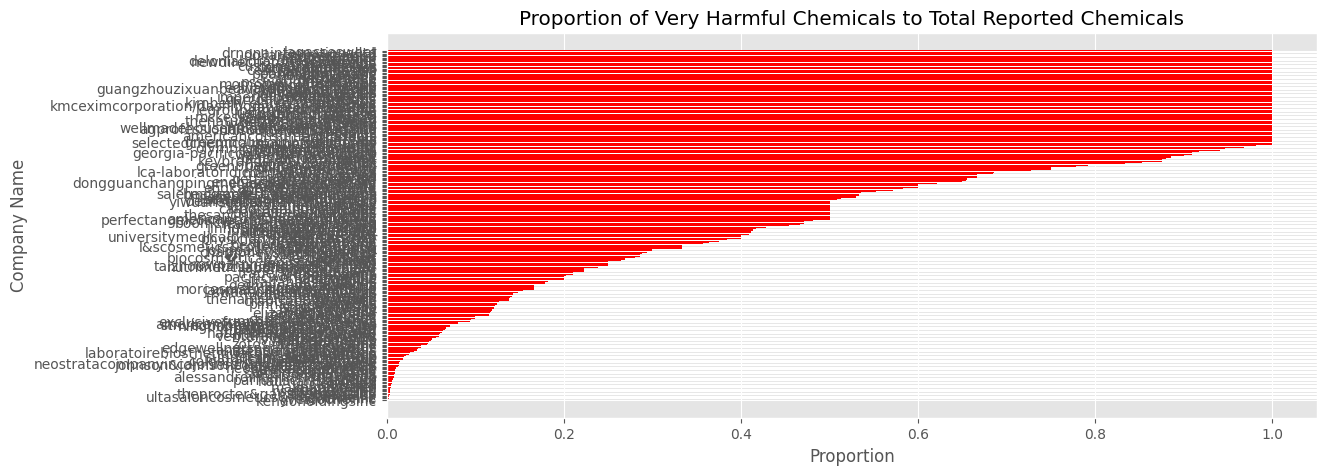

In [ ]:
ratio = ratio.sort_values('Proportion')
fig, ax = plt.subplots(figsize = (12,5))
ax.barh(ratio['CompanyName'],ratio['Proportion'], color='red')
plt.xticks(rotation=0)
plt.xlabel('Proportion')
plt.ylabel('Company Name')
plt.title('Proportion of Very Harmful Chemicals to Total Reported Chemicals')

In [ ]:
harmful_or_not = cdata.groupby(['VeryHarmful']).count()[['CDPHId']].reset_index()
harmful_or_not

VeryHarmful  CDPHId
0        False  102638
1         True    4672

([<matplotlib.patches.Wedge at 0x7f8dcfd5ad40>,
 [Text(-1.0897266755658261, 0.1499859078722156, 'False'),
  Text(1.0897266650338029, -0.14998598439289612, 'True')],
 [Text(-0.5943963684904506, 0.08181049520302668, '95.6%'),
  Text(0.5943963627457106, -0.08181053694157969, '4.4%')])

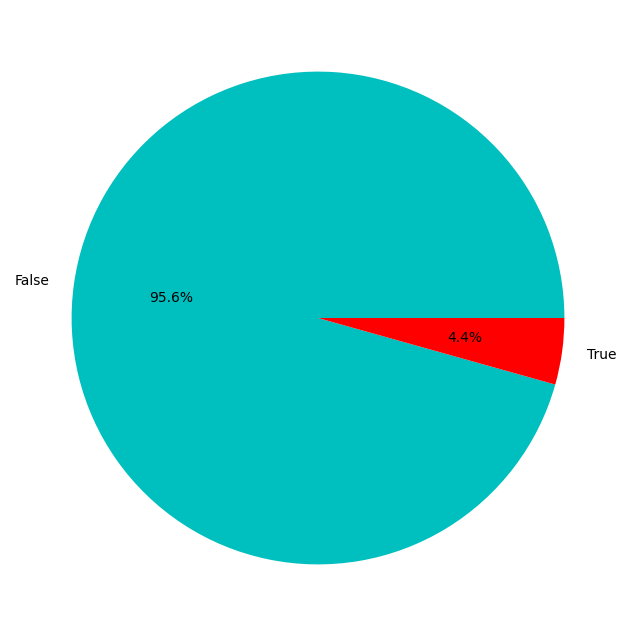

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
ax.pie(harmful_or_not['CDPHId'], labels=harmful_or_not['VeryHarmful'],autopct='%1.1f%%', colors=['c','r'])

In [ ]:
# cdata.groupby(['CDPHId']).count() #total of  products 36972 reported

In [ ]:
agroup = cdata[cdata['VeryHarmful'] == True].groupby(['CDPHId'])
agroup.count()
#2816 products out of all 36972 products are very harmful
harmids=cdata[cdata['VeryHarmful'] == True]['CDPHId'].unique()

Note - 2816 products out of all 36972 products are very harmful

In [ ]:
veryharmfulprodlist = agroup.ProductName.unique()
veryharmfulprodlist

CDPHId
10088             [white tea extract manicure soak]
10182                               [lashgrip dark]
10183                              [lashgrip clear]
10219                                  [seche plus]
10259    [les eaux d�ete � berlingot de gel douche]
                            ...                    
9938                [apra care shampoo / body wash]
9939                 [no-rinse shampoo & body wash]
9940                [whirlpool shampoo & body wash]
9941         [apracare foaming shampoo / body wash]
9942                [whirlpool shampoo & body wash]
Name: ProductName, Length: 2816, dtype: object

In [ ]:
veryharmfulcomplist = agroup['CompanyName'].value_counts()
veryharmfulcomplist

CDPHId  CompanyName                    
10088   americaninternationalindustries    1
10182   americaninternationalindustries    1
10183   americaninternationalindustries    1
10219   americaninternationalindustries    1
10259   beauteprestigeinternational        1
                                          ..
9938    centralsolutionsinc                2
9939    centralsolutionsinc                2
9940    centralsolutionsinc                2
9941    centralsolutionsinc                4
9942    centralsolutionsinc                2
Name: CompanyName, Length: 2816, dtype: int64

In [ ]:
# veryharmfulcomplist = cdata[cdata['VeryHarmful']== True]['CompanyName'].unique()
# veryharmfulcomplist

In [ ]:
# lst = [c for c in veryharmfulcomplist]
# lst

In [ ]:
harmfulprodcount = cdata[cdata['VeryHarmful']== True]['CompanyName'].value_counts()
harmfulprodcount = harmfulprodcount.to_frame()
# harmfulprodcount

In [ ]:
# cdata[cdata['VeryHarmful']== True]['CDPHId'].value_counts()

In [ ]:
# total products report by a company
cdata.groupby('CompanyName')['CDPHId'].nunique()

#598 unique companies

CompanyName
2355644ontarioinc                        1
accessbusinessgroupinternationalllc    138
acquadiparma                            19
addedextrasllc                          60
advancedaestheticsinc                    3
                                      ... 
zoevagmbh                              433
zoharcosmetics(mfo)ltd                   7
zoskinhealthinc                         27
zotosinternationalinc                   48
zschimmer&schwarzinc                     8
Name: CDPHId, Length: 598, dtype: int64

In [ ]:
harm_comp = pd.DataFrame([['Companies Report Products With Harmful Chemicals',2816],['Total Companies',598]],index=[0,1],columns=['Company','Count'])
harm_comp

Company  Count
0  Companies Report Products With Harmful Chemicals   2816
1                                   Total Companies    598

<BarContainer object of 2 artists>

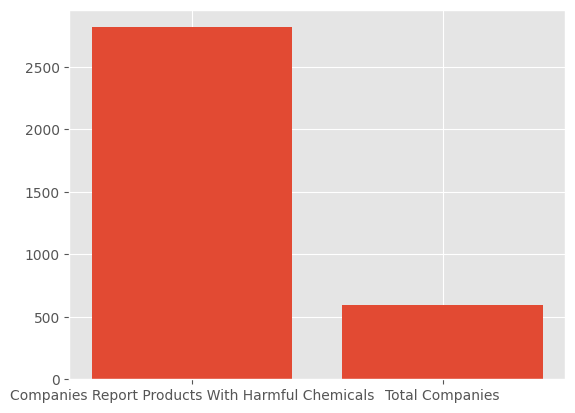

In [ ]:
harm_comp = harm_comp.sort_values(by='Count', ascending=False)
fig, ax = plt.subplots()
ax.bar(harm_comp['Company'], harm_comp['Count'])

In [ ]:
harm_prod = pd.DataFrame([['Products Contain Very Harmful Chemicals', 2816],['Total Products',36972]],index=[0,1],columns=['Product','Count'])
harm_prod

Product  Count
0  Products Contain Very Harmful Chemicals   2816
1                           Total Products  36972

<BarContainer object of 2 artists>

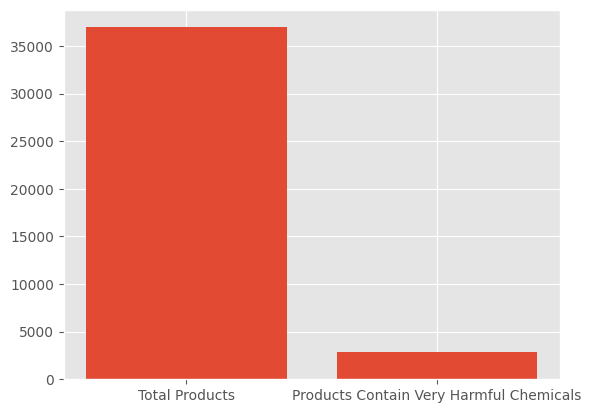

In [ ]:
harm_prod = harm_prod.sort_values(by='Count', ascending=False)
fig, ax = plt.subplots()
ax.bar(harm_prod['Product'], harm_prod['Count'])

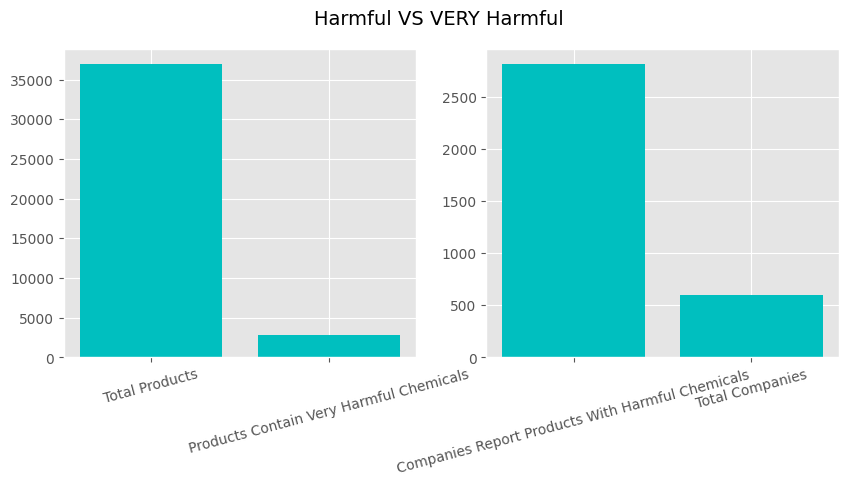

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(10, 4))
axs[0].bar(harm_prod['Product'], harm_prod['Count'], color = 'c')
axs[1].bar(harm_comp['Company'], harm_comp['Count'], color = 'c')
fig.suptitle('Harmful VS VERY Harmful', fontsize=14)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=15)


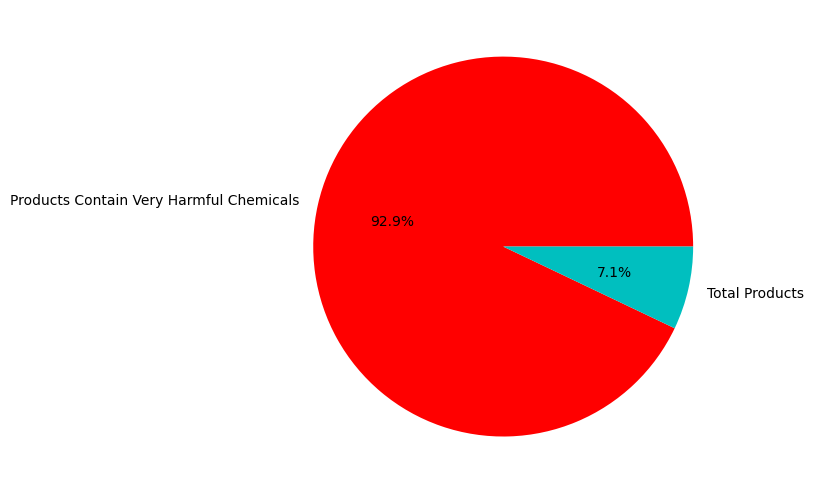

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
ax.pie(harm_prod['Count'],labels=['Products Contain Very Harmful Chemicals', 'Total Products'],autopct='%1.1f%%', colors=['r','c'])
plt.tight_layout()


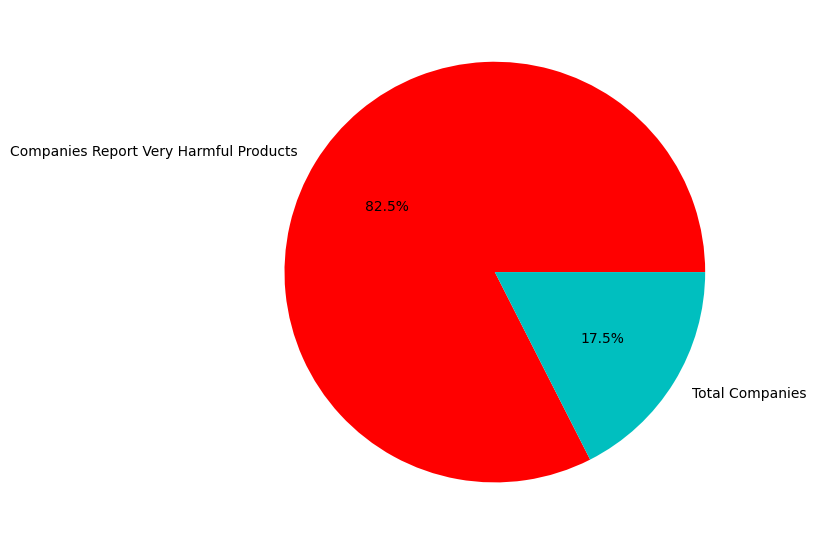

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
ax.pie(harm_comp['Count'],labels=['Companies Report Very Harmful Products', 'Total Companies'],autopct='%1.1f%%', colors=['r','c'])
plt.tight_layout()


In [ ]:
#cgroup.head()

In [ ]:
productId=cgroup[['CDPHId','ProductName','CompanyName']]
# productId
prodbycomp=productId.groupby(['CompanyName'],as_index=False).count()

In [ ]:
harmids

array(['3', '24', '43', ..., '41504', '41505', '41506'], dtype=object)

In [ ]:
harmprodId=productId.set_index(['CDPHId']).loc[harmids]
harmprodbycomp=harmprodId.groupby(['CompanyName'],as_index=False).count()

In [ ]:
ratio=prodbycomp.merge(harmprodbycomp,how='inner',left_on='CompanyName',right_on='CompanyName')
ratio=ratio.drop(columns =['CDPHId'])
ratio['ratio'] = ratio['ProductName_y']/ratio['ProductName_x']
ratio = ratio.rename(columns={'ProductName_x':'Total Product Reported','ProductName_y':'Prod Contain Very Harmful Chem'})
ratio

CompanyName  Total Product Reported  \
0                         acquadiparma                      19   
1                       addedextrasllc                      60   
2                          aesopusainc                      11   
3                              afflink                       8   
4    agprofessionalhaircareproductsltd                       4   
..                                 ...                     ...   
249        yiwuariscosmeticmanufactory                       1   
250                      youngnailsinc                      30   
251                      yvesrocherinc                     445   
252                      zeemedicalinc                       2   
253              zotosinternationalinc                      48   

     Prod Contain Very Harmful Chem     ratio  
0                                 4  0.210526  
1                                 6  0.100000  
2                                11  1.000000  
3                                 7  0.875000  
4                                 4  1.000000  
..                              ...       ...  
249                               1  1.000000  
250                               1  0.033333  
251                               1  0.002247  
252                               2  1.000000  
253                               9  0.187500  

[254 rows x 4 columns]

Text(0.5, 1.0, 'Ratio of Product Containing Very Harmful Chemical to Total Product Reported')

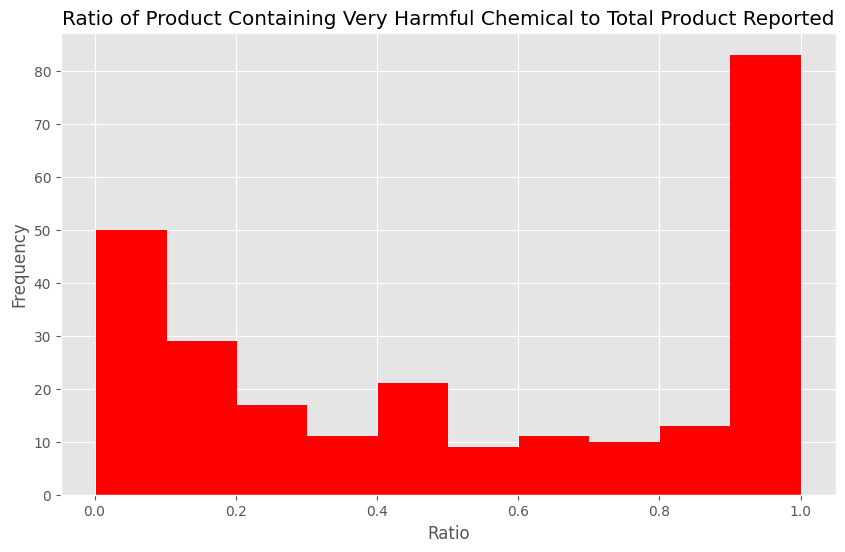

In [ ]:
fig, ax= plt.subplots(figsize= (10,6))
plt.hist(ratio['ratio'], color= 'r')
plt.xlabel('Ratio')
plt.ylabel('Frequency')
plt.title('Ratio of Product Containing Very Harmful Chemical to Total Product Reported')


In [ ]:
ratio.sort_values(by = ['ratio','Prod Contain Very Harmful Chem'], ascending = False)

CompanyName  Total Product Reported  \
139            mariozunino&csrl                      38   
204                  rollandsrl                      20   
56   delonlaboratories(1990)inc                      19   
26          betcocorporationltd                      13   
142    mckessonmedical-surgical                      12   
..                          ...                     ...   
166              nseproductsinc                     163   
133                     lushltd                     524   
115            kendoholdingsinc                     229   
161                  newavonllc                     672   
251               yvesrocherinc                     445   

     Prod Contain Very Harmful Chem     ratio  
139                              38  1.000000  
204                              20  1.000000  
56                               19  1.000000  
26                               13  1.000000  
142                              12  1.000000  
..                              ...       ...  
166                               1  0.006135  
133                               3  0.005725  
115                               1  0.004367  
161                               2  0.002976  
251                               1  0.002247  

[254 rows x 4 columns]

In [ ]:
ratio['ratio'].mean()

0.5446476684748465

In [ ]:
ratio[ratio['ratio']<= ratio['ratio'].mean()].sort_values(by = ['ratio','Prod Contain Very Harmful Chem'], ascending= False)

CompanyName  Total Product Reported  \
21   beauteprestigeinternational                      28   
185   physician'scarealliancellc                      19   
19       atlasdevelopmentlimited                     130   
134         lushmanufacturingltd                     234   
72      energizerpersonalcarellc                      14   
..                           ...                     ...   
166               nseproductsinc                     163   
133                      lushltd                     524   
115             kendoholdingsinc                     229   
161                   newavonllc                     672   
251                yvesrocherinc                     445   

     Prod Contain Very Harmful Chem     ratio  
21                               15  0.535714  
185                              10  0.526316  
19                               68  0.523077  
134                             117  0.500000  
72                                7  0.500000  
..                              ...       ...  
166                               1  0.006135  
133                               3  0.005725  
115                               1  0.004367  
161                               2  0.002976  
251                               1  0.002247  

[131 rows x 4 columns]

In [ ]:
ratio['Total Product Reported'].sum(), ratio['Prod Contain Very Harmful Chem'].sum()

(19226, 2816)

In [ ]:
ratio[ratio['ratio']==1].sort_values(by=['ratio','Total Product Reported'])

CompanyName  Total Product Reported  \
22                 beautopiallc                       1   
35       ca-botanainternational                       1   
38               cardinalhealth                       1   
62          dollarconnectionltd                       1   
65             duricosmeticsinc                       1   
..                          ...                     ...   
142    mckessonmedical-surgical                      12   
26          betcocorporationltd                      13   
56   delonlaboratories(1990)inc                      19   
204                  rollandsrl                      20   
139            mariozunino&csrl                      38   

     Prod Contain Very Harmful Chem  ratio  
22                                1    1.0  
35                                1    1.0  
38                                1    1.0  
62                                1    1.0  
65                                1    1.0  
..                              ...    ...  
142                              12    1.0  
26                               13    1.0  
56                               19    1.0  
204                              20    1.0  
139                              38    1.0  

[78 rows x 4 columns]

In [ ]:
ratio[ratio['ratio']>=0.9].sort_values(by=['ratio','Total Product Reported']).tail(20)


CompanyName  Total Product Reported  \
215                           src                       5   
237         unisourceworldwideinc                       5   
47              corialaboritories                       6   
64         drnonainternationalltd                       6   
246              whiskproductsinc                       6   
54                     davinesspa                       7   
100            hillyardindustries                       7   
162     newdirectionsaromaticsinc                       7   
190                    primorance                       7   
40            centralsolutionsinc                       8   
81                        fmklabs                       8   
15                    aplicareinc                       9   
90                  greatclipsinc                       9   
117  kimberly-clarkglobalsalesllc                       9   
2                     aesopusainc                      11   
142      mckessonmedical-surgical                      12   
26            betcocorporationltd                      13   
56     delonlaboratories(1990)inc                      19   
204                    rollandsrl                      20   
139              mariozunino&csrl                      38   

     Prod Contain Very Harmful Chem  ratio  
215                               5    1.0  
237                               5    1.0  
47                                6    1.0  
64                                6    1.0  
246                               6    1.0  
54                                7    1.0  
100                               7    1.0  
162                               7    1.0  
190                               7    1.0  
40                                8    1.0  
81                                8    1.0  
15                                9    1.0  
90                                9    1.0  
117                               9    1.0  
2                                11    1.0  
142                              12    1.0  
26                               13    1.0  
56                               19    1.0  
204                              20    1.0  
139                              38    1.0

In [ ]:
ratio[ratio['CompanyName'].str.contains('mariozunino&csrl')]

CompanyName  Total Product Reported  Prod Contain Very Harmful Chem  \
139  mariozunino&csrl                      38                              38   

     ratio  
139    1.0

In [ ]:
ratio['Total Product Reported'].mean()

75.69291338582677

In [ ]:
ratio[ratio['Total Product Reported'] > ratio['Total Product Reported'].mean()].sort_values(by=['ratio'])

CompanyName  Total Product Reported  \
251                     yvesrocherinc                     445   
161                        newavonllc                     672   
115                  kendoholdingsinc                     229   
133                           lushltd                     524   
166                    nseproductsinc                     163   
95                   hallmarkcardsinc                     158   
228          theprocter&gamblecompany                     907   
94                           guerlain                     339   
145                         mirabella                     102   
13                  amorepacificusinc                    1084   
31                       bonnebellllc                      85   
140                        marykayinc                      77   
51                               coty                     695   
175              parfumschristiandior                     367   
45           colgate-palmolivecompany                     103   
17                    armanddupreeinc                     350   
113  johnson&johnsonconsumercompanies                     198   
137                     makeupforever                     192   
212                     shiseidocoltd                      81   
16               arcadiabeautylabsllc                     236   
41                         cfebsisley                      76   
230                     tigilineacorp                     147   
25                   benefitcosmetics                     353   
14           anastasiabeverlyhillsllc                     824   
60                          dhcusainc                      97   
43                          chanelinc                      88   
36                      caleel+hayden                     153   
163       ningbomeitelicosmeticscoltd                     122   
12    americaninternationalindustries                    1964   
34                buth-na-bodhaigeinc                    1045   
240           venturainternationalltd                     119   
214                   soapandgloryltd                     168   
241                         vi-joninc                     560   
223                thebootscompanyplc                     483   
153                     narscosmetics                     159   
174               palladiobeautygroup                     102   
170                      oceanausainc                     330   
70                  elizabethardeninc                     380   
80                  fiskindustriesinc                     133   
129                         levladllc                      89   
216                    stilastylesllc                     205   
18                           aromcasa                     177   
9                       allurelabsinc                      83   
136                          maesallc                     272   
134              lushmanufacturingltd                     234   
19            atlasdevelopmentlimited                     130   
132                          lumeneoy                     109   
91         greenbrierinternationalinc                      76   
78                   farouksystemsinc                     266   

     Prod Contain Very Harmful Chem     ratio  
251                               1  0.002247  
161                               2  0.002976  
115                               1  0.004367  
133                               3  0.005725  
166                               1  0.006135  
95                                1  0.006329  
228                               6  0.006615  
94                                3  0.008850  
145                               1  0.009804  
13                               12  0.011070  
31                                1  0.011765  
140                               1  0.012987  
51                               11  0.015827  
175                               6  0.016349  
45                                2  0.019417  
17     

In [ ]:
ratio[ratio['CompanyName'].str.contains("farouk")]

CompanyName  Total Product Reported  Prod Contain Very Harmful Chem  \
78  farouksystemsinc                     266                             262   

       ratio  
78  0.984962

Nailalliance-entity (4.53%) and Revlon (4.14%) are companies that have made interesting discoveries regarding their products, stating that the majority of them do not contain highly harmful chemicals.

Buth-na-bodhaige inc (0.084139%) or Bodyshop (2.96%) reported that their products have a lower percentage of harmful chemicals compared to their competitor Estee Lauder.

Parfumschristiandior (0.017094% or 1.01%) and Chanelinc (0.068182%) are competing companies with varying levels of harmful chemical content in their products.

Newavonllc (0.003663%) and Lushltd (0.006397%) have relatively lower percentages of harmful chemicals in their products. Lushmanufacturingltd, on the other hand, has a higher percentage of harmful chemicals at 50%.

#### Hypothesis Testing

The objective of the analysis is to determine whether there is a statistically significant difference in the ratio of harmful chemicals to all chemicals reported between two companies. Specifically, the comparison will be made based on the categories of big vs. small companies and controversial vs. non-controversial companies.

**Null Hypothesis (H0): Pa = Pp**

The null hypothesis states that there is no significant difference between the proportions of harmful chemicals in the two companies. It assumes that the proportion of harmful chemicals in one company (Pa) is equal to the proportion of harmful chemicals in the other company (Pp).

________________________________________________________________________________

**Alternative Hypothesis (Ha): Pa ≠ Pp**

The alternative hypothesis suggests that there is a significant difference between the proportions of harmful chemicals in the two companies. It posits that the proportion of harmful chemicals in one company (Pa) is not equal to the proportion of harmful chemicals in the other company (Pp).

Standard Deviation = sqrt[(Pa * (1 - Pa) / 1046) + (Pp * (1 - Pp) / 836)]

In [ ]:
import numpy as np
import scipy.stats as stats

In [ ]:
# Calculate the shared sample frequency
total_occurrences = 12 + 6
total_sample_size = 1882
shared_sample_freq = total_occurrences / total_sample_size

# Calculate the shared sample variance
total_population_size = 874456
shared_sample_variance = total_sample_size * (shared_sample_freq * (1 - shared_sample_freq)) / total_population_size

# Calculate the difference in proportions using a normal distribution
difference_in_proportions = stats.norm(0, np.sqrt(shared_sample_variance))

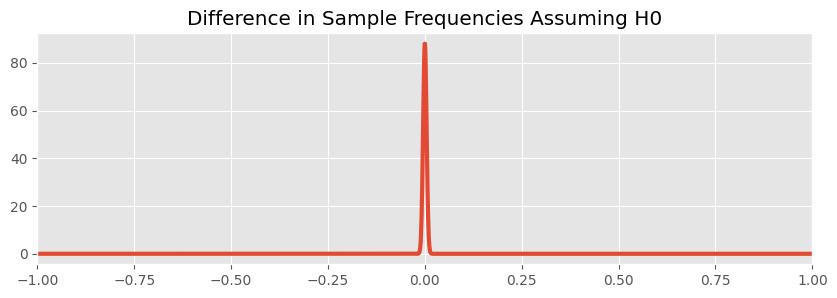

In [ ]:
fig, ax = plt.subplots(1, figsize=(10, 3))
x = np.linspace(-1, 1, num=2500)
ax.plot(x, difference_in_proportions.pdf(x), linewidth=3)
ax.set_xlim(-1, 1)
ax.set_title("Difference in Sample Frequencies Assuming H0")
plt.show()

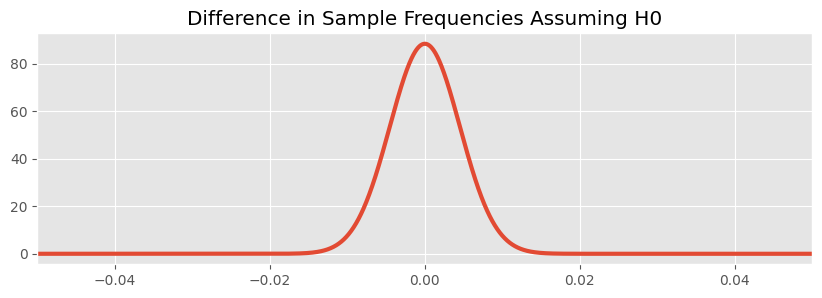

In [ ]:
fig, ax = plt.subplots(figsize=(10, 3))
x = np.linspace(-0.05, 0.05, num=2500)
ax.plot(x, difference_in_proportions.pdf(x), linewidth=3)
ax.set_xlim(-0.05, 0.05)
ax.set_title("Difference in Sample Frequencies Assuming H0")
plt.show()

Significance Level -> α=0.05

In [ ]:
sample_freq = 12 / 1046
pg_sample_freq = 6 / 836

# Calculate the difference in sample proportions
difference_in_sample_proportions = sample_freq - pg_sample_freq
print("Probability:", difference_in_sample_proportions)

pvalue = 1 - difference_in_proportions.cdf(difference_in_sample_proportions)

print("Pvalue:", pvalue)

Probability: 0.004295241841785064
Pvalue: 0.4412240561283042


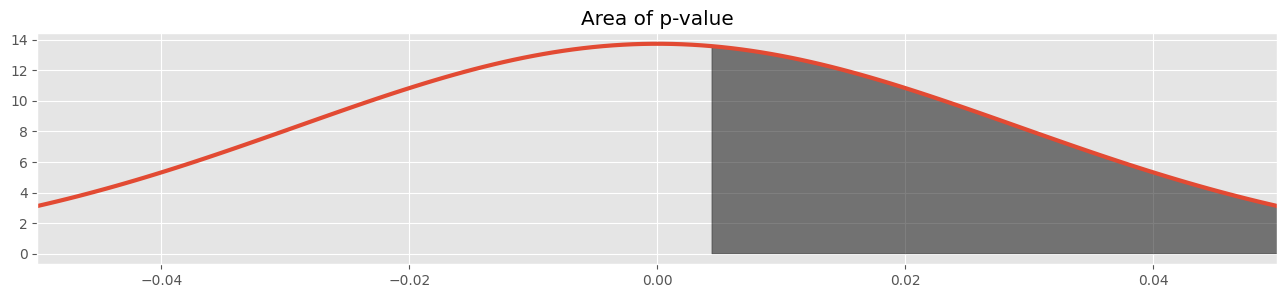

In [ ]:
fig, ax = plt.subplots(1, figsize=(16, 3))

x = np.linspace(-1, 1, num=2500)
pdf_values = difference_in_proportions.pdf(x)
ax.plot(x, pdf_values, linewidth=3)
ax.fill_between(x, pdf_values, where=(x >= difference_in_sample_proportions),
                color="black", alpha=0.5)
ax.set_xlim(-0.05, 0.05)
ax.set_title("Area of p-value")

plt.show()


chanel inc vs american international industries

In [ ]:
shared_sample_freq = (6+152)/(88+1964)
shared_sample_variance = (88+1964)*(shared_sample_freq *(1-shared_sample_freq))/(88*1964)

difference_in_proportions = stats.norm(0, np.sqrt(shared_sample_variance))

In [ ]:
chanel_sample_freq =  6/88
aii_sample_freq = 152/1964
difference_in_sample_proportions = chanel_sample_freq - aii_sample_freq
difference_in_sample_proportions

-0.009211257174597295

In [ ]:
p_value = 1- difference_in_proportions.cdf(difference_in_sample_proportions)
p_value

0.6244174923906841

Text(0.5, 1.0, 'p-value Area')

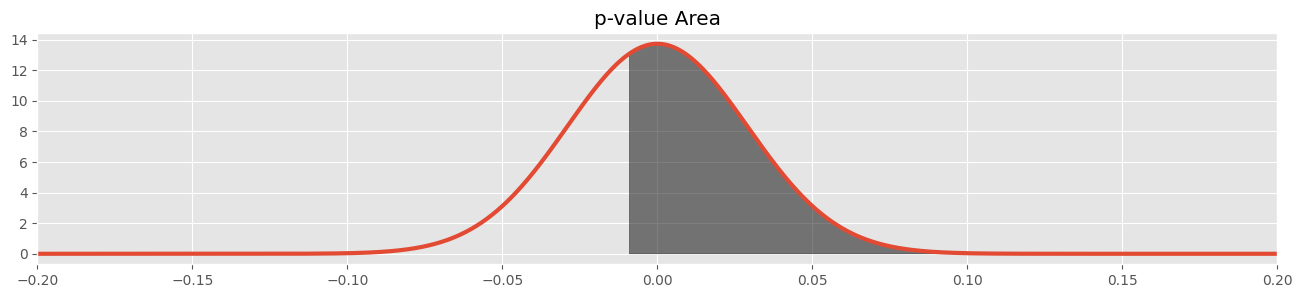

In [ ]:
fig, ax = plt.subplots(1, figsize=(16, 3))

x = np.linspace(-1, 1, num=5000)
ax.plot(x, difference_in_proportions.pdf(x), linewidth=3)
ax.fill_between(x, difference_in_proportions.pdf(x), where=(x >= difference_in_sample_proportions),
                color="black", alpha=0.5)
ax.set_xlim(-0.2, 0.2)
ax.set_title("p-value Area")


The obtained P-value of approximately 0.62 exceeds predetermined rejection threshold.

Hence, we fail to reject the null hypothesis. Consequently, it can be concluded that the observed difference in proportion between Chanel Inc. and American International Industries is likely due to random chance. Reliance solely on the ratio difference is insufficient for determining which company has a higher prevalence of very harmful products compared to the other.

vi-joninc vs  narscosmetics

In [ ]:
shared_sample_freq = (57+17)/(560+159)
shared_sample_variance = (560+159)*(shared_sample_freq *(1-shared_sample_freq))/(560*159)

difference_in_proportions = stats.norm(0, np.sqrt(shared_sample_variance))

In [ ]:
vijon_sample_freq =  57/560
nars_sample_freq = 17/159
difference_in_sample_proportions = vijon_sample_freq - nars_sample_freq
difference_in_sample_proportions

-0.005132524707996411

In [ ]:
p_value = 1- difference_in_proportions.cdf(difference_in_sample_proportions)
p_value

0.5745505622733764

In [ ]:
fig, ax = plt.subplots(1, figsize=(16, 3))

x = np.linspace(-1, 1, num=5000)
ax.plot(x, difference_in_proportions.pdf(x), linewidth=3)
ax.fill_between(x, difference_in_proportions.pdf(x), where=(x >= difference_in_sample_proportions),
                color="black", alpha=0.5)
ax.set_xlim(-0.2, 0.2)
ax.set_title("p-value Area")

Text(0.5, 1.0, 'p-value Area')

benefitcosmetics vs anastasiabeverlyhillsllc

In [ ]:
shared_sample_freq = (10+31)/(338+824)
shared_sample_variance = (338+824)*(shared_sample_freq *(1-shared_sample_freq))/(338*824)

difference_in_proportions = stats.norm(0, np.sqrt(shared_sample_variance))

In [ ]:
bene_sample_freq =  10/338
anas_sample_freq = 31/824
difference_in_sample_proportions = bene_sample_freq - anas_sample_freq
difference_in_sample_proportions

-0.008035560406732922

In [ ]:
p_value = 1- difference_in_proportions.cdf(difference_in_sample_proportions)
p_value

0.7499363898254768

In [ ]:
fig, ax = plt.subplots(1, figsize=(16, 3))

x = np.linspace(-1, 1, num=5000)
ax.plot(x, difference_in_proportions.pdf(x), linewidth=3)
ax.fill_between(x, difference_in_proportions.pdf(x), where=(x >= difference_in_sample_proportions),
                color="black", alpha=0.5)
ax.set_xlim(-0.1, 0.1)
ax.set_title("p-value Region")

Text(0.5, 1.0, 'p-value Region')


The computed P-value of approximately 0.75 significantly exceeds my predetermined rejection threshold.

Therefore, we fail to reject the null hypothesis once again. Consequently, it can be concluded that the observed difference in proportion between Benefit Cosmetics and Anastasia Beverly Hills is likely attributable to random variation. It is not reliable to solely utilize the ratio difference to determine which of the two is more harmful than the other.

elizabethardeninc vs coty : Competitors


In [ ]:
shared_sample_freq = (79+11)/(380+672)
shared_sample_variance = (380+672)*(shared_sample_freq *(1-shared_sample_freq))/(380*672)

difference_in_proportions = stats.norm(0, np.sqrt(shared_sample_variance))

eliz_sample_freq =  79.0/380
coty_sample_freq = 11.0/672
difference_in_sample_proportions = eliz_sample_freq - coty_sample_freq
difference_in_sample_proportions

p_value = 1- difference_in_proportions.cdf(difference_in_sample_proportions)

fig, ax = plt.subplots(1, figsize=(16, 3))

x = np.linspace(-1, 1, num=5000)
ax.plot(x, difference_in_proportions.pdf(x), linewidth=3)
ax.fill_between(x, difference_in_proportions.pdf(x), where=(x >= difference_in_sample_proportions),
                color="black", alpha=0.5)
ax.set_xlim(-0.2, 0.2)
ax.set_title("p-value Area")

eliz_sample_freq, coty_sample_freq, difference_in_sample_proportions, difference_in_proportions.cdf(difference_in_sample_proportions), p_value

(0.20789473684210527, 0.01636904761904762, 0.19152568922305765, 1.0, 0.0)

difference in ratio between these 2 companies is statistically significant

parfumschristiandior vs  chanelinc : Competitors


In [ ]:
shared_sample_freq = (6+6)/(351+88)
shared_sample_variance = (351+88)*(shared_sample_freq *(1-shared_sample_freq))/(351*88)

difference_in_proportions = stats.norm(0, np.sqrt(shared_sample_variance))

cd_sample_freq =  6/351
chanel_sample_freq = 6/88
difference_in_sample_proportions = cd_sample_freq - chanel_sample_freq
difference_in_sample_proportions

p_value = 1- difference_in_proportions.cdf(difference_in_sample_proportions)

eliz_sample_freq, coty_sample_freq, difference_in_sample_proportions, difference_in_proportions.cdf(difference_in_sample_proportions), p_value

fig, ax = plt.subplots(1, figsize=(16, 3))

x = np.linspace(-1, 1, num=5000)
ax.plot(x, difference_in_proportions.pdf(x), linewidth=3)
ax.fill_between(x, difference_in_proportions.pdf(x), where=(x >= difference_in_sample_proportions),
                color="black", alpha=0.5)
ax.set_xlim(-0.2, 0.2)
ax.set_title("p-value Area")

print(p_value)

0.9957066774581277


newavonllc vs lushltd

In [ ]:
shared_sample_freq = (1+3)/(273+469)
shared_sample_variance = (273+469)*(shared_sample_freq *(1-shared_sample_freq))/(273*469)

difference_in_proportions = stats.norm(0, np.sqrt(shared_sample_variance))

avon_sample_freq =  1/273
lush_sample_freq = 3/469
difference_in_sample_proportions = avon_sample_freq - lush_sample_freq
difference_in_sample_proportions

p_value = 1- difference_in_proportions.cdf(difference_in_sample_proportions)

eliz_sample_freq, coty_sample_freq, difference_in_sample_proportions, difference_in_proportions.cdf(difference_in_sample_proportions), p_value

fig, ax = plt.subplots(1, figsize=(16, 3))

x = np.linspace(-1, 1, num=5000)
ax.plot(x, difference_in_proportions.pdf(x), linewidth=3)
ax.fill_between(x, difference_in_proportions.pdf(x), where=(x >= difference_in_sample_proportions),
                color="black", alpha=0.5)
ax.set_xlim(-0.2, 0.2)
ax.set_title("p-value Area")

print(p_value)

0.6880720108448757
